# Telecom Churn Assignment

#### By Vishal Mishra & Rushab Jha
#### Date : 29 MAY 2022


### Business Problem Overview:

The telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn. 

This project is based on the Indian and Southeast Asian market.


### Business Goal

In this project, we are required to analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn. 

The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months


###### This notebook consists of the following approach  :

1. Reading and Understanding Data
2. Data Cleaning & Data Preparation
   * Null Values Check
   * Handling Null values and Missing entries
   * High Value Customers
   * Deriving TARGET variable: CHURN 
   * Check Conversion Rate & Data Imbalance
   * Feature Engineering : creating new variable "days_passed_since_last_recharge"
3. Data visualization & EDA
   * Analyze Categorical Features
   * Plot and Analyze AON Column
   * Analyze days_since_last_recharge
   * Analyze Continuous Variables
   * Creating new feature after og_to_ic_mou 
4. Data Preparation
   * Dummification
   * Splitting the Data into Training and Testing Sets
   * Rescaling the Features with Standard Scaling
   * Dividing into X and Y sets for the model building
   * RFE
5. Data Modelling & Evaluation
   * Building a logistic model using statsmodel, for the detailed statistics & manual feature elimination
   * Model 1
   * Model 2
   * Model 3
   * Model 4
   * Model 5
   * Model 6
   * check VIF
   * Making predictions on TRAIN SET
   * Check Confusion Metrics and Accuracy
   * Metrics - Sensitivity, Specificity , False Positivity Rate, Postive & Negative Predictive value
   * Plotting ROC Curve
   * Find Optical Cutoff Point
   * Final Prediction on TRAIN SET using cutoff Point
   * Recalculate Metrics based on Final Predication
   * Calculate Precision & Recall and their Tradeoff
   * Making Predictions on TEST SET
   * Calculate Lead Score on Test Data
   * Overall Metrics
   * Model Evaluation Conclution
6. CONCLUSION
   * Inferences & Suggestions


## Importing Libraries

In [6]:
# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', 100)

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

# To display all the columns
pd.options.display.max_columns = 300

# To display all the rows
pd.options.display.max_rows = 500


from sklearn.model_selection import train_test_split

## Step 1. Reading and Understanding Data:

In [7]:
#Importing dataset
df_telecom = pd.read_csv(r'C:\Users\Rushab\Documents\Hands on Python new\Machine Learning\Machine Learning lll\Telecom Churn Case Study\telecom_churn_data.csv')

In [8]:
df_telecom.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [9]:
df_telecom.shape

(99999, 226)

- This dataset has 99999 rows and 226 Features

### 1.1 Duplicate Check :
- we see shape of our original dataframe and copy of the same original dataframe along with .drop_duplicates applied still is same , implying there are no duplicate entries
<br>

In [10]:
# Create a copy of df_telecom for duplicate check
df_telecom_1 = df_telecom

# Checking for duplicates and dropping the entire duplicate row if any
df_telecom_1.drop_duplicates(subset=None, inplace=True)
df_telecom_1.shape

(99999, 226)

In [11]:
#print(df_telecom.columns.to_list())

## Step 2. Data Cleaning

### 2.1 Handling Null Values

In [12]:
# Checking percentage of missing values for each column

round((df_telecom.isnull().sum()/ len(df_telecom)) * 100,3) 

mobile_number                0.000
circle_id                    0.000
loc_og_t2o_mou               1.018
std_og_t2o_mou               1.018
loc_ic_t2o_mou               1.018
last_date_of_month_6         0.000
last_date_of_month_7         0.601
last_date_of_month_8         1.100
last_date_of_month_9         1.659
arpu_6                       0.000
arpu_7                       0.000
arpu_8                       0.000
arpu_9                       0.000
onnet_mou_6                  3.937
onnet_mou_7                  3.859
onnet_mou_8                  5.378
onnet_mou_9                  7.745
offnet_mou_6                 3.937
offnet_mou_7                 3.859
offnet_mou_8                 5.378
offnet_mou_9                 7.745
roam_ic_mou_6                3.937
roam_ic_mou_7                3.859
roam_ic_mou_8                5.378
roam_ic_mou_9                7.745
roam_og_mou_6                3.937
roam_og_mou_7                3.859
roam_og_mou_8                5.378
roam_og_mou_9       

- Only Display Columns with Null values in Descending order of Percentage of Null Values:

In [13]:
df_telecom_na = (df_telecom.isnull().sum() / len(df_telecom)) * 100
df_telecom_na = df_telecom_na.drop(df_telecom_na[df_telecom_na == 0].index).sort_values(ascending=False)
df_telecom_na

count_rech_2g_6             74.846748
max_rech_data_6             74.846748
arpu_3g_6                   74.846748
av_rech_amt_data_6          74.846748
count_rech_3g_6             74.846748
night_pck_user_6            74.846748
arpu_2g_6                   74.846748
fb_user_6                   74.846748
total_rech_data_6           74.846748
date_of_last_rech_data_6    74.846748
count_rech_3g_7             74.428744
arpu_3g_7                   74.428744
av_rech_amt_data_7          74.428744
fb_user_7                   74.428744
total_rech_data_7           74.428744
count_rech_2g_7             74.428744
arpu_2g_7                   74.428744
night_pck_user_7            74.428744
max_rech_data_7             74.428744
date_of_last_rech_data_7    74.428744
date_of_last_rech_data_9    74.077741
count_rech_2g_9             74.077741
total_rech_data_9           74.077741
count_rech_3g_9             74.077741
max_rech_data_9             74.077741
av_rech_amt_data_9          74.077741
arpu_3g_9   

- Understanding Recharge Columns before treating it :

In [14]:
# list out recharge columns
cols=df_telecom.columns
recharge_cols=[]
for i in cols:
    if 'rech' in i:
        recharge_cols.append(i)

In [15]:
df_telecom[recharge_cols].head(30)

total_rech_num_6  total_rech_num_7  total_rech_num_8  total_rech_num_9  \
0                  4                 3                 2                 6   
1                  4                 9                11                 5   
2                  5                 4                 2                 7   
3                 10                11                18                14   
4                  5                 6                 3                 4   
5                  2                 2                 3                 3   
6                 15                10                11                 7   
7                  5                 5                 7                 3   
8                 19                21                14                15   
9                  4                 2                 5                 3   
10                 1                 1                17                 7   
11                 6                 1                 1                 0   
12                 2                 3                 2                 3   
13                 6                 4                11                 7   
14                 7                 7                 9                 7   
15                 1                13                11                 8   
16                10                 6                 2                 1   
17                19                 2                 4                10   
18                 1                 4                 5                 4   
19                 2                 3                 4                 1   
20                 6                 2                 3                 1   
21                22                26                27                17   
22                 4                 1                 1                 2   
23                 3                 5                 4                 4   
24                 5                 5                 7                 6   
25                 5                 7                 4                 7   
26                 0                 6                 4                 4   
27                 4                 1                 6                 1   
28                 3                 4                 8                 4   
29                 8                 2                 1                 1   

    total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  total_rech_amt_9  \
0                362               252               252                 0   
1                 74               384               283               121   
2                168               315               116               358   
3                230               310               601               410   
4                196               350               287               200   
5                120                 0               130               130   
6                499               222               294               141   
7               1580               790              3638                 0   
8                437               601               120               186   
9                220               195               210               180   
10                 0                 0               324                99   
11               366                 0               154                 0   
12               110               110               130               160   
13               507               253               717               353   
14                60                40                70                90   
15                 0               686               696               556   
16               570               348               160               220   
17               816                 0                30               335   
18                 0                90                50                40   
19               154     

#### Insights:
- As seen above ,  we observe that there are quite a few columns (40 to be precise) which have more than 70% of data missing. Hence we will consider to drop these as they don't add much information

- But as suggested in the problem statement We are required to define high-value customers as - Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase). We need to confirm our understanding of total_rech_data* , av_rech_amt_data* columns as apparently they may be required for filtering High Value Customers but they also have more than 74% as Null Values

- However , upon observing above recharge columns, we see that total_rech_amt_*  columns have NO NULL values and it's amount is cumulative of data and non-data pack recharges, i.e Total recharge Amount done on that Mobile Number. Hence we can consider total_rech_amt_*  columns only for filtering High Value Customers. We can safely drop total_rech_data* , av_rech_amt_data* columns as they have High Percentage of Null values



In [16]:
null_df = pd.DataFrame(df_telecom.isnull().sum()*100/len(df_telecom))

In [17]:
#name the column as count
null_df.columns = ['Count']

In [18]:
# count number of Columns with Null Percentage more than 70
null_df[null_df['Count'] > 70].shape

(40, 1)

In [19]:
#list out columns with Null Percentage more than 70
null_df[null_df['Count'] > 70].index

Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9',
       'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6',
       'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'av_rech_amt_data_9', 'arpu_3g_6', 'arpu_3g_7',
       'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
       'arpu_2g_9', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8',
       'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9'],
      dtype='object')

In [20]:
# Removing columns with null values greater than 70%
df_telecom.drop(null_df[null_df['Count'] > 70].index, axis=1, inplace=True)

In [21]:
df_telecom.shape

(99999, 186)

- Checking current Column Wise Null Values percentage

In [22]:
round((df_telecom.isnull().sum()/ len(df_telecom)) * 100,3) 

mobile_number           0.000
circle_id               0.000
loc_og_t2o_mou          1.018
std_og_t2o_mou          1.018
loc_ic_t2o_mou          1.018
last_date_of_month_6    0.000
last_date_of_month_7    0.601
last_date_of_month_8    1.100
last_date_of_month_9    1.659
arpu_6                  0.000
arpu_7                  0.000
arpu_8                  0.000
arpu_9                  0.000
onnet_mou_6             3.937
onnet_mou_7             3.859
onnet_mou_8             5.378
onnet_mou_9             7.745
offnet_mou_6            3.937
offnet_mou_7            3.859
offnet_mou_8            5.378
offnet_mou_9            7.745
roam_ic_mou_6           3.937
roam_ic_mou_7           3.859
roam_ic_mou_8           5.378
roam_ic_mou_9           7.745
roam_og_mou_6           3.937
roam_og_mou_7           3.859
roam_og_mou_8           5.378
roam_og_mou_9           7.745
loc_og_t2t_mou_6        3.937
loc_og_t2t_mou_7        3.859
loc_og_t2t_mou_8        5.378
loc_og_t2t_mou_9        7.745
loc_og_t2m

##### Insights:

### Handling Missing Values in Minutes of Usage Columns 

- Outgoing Calls:
  We see that there are no Missing Values in the column total_og_mou, Hence this column can be utilized as a reference to handle missing values in the other Outgoing Minutes of Usage columns. The logic is if the Total Outgoing Minutes of Usage i.e. total_og_mou, if it is zero, it means there were no outgoing calls of any category and we can impute these column null values with zero.
- Incoming Calls:
  Similarly , we see total_ic_mou has no Missing Values. We shall use this column to handle missing values of Incoming calls of any other category. If total_ic_mou is Zero , corresponding incoming call of any category will also be zero
- First we will identify Outgoing and Incoming columns from the dataset. Then we will list out monthwise outgoing and incoming columns.
- We have created a function check_ic_og_cols to check if the missing values of Incoming/Outgoing Minutes of Usage columns corresponding to zero total_ic_mou/total_og_mou
- We will impute such Columns with zero once its successfully checked
- We are not checking or imputing _9 columns as these are going to be discarded later once Churn labels are identified

In [23]:
# list out recharge columns
cols1=df_telecom.columns

# list outgoing minutes usage columns
og_cols=[]
for i in cols1:
    if 'og' in i:
        og_cols.append(i)

        
# list incoming minutes usage columns        
ic_cols=[]
for i in cols1:
    if 'ic_' in i:
        ic_cols.append(i)

# Monthwise list of different categories of incoming minutes usage columns
ic_cols_6=[]
ic_cols_7=[]
ic_cols_8=[]
for i in ic_cols:
    if '_6' in i:
        ic_cols_6.append(i)
    if '_7' in i:
        ic_cols_7.append(i)
    if '_8' in i:
        ic_cols_8.append(i)

# Monthwise list of different categories of Outgoing minutes usage columns
og_cols_6=[]
og_cols_7=[]
og_cols_8=[]
for i in og_cols:
    if '_6' in i:
        og_cols_6.append(i)
    if '_7' in i:
        og_cols_7.append(i)
    if '_8' in i:
        og_cols_8.append(i)

        
print("######################################################")
print("Outgoing Columns with Null Values")
print(df_telecom[og_cols].isnull().sum()>0)

print("######################################################")
print("Incoming Columns with Null Values")
print(df_telecom[ic_cols].isnull().sum()>0)


print("######################################################")
print("Outgoing Columns (month 6) with Null Values ")
print(og_cols_6)
print("Outgoing Columns (month 7) with Null Values ")
print(og_cols_7)
print("Outgoing Columns (month 8) with Null Values ")
print(og_cols_8)


print("######################################################")
print("Incoming Columns (month 6) with Null Values ")
print(ic_cols_6)
print("Incoming Columns (month 7) with Null Values ")
print(ic_cols_7)
print("Incoming Columns (month 8) with Null Values ")
print(ic_cols_8)


######################################################
Outgoing Columns with Null Values
loc_og_t2o_mou       True
std_og_t2o_mou       True
roam_og_mou_6        True
roam_og_mou_7        True
roam_og_mou_8        True
roam_og_mou_9        True
loc_og_t2t_mou_6     True
loc_og_t2t_mou_7     True
loc_og_t2t_mou_8     True
loc_og_t2t_mou_9     True
loc_og_t2m_mou_6     True
loc_og_t2m_mou_7     True
loc_og_t2m_mou_8     True
loc_og_t2m_mou_9     True
loc_og_t2f_mou_6     True
loc_og_t2f_mou_7     True
loc_og_t2f_mou_8     True
loc_og_t2f_mou_9     True
loc_og_t2c_mou_6     True
loc_og_t2c_mou_7     True
loc_og_t2c_mou_8     True
loc_og_t2c_mou_9     True
loc_og_mou_6         True
loc_og_mou_7         True
loc_og_mou_8         True
loc_og_mou_9         True
std_og_t2t_mou_6     True
std_og_t2t_mou_7     True
std_og_t2t_mou_8     True
std_og_t2t_mou_9     True
std_og_t2m_mou_6     True
std_og_t2m_mou_7     True
std_og_t2m_mou_8     True
std_og_t2m_mou_9     True
std_og_t2f_mou_6     True
s

In [24]:
#Check the outgoing columns
og_cols

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2f_mou_9',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_t2c_mou_9',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'std_og_mou_9',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'isd_og_mou_9',
 'spl_og_mou_6

In [25]:
#check incoming mou columns 

In [26]:
#df_telecom['mobile_number'][df_telecom['og_others_6'].isnull()]

#Define function to check if null values of actualcol corresponds to 'zero' in total_ic_mou/total_og_mou columns i.e reference column
def check_ic_og_cols(actualcol,reference):
    actualcol_index = df_telecom[actualcol].isnull()
    #reference_index = df_telecom[reference]==0.0

    if df_telecom[reference][actualcol_index].sum() == 0.0:
        print('All Null Values of '+actualcol+' correspond to 0.0 in '+ reference+' column')
    else:
        print('All Null Values of '+actualcol+' DO NOT correspond to 0.0 in '+ reference+' column')
    print("#############################################################")


In [27]:
#Check Outgoing MOU Columns for month 6
for i in og_cols_6:
    check_ic_og_cols(i,'total_og_mou_6')
print()
print()
#Check Outgoing MOU Columns for month 7
for i in og_cols_7:
    check_ic_og_cols(i,'total_og_mou_7')
print()
print()
#Check Outgoing MOU Columns for month 8
for i in og_cols_8:
    check_ic_og_cols(i,'total_og_mou_8')
print()
print()

#Check Incoming MOU Columns for month 6
for i in ic_cols_6:
    check_ic_og_cols(i,'total_ic_mou_6')
print()
print()
#Check Incoming MOU Columns for month 7
for i in ic_cols_7:
    check_ic_og_cols(i,'total_ic_mou_7')
print()
print()
#Check Incoming MOU Columns for month 8
for i in ic_cols_8:
    check_ic_og_cols(i,'total_ic_mou_8')
print()
print()

All Null Values of roam_og_mou_6 correspond to 0.0 in total_og_mou_6 column
#############################################################
All Null Values of loc_og_t2t_mou_6 correspond to 0.0 in total_og_mou_6 column
#############################################################
All Null Values of loc_og_t2m_mou_6 correspond to 0.0 in total_og_mou_6 column
#############################################################
All Null Values of loc_og_t2f_mou_6 correspond to 0.0 in total_og_mou_6 column
#############################################################
All Null Values of loc_og_t2c_mou_6 correspond to 0.0 in total_og_mou_6 column
#############################################################
All Null Values of loc_og_mou_6 correspond to 0.0 in total_og_mou_6 column
#############################################################
All Null Values of std_og_t2t_mou_6 correspond to 0.0 in total_og_mou_6 column
#############################################################
All Null Values of s

- As observed above , Missing values of All the Incoming/Outgoing MOU Columns of All categories correspond to zero Total Incoming/Outgoing Columns. We shall impute these columns with Zero


In [28]:
# impute missing values with 0
df_telecom[ic_cols] = df_telecom[ic_cols].apply(lambda x: x.fillna(0))
df_telecom[og_cols] = df_telecom[og_cols].apply(lambda x: x.fillna(0))

In [29]:
#Check Null Values again
round((df_telecom.isnull().sum()/ len(df_telecom)) * 100,3) 

mobile_number           0.000
circle_id               0.000
loc_og_t2o_mou          0.000
std_og_t2o_mou          0.000
loc_ic_t2o_mou          0.000
last_date_of_month_6    0.000
last_date_of_month_7    0.601
last_date_of_month_8    1.100
last_date_of_month_9    1.659
arpu_6                  0.000
arpu_7                  0.000
arpu_8                  0.000
arpu_9                  0.000
onnet_mou_6             3.937
onnet_mou_7             3.859
onnet_mou_8             5.378
onnet_mou_9             7.745
offnet_mou_6            3.937
offnet_mou_7            3.859
offnet_mou_8            5.378
offnet_mou_9            7.745
roam_ic_mou_6           0.000
roam_ic_mou_7           0.000
roam_ic_mou_8           0.000
roam_ic_mou_9           0.000
roam_og_mou_6           0.000
roam_og_mou_7           0.000
roam_og_mou_8           0.000
roam_og_mou_9           0.000
loc_og_t2t_mou_6        0.000
loc_og_t2t_mou_7        0.000
loc_og_t2t_mou_8        0.000
loc_og_t2t_mou_9        0.000
loc_og_t2m

### Handling Offnet Onnet Column Null Values

- Onnet represents the total IN NETWORK usage of minutes of both incoming and outgoing category calls
- Offnet represents the total Incoming and Outgoing calls to Other Network
- We will use the same function and logic as used earlier for treating MOU Incoming and Outgoing columns. Once verified , we will impute it with zero
- We are discarding Columns for 9th Month as its going to be removed later

In [30]:
cols2=df_telecom.columns

# list outgoing minutes usage columns
onnet_offnet_cols=[]
for i in cols2:
    if 'net_mou_' in i:
        onnet_offnet_cols.append(i)
        

In [31]:
onnet_offnet_cols

['onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9']

In [32]:
for i in onnet_offnet_cols:
    if '_6' in i:
        check_ic_og_cols(i,'total_og_mou_6')
        check_ic_og_cols(i,'total_ic_mou_6')
        print()
        print()
    if '_7' in i:
        check_ic_og_cols(i,'total_og_mou_7')
        check_ic_og_cols(i,'total_ic_mou_7')
        print()
        print()
    if '_8' in i:
        check_ic_og_cols(i,'total_og_mou_8')
        check_ic_og_cols(i,'total_ic_mou_8')
        print()
        print()

All Null Values of onnet_mou_6 correspond to 0.0 in total_og_mou_6 column
#############################################################
All Null Values of onnet_mou_6 correspond to 0.0 in total_ic_mou_6 column
#############################################################


All Null Values of onnet_mou_7 correspond to 0.0 in total_og_mou_7 column
#############################################################
All Null Values of onnet_mou_7 correspond to 0.0 in total_ic_mou_7 column
#############################################################


All Null Values of onnet_mou_8 correspond to 0.0 in total_og_mou_8 column
#############################################################
All Null Values of onnet_mou_8 correspond to 0.0 in total_ic_mou_8 column
#############################################################


All Null Values of offnet_mou_6 correspond to 0.0 in total_og_mou_6 column
#############################################################
All Null Values of offnet_mou_6 correspon

In [33]:
# As observed above , all null values correspond to the zero incoming/outgoing Call usage of their respective months 
#hence we will impute missing values with 0
df_telecom[onnet_offnet_cols] = df_telecom[onnet_offnet_cols].apply(lambda x: x.fillna(0))
df_telecom[onnet_offnet_cols] = df_telecom[onnet_offnet_cols].apply(lambda x: x.fillna(0))

In [34]:
#Check Null Values again
round((df_telecom.isnull().sum()/ len(df_telecom)) * 100,3) 

mobile_number           0.000
circle_id               0.000
loc_og_t2o_mou          0.000
std_og_t2o_mou          0.000
loc_ic_t2o_mou          0.000
last_date_of_month_6    0.000
last_date_of_month_7    0.601
last_date_of_month_8    1.100
last_date_of_month_9    1.659
arpu_6                  0.000
arpu_7                  0.000
arpu_8                  0.000
arpu_9                  0.000
onnet_mou_6             0.000
onnet_mou_7             0.000
onnet_mou_8             0.000
onnet_mou_9             0.000
offnet_mou_6            0.000
offnet_mou_7            0.000
offnet_mou_8            0.000
offnet_mou_9            0.000
roam_ic_mou_6           0.000
roam_ic_mou_7           0.000
roam_ic_mou_8           0.000
roam_ic_mou_9           0.000
roam_og_mou_6           0.000
roam_og_mou_7           0.000
roam_og_mou_8           0.000
roam_og_mou_9           0.000
loc_og_t2t_mou_6        0.000
loc_og_t2t_mou_7        0.000
loc_og_t2t_mou_8        0.000
loc_og_t2t_mou_9        0.000
loc_og_t2m

In [35]:
check_ic_og_cols('date_of_last_rech_6','total_rech_amt_6')

All Null Values of date_of_last_rech_6 correspond to 0.0 in total_rech_amt_6 column
#############################################################


In [36]:
df_telecom[df_telecom['date_of_last_rech_6'].isnull()].head(10)

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
26      7000335166        109             0.0             0.0             0.0   
91      7000160837        109             0.0             0.0             0.0   
187     7000375019        109             0.0             0.0             0.0   
198     7002122258        109             0.0             0.0             0.0   
232     7000621478        109             0.0             0.0             0.0   
263     7001241836        109             0.0             0.0             0.0   
279     7002323802        109             0.0             0.0             0.0   
371     7002229815        109             0.0             0.0             0.0   
414     7000919353        109             0.0             0.0             0.0   
431     7000599626        109             0.0             0.0             0.0   

    last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
26             6/30/2014            7/31/2014            8/31/2014   
91             6/30/2014            7/31/2014            8/31/2014   
187            6/30/2014            7/31/2014            8/31/2014   
198            6/30/2014            7/31/2014            8/31/2014   
232            6/30/2014                  NaN            8/31/2014   
263            6/30/2014            7/31/2014            8/31/2014   
279            6/30/2014                  NaN            8/31/2014   
371            6/30/2014            7/31/2014            8/31/2014   
414            6/30/2014            7/31/2014            8/31/2014   
431            6/30/2014            7/31/2014            8/31/2014   

    last_date_of_month_9  arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
26             9/30/2014    0.01  130.414   22.088  133.878         0.00   
91             9/30/2014    4.00  149.121  123.761  131.145         0.00   
187            9/30/2014   37.50  126.112  125.316  126.121        11.71   
198            9/30/2014   17.60    2.000  264.929  256.130        42.51   
232                  NaN    0.70    0.000  108.460    0.000         0.00   
263            9/30/2014    0.30  179.246  612.675  723.857         0.00   
279                  NaN    0.90    0.000  106.760    0.000         0.00   
371            9/30/2014    0.00    0.000  176.191  196.242         0.00   
414            9/30/2014   20.00  290.490  132.698  199.047         0.00   
431            9/30/2014    3.22  125.853  127.955  245.627         0.00   

     onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
26          0.00         0.00         0.00          0.00          1.10   
91          0.00         0.00         0.00          0.00          3.01   
187        12.63        10.19         2.29          7.11          7.78   
198         1.58       501.13       535.71          0.00          0.00   
232         0.00         0.00         0.00          0.00          0.00   
263        15.08        59.93        60.48          8.33        113.06   
279         0.00         0.00         0.00          0.00          0.00   
371         0.00        13.76         7.23          0.00          0.00   
414        23.56        15.66         1.96          0.00         92.63   
431         0.00         0.53         0.00          0.83          0.49   

     offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
26           1.45          5.89            0.0           0.00           0.00   
91           1.98         18.46            0.0           0.00           0.00   
187          8.49          4.13            0.0           0.00           0.00   
198         82.21        116.69            0.0           0.00           0.00   
232          0.00          0.00            0.0           0.00           0.00   
263        211.71        310.26            0.0           0.00           0.00   
279          0.00          0.00            0.0           0.00           0.00   
371        203.93        366.34            0.0    

In [37]:
df_telecom.shape

(99999, 186)

In [38]:
#Removing last date of the month columns as they don't add any value to our analysis
df_telecom.drop(['last_date_of_month_7','last_date_of_month_6','last_date_of_month_8','last_date_of_month_9'], axis=1, inplace=True)
df_telecom.shape

(99999, 182)

In [39]:
# Removing columns which will not be of any use for model building
df_telecom.drop(['mobile_number', 'circle_id'], axis=1, inplace=True)
#removed circle_id as all the customers belong to the same circle_id

In [40]:
df_telecom.shape

(99999, 180)

### Handling Date Columns NULL entries
- We still have date_of_last_rech_* Columns with Null Entries. It's also evident from the increasing monthly trend of missing values count that more Customers may have churned
- We will handle this column after filtering out High Value Customers

In [41]:
for i in df_telecom.columns:
    if 'date' in i:
        print("For",i,"Null Values count is :")
        print(df_telecom[i].isnull().sum())

For date_of_last_rech_6 Null Values count is :
1607
For date_of_last_rech_7 Null Values count is :
1767
For date_of_last_rech_8 Null Values count is :
3622
For date_of_last_rech_9 Null Values count is :
4760


### 2.2 High Value Customers
#### Calculate average recharge Amount for June and July months

In [42]:
#Calculate average recharger for June and July
df_telecom['avg_rech_amt_6_7'] = (df_telecom['total_rech_amt_6']+df_telecom['total_rech_amt_7'])/2

In [43]:
# Calculating 70th Percentile of the average recharge amount  as they are high value customers
df_telecom.avg_rech_amt_6_7.quantile(0.70)

368.5

In [44]:
# Filter High Value Customers using above calculated 70th percentile value 
df_telecom_hvc = df_telecom[df_telecom['avg_rech_amt_6_7'] > 368.5]

In [45]:
df_telecom_hvc.shape

(29979, 181)

- The filtered dataSet has around 29.9k rows as expected

In [46]:
# Resetting index
df_telecom_hvc = df_telecom_hvc.reset_index().drop(['index'], axis=1)

### 2.3 Derive Target Variable : CHURN

As provided in the problem statement:
tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:

    1.total_ic_mou_9
    2.total_og_mou_9
    3.vol_2g_mb_9
    4.vol_3g_mb_9

After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).

In [47]:
# Derive target variable 'churn'
df_telecom_hvc['churn'] = 0
df_telecom_hvc.loc[(df_telecom_hvc['total_og_mou_9'] == 0) & (df_telecom_hvc['total_ic_mou_9'] == 0) & (df_telecom_hvc['vol_2g_mb_9'] == 0) & (df_telecom_hvc['vol_3g_mb_9'] == 0), 'churn'] = 1

In [48]:
df_telecom_hvc.churn.value_counts()

0    27390
1     2589
Name: churn, dtype: int64

### 2.4 Check CHURN Rate and Data Imbalance

In [49]:
print("There are {} users tagged as churners out of {} High-Value Customers.".format(len(df_telecom_hvc[df_telecom_hvc.churn == 1]),df_telecom_hvc.shape[0]))
print("High-value Churn Percentage : {}%".format(round(len(df_telecom_hvc[df_telecom_hvc.churn == 1])/df_telecom_hvc.shape[0] *100,2)))

There are 2589 users tagged as churners out of 29979 High-Value Customers.
High-value Churn Percentage : 8.64%


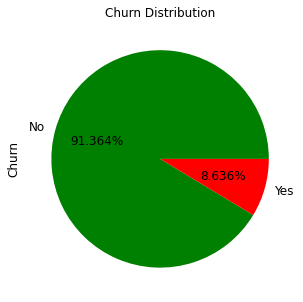

In [50]:
# Checking the customer churn distribution
ax = (df_telecom_hvc['churn'].value_counts()*100.0 /len(df_telecom_hvc)).plot.pie(autopct='%.3f%%', 
                                                                                        labels = ['No', 'Yes'],
                                                                                        colors =['g','r'],
                                                                                        figsize =(5,5), 
                                                                                        fontsize = 12 )                                                                           

ax.set_ylabel('Churn',fontsize = 12)
ax.set_title('Churn Distribution', fontsize = 12)
plt.show()


In [51]:
# Dropping columns of September month as we have derived the required target variable
df_telecom_hvc.drop(df_telecom_hvc.filter(regex=".*_9").columns, axis=1, inplace=True)

In [52]:
df_telecom_hvc.shape

(29979, 139)

### 2.5 Feature Engineering

- Date Columns :
  1. we see Date columns still have few missing values. Firstly, we shall convert it to proper Date Time format using the predefined function pd.to_datetime and convert into days.
  2. Secondly we will check if the Missing values corresponds to NO RECHARGE done in that month , if yes then we will impute it with 0. we shall calculate the days passed since last recharge by adding the number of days into new column **'days_since_last_recharge'** .This metric will give us an insight of intervals of recharge by any customer. If the days passed since last recharge widens , this may indicate Churn


In [53]:
#check null count
for i in df_telecom_hvc.columns:
    if 'date' in i:
        print("For",i,"Null Values count is :")
        print(df_telecom_hvc[i].isnull().sum())

For date_of_last_rech_6 Null Values count is :
62
For date_of_last_rech_7 Null Values count is :
114
For date_of_last_rech_8 Null Values count is :
594


In [54]:
df_telecom_hvc.filter(regex="date").columns

Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8'], dtype='object')

In [55]:
#Converting the date columns to days
df_telecom_hvc['date_of_last_rech_6']=pd.to_datetime(df_telecom_hvc['date_of_last_rech_6']).dt.day
df_telecom_hvc['date_of_last_rech_7']=pd.to_datetime(df_telecom_hvc['date_of_last_rech_7']).dt.day
df_telecom_hvc['date_of_last_rech_8']=pd.to_datetime(df_telecom_hvc['date_of_last_rech_8']).dt.day

In [56]:
#check if the missing values in the date column is due to NO RECharge done in that month
#we will impute missing values 
print("Total Recharge Amount for Missing date values for month 6: ")
print(df_telecom_hvc[df_telecom_hvc['date_of_last_rech_6'].isnull()]['total_rech_amt_6'].sum())
print("Total Recharge Amount for Missing date values for month 7: ")
print(df_telecom_hvc[df_telecom_hvc['date_of_last_rech_7'].isnull()]['total_rech_amt_7'].sum())
print("Total Recharge Amount for Missing date values for month 8: ")
print(df_telecom_hvc[df_telecom_hvc['date_of_last_rech_8'].isnull()]['total_rech_amt_8'].sum())


Total Recharge Amount for Missing date values for month 6: 
0
Total Recharge Amount for Missing date values for month 7: 
0
Total Recharge Amount for Missing date values for month 8: 
0


In [57]:
#Imputing with Zero as the Missing Values indicate no recharge done in that month (based on the corresponding rechare Amount)
df_telecom_hvc[df_telecom_hvc.filter(regex="date").columns] = df_telecom_hvc[df_telecom_hvc.filter(regex="date").columns].apply(lambda x: x.fillna(0))

In [58]:
#check null count
for i in df_telecom_hvc.columns:
    if 'date' in i:
        print("For",i,"Null Values count is :")
        print(df_telecom_hvc[i].isnull().sum())

For date_of_last_rech_6 Null Values count is :
0
For date_of_last_rech_7 Null Values count is :
0
For date_of_last_rech_8 Null Values count is :
0


In [59]:
#df_telecom_hvc[(df_telecom_hvc['date_of_last_rech_7'] == 0.0) & (df_telecom_hvc['date_of_last_rech_8'] == 0.0)]

In [60]:
# Below Snippet calculates Days passed (as on 31st August) since latest/last recharge for the months 6,7,8. 
df_telecom_hvc.loc[df_telecom_hvc['date_of_last_rech_8'] != 0.0 , 'days_since_last_recharge']= (31 - df_telecom_hvc['date_of_last_rech_8'])
df_telecom_hvc.loc[(df_telecom_hvc['date_of_last_rech_7'] != 0.0) & (df_telecom_hvc['date_of_last_rech_8'] == 0.0) , 'days_since_last_recharge']= (31 - df_telecom_hvc['date_of_last_rech_7'] + 31)
df_telecom_hvc.loc[(df_telecom_hvc['date_of_last_rech_6'] != 0.0) & (df_telecom_hvc['date_of_last_rech_7'] == 0.0) & (df_telecom_hvc['date_of_last_rech_8'] == 0.0) , 'days_since_last_recharge']= (30 - df_telecom_hvc['date_of_last_rech_6']) + 31 + 31


In [61]:
#validate the days passed count calculation
df_telecom_hvc[['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','days_since_last_recharge']].head(10)

date_of_last_rech_6  date_of_last_rech_7  date_of_last_rech_8  \
0                 27.0                 25.0                 26.0   
1                 25.0                 31.0                 30.0   
2                 20.0                 22.0                 30.0   
3                 30.0                 31.0                 14.0   
4                 30.0                 30.0                 25.0   
5                 30.0                 31.0                 31.0   
6                 23.0                 17.0                 31.0   
7                 30.0                 30.0                 26.0   
8                 30.0                 28.0                 24.0   
9                 24.0                 22.0                 31.0   

   days_since_last_recharge  
0                       5.0  
1                       1.0  
2                       1.0  
3                      17.0  
4                       6.0  
5                       0.0  
6                       0.0  
7                       5.0  
8                       7.0  
9                       0.0

In [62]:
df_telecom_hvc.filter(regex="date").columns

Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8'], dtype='object')

In [63]:
# Dropping date columns of months 6,7,8 as we derived new feature 'days_since_last_recharge' from them 
df_telecom_hvc.drop(df_telecom_hvc.filter(regex="date").columns, axis=1, inplace=True)

- The VBC columns are present in a different naming conventions , we need to fix the naming as per other columns and delete the old ones

In [64]:
# Create VBC columns with appropriate name format
df_telecom_hvc['vbc_3g_6']=df_telecom_hvc['jun_vbc_3g']
df_telecom_hvc['vbc_3g_7']=df_telecom_hvc['jul_vbc_3g']
df_telecom_hvc['vbc_3g_8']=df_telecom_hvc['aug_vbc_3g']
#Dropping the month 6,7,8 and also 9th month VBC 3G data as we have derived the required goodphase and action phase variables    
df_telecom_hvc.drop(['jun_vbc_3g', 'jul_vbc_3g', 'aug_vbc_3g','sep_vbc_3g'], axis = 1, inplace = True)

In [65]:
df_telecom_hvc.shape

(29979, 136)

## 3. Exploratory Data Analysis

As provided in our problem statement
##### Understanding customer behaviour during churn
High value Customers usually do not decide to switch to another competitor instantly, but rather over a period of time
In churn prediction, we assume three phases of customer lifecycle :

- The ‘good’ phase: In this phase, the customer is happy with the service and behaves as usual.

- The ‘action’ phase: The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a  competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

- The ‘churn’ phase: In this phase, the customer is said to have churned. You define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, after tagging churn as 1/0 based on this phase, you discard all data corresponding to this phase.


In this case, since you are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase.



In [66]:
df_telecom_hvc.head(25)

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou    arpu_6    arpu_7  \
0              0.0             0.0             0.0  1069.180  1349.850   
1              0.0             0.0             0.0   378.721   492.223   
2              0.0             0.0             0.0   492.846   205.671   
3              0.0             0.0             0.0   430.975   299.869   
4              0.0             0.0             0.0   690.008    18.980   
5              0.0             0.0             0.0   514.453   597.753   
6              0.0             0.0             0.0   422.050   359.730   
7              0.0             0.0             0.0   977.020  2362.833   
8              0.0             0.0             0.0   363.987   486.558   
9              0.0             0.0             0.0   482.832   425.764   
10             0.0             0.0             0.0  1873.271   575.927   
11             0.0             0.0             0.0   978.077  1141.296   
12             0.0             0.0             0.0   452.624   320.548   
13             0.0             0.0             0.0  1201.298   687.704   
14             0.0             0.0             0.0   410.261   430.205   
15             0.0             0.0             0.0   565.516   390.307   
16             0.0             0.0             0.0   809.518   794.775   
17             0.0             0.0             0.0  2401.829  1873.764   
18             0.0             0.0             0.0   324.449   382.389   
19             0.0             0.0             0.0    30.000    82.378   
20             0.0             0.0             0.0   623.635   712.818   
21             0.0             0.0             0.0   465.794   530.596   
22             0.0             0.0             0.0   676.999   786.560   
23             0.0             0.0             0.0   374.863   294.023   
24             0.0             0.0             0.0   512.524   402.001   

      arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0   3171.480        57.84        54.68        52.29        453.43   
1    137.362       413.69       351.03        35.08         94.66   
2    593.260       501.76       108.39       534.24        413.31   
3    187.894        50.51        74.01        70.61        296.29   
4     25.499      1185.91         9.28         7.79         61.64   
5    637.760       102.41       132.11        85.14        757.93   
6    354.793       124.19        55.19       141.11        450.33   
7    409.230         0.00         0.00         0.00          0.00   
8    393.909       248.99       619.96       666.38         88.86   
9    229.769        86.39       118.88        80.44        232.36   
10   179.218      2061.69       881.43       156.91       1087.76   
11   706.020       135.14       119.59       102.69        479.31   
12   368.807        34.46        43.11        50.61        131.59   
13   602.052        61.23         7.39        62.89        165.41   
14   289.228        62.24        85.68        27.54        200.01   
15   430.911       178.41       226.81       170.11        186.68   
16    33.060       181.63       257.06         0.00       1608.76   
17   722.368      2020.84      3220.46      1074.98       3897.06   
18   350.360       381.23       635.28       551.61        110.36   
19   674.950         0.00        34.23       149.69          0.00   
20   560.995       162.68       133.49       132.79        362.36   
21   463.903       178.46        92.96       144.81        373.08   
22   377.488       113.24       360.04        74.49       1381.26   
23   183.043       433.59       415.66       221.06         74.54   
24  1144.254       314.66       197.01       176.98        223.16   

    offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0         567.16        325.91          16.23          33.49          31.64   
1          80.63        136.48           0.00           0.00           0.00   
2         119.28        482.46          23.53  

In [67]:
# Filtering the common monthly columns for each month
comcol = df_telecom_hvc.filter(regex ='_6').columns
monthlycol = [item.strip('_6') for item in comcol]
print("Monthly Columns:")
print(monthlycol)
print()
print()
# getting the number of monthly columns and profile columns
print ("Total number of columns in data :", df_telecom_hvc.shape[1] )
print ("Number of columns for each month : ",len(monthlycol))
print ("Total monthly columns among the orignal columns (%d*4): %d"%(len(monthlycol), len(monthlycol) * 3))
print ("Columns other than monthly columns :", df_telecom_hvc.shape[1] - (len(monthlycol) * 3))

Monthly Columns:
['arpu', 'onnet_mou', 'offnet_mou', 'roam_ic_mou', 'roam_og_mou', 'loc_og_t2t_mou', 'loc_og_t2m_mou', 'loc_og_t2f_mou', 'loc_og_t2c_mou', 'loc_og_mou', 'std_og_t2t_mou', 'std_og_t2m_mou', 'std_og_t2f_mou', 'std_og_t2c_mou', 'std_og_mou', 'isd_og_mou', 'spl_og_mou', 'og_others', 'total_og_mou', 'loc_ic_t2t_mou', 'loc_ic_t2m_mou', 'loc_ic_t2f_mou', 'loc_ic_mou', 'std_ic_t2t_mou', 'std_ic_t2m_mou', 'std_ic_t2f_mou', 'std_ic_t2o_mou', 'std_ic_mou', 'total_ic_mou', 'spl_ic_mou', 'isd_ic_mou', 'ic_others', 'total_rech_num', 'total_rech_amt', 'max_rech_amt', 'last_day_rch_amt', 'vol_2g_mb', 'vol_3g_mb', 'monthly_2g', 'sachet_2g', 'monthly_3g', 'sachet_3g', 'avg_rech_amt_6_7', 'vbc_3g']


Total number of columns in data : 136
Number of columns for each month :  44
Total monthly columns among the orignal columns (44*4): 132
Columns other than monthly columns : 4


- Upon observing the value counts of Monthly and Sachet columns , we can categorize them as categorical variables to perform EDA

### 3.1 Plotting Categorical Variables

In [68]:
df_telecom_hvc['monthly_2g_6'].value_counts()

0    26651
1     2950
2      345
3       26
4        7
Name: monthly_2g_6, dtype: int64

In [69]:
df_telecom_hvc['monthly_2g_7'].value_counts()

0    26526
1     3011
2      406
3       29
4        5
5        2
Name: monthly_2g_7, dtype: int64

In [70]:
df_telecom_hvc['monthly_2g_8'].value_counts()

0    26909
1     2758
2      283
3       22
4        5
5        2
Name: monthly_2g_8, dtype: int64

In [71]:
df_telecom_hvc['sachet_2g_6'].value_counts()


0     24754
1      2361
2      1007
3       604
4       399
5       210
6       152
7       106
8        86
9        71
10       52
12       44
11       30
13       17
14       16
15       13
17       11
19        9
18        9
16        7
22        4
21        3
24        3
20        3
25        3
39        1
34        1
27        1
32        1
30        1
Name: sachet_2g_6, dtype: int64

In [72]:
df_telecom_hvc['sachet_2g_7'].value_counts()

0     24525
1      2171
2      1005
3       589
4       452
5       360
6       253
7       163
8       121
10       72
9        65
11       48
12       29
14       24
13       20
15       15
16       11
18       10
17        9
20        8
19        7
27        3
21        3
26        3
30        2
22        2
23        2
48        1
25        1
24        1
32        1
29        1
35        1
42        1
Name: sachet_2g_7, dtype: int64

In [73]:
df_telecom_hvc['monthly_3g_6'].value_counts()

0     26401
1      2540
2       697
3       207
4        74
5        32
6        11
7         9
8         3
9         2
11        2
14        1
Name: monthly_3g_6, dtype: int64

In [74]:
cat_cols = [ 'monthly_2g_6', 'monthly_2g_7','monthly_2g_8',
            'sachet_2g_6','sachet_2g_7','sachet_2g_8',
            'sachet_3g_6','sachet_3g_7','sachet_3g_8',
            'monthly_3g_6','monthly_3g_7','monthly_3g_8'] 

In [75]:
#Plotting a countplot with all the variables

def cat_plotter(regex_pattern,rows,columns,figsize_b,figsize_h,xtick_rotation):
    cat_cols=df_telecom_hvc.filter(regex=regex_pattern).columns
    fig, axes = plt.subplots(rows,columns,sharex=True, sharey=True, figsize=(figsize_b, figsize_h))

    total = float(len(df_telecom_hvc))
    for i, ax in enumerate(fig.axes):
        if i < len(cat_cols):
            ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=xtick_rotation)
            sns.countplot(x=cat_cols[i], alpha=0.7, data=df_telecom_hvc, hue=df_telecom_hvc['churn'],palette=['g','r'], ax=ax)
            # Renaming the Legends from 0/1 to Not Churn/Churn
            ax.legend(['Not Churn','Churn'],loc="upper right")
            # adjusting font size of X-Labels and Y-Labels
            ax.set_xlabel(cat_cols[i],fontsize=12)
            ax.set_ylabel('count',fontsize=12)
            # adding annotations
            for p in ax.patches:
                height = p.get_height()
                ax.annotate('{:.1f}%'.format((p.get_height()/len(df_telecom_hvc))*100),
                    (p.get_x() + p.get_width() / 2., p.get_height()),# coordinates where text should be there
                   ha = 'center', va = 'center',# alignment of the text
                   xytext = (0, 7),# distance of text from top of the patch
                   textcoords = 'offset points', #do not change and remove it
                   fontsize=8,
                    rotation=0)
    fig.tight_layout()
            


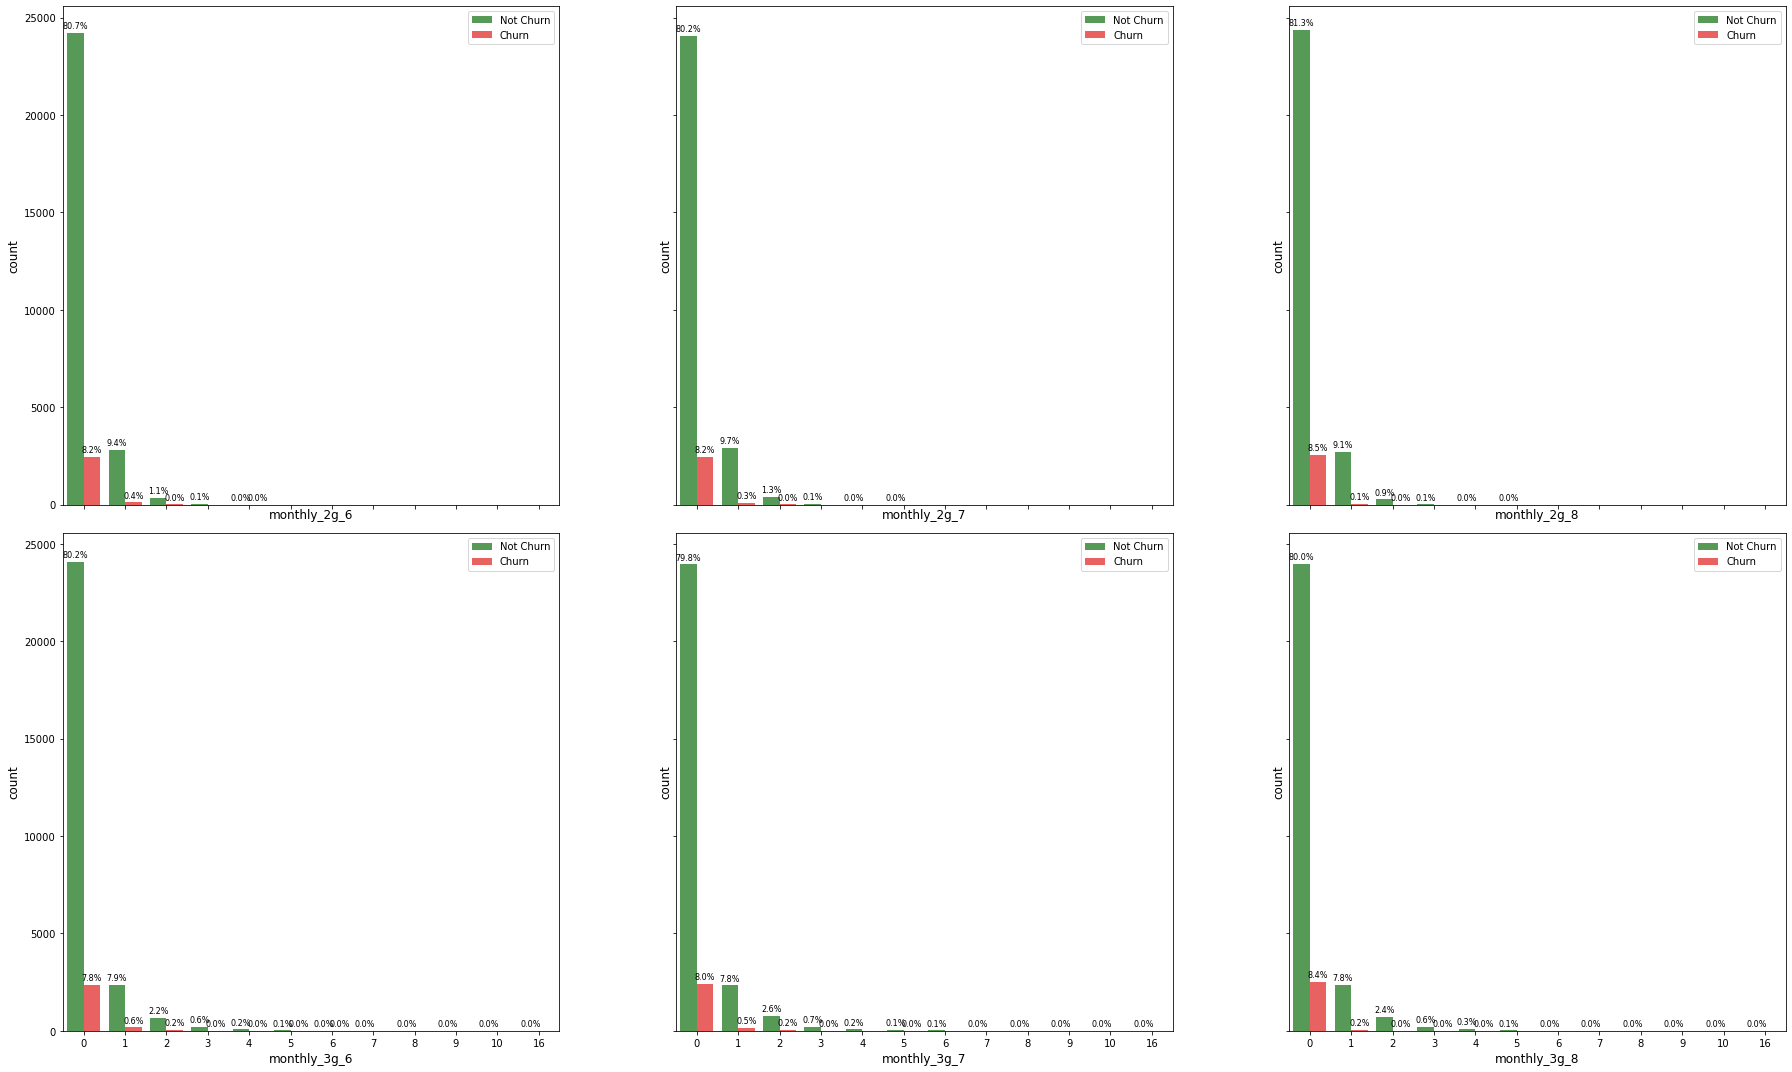

In [76]:

# pass variables as cat_plotter(regex_pattern,rows,columns,figsize_b,figsize_h,xtick_rotation)
cat_plotter('monthly',2,3,25,15,0)

##### Insights:

1. Around 80-81% of the high value customers DO NOT have any monthly services subscribed , both on 2G and 3G Network. 
2. Customers having 1 Monthly service active have least churn-out, which is a good indicator. Also this churnout count is decreasing across the months.
3. Customers on 2G network tend to opt for single Monthly service more compared to customers on 3G Network with Single Monthly Service scheme. In 3G network customers tend to opt for more than 1 monthly service


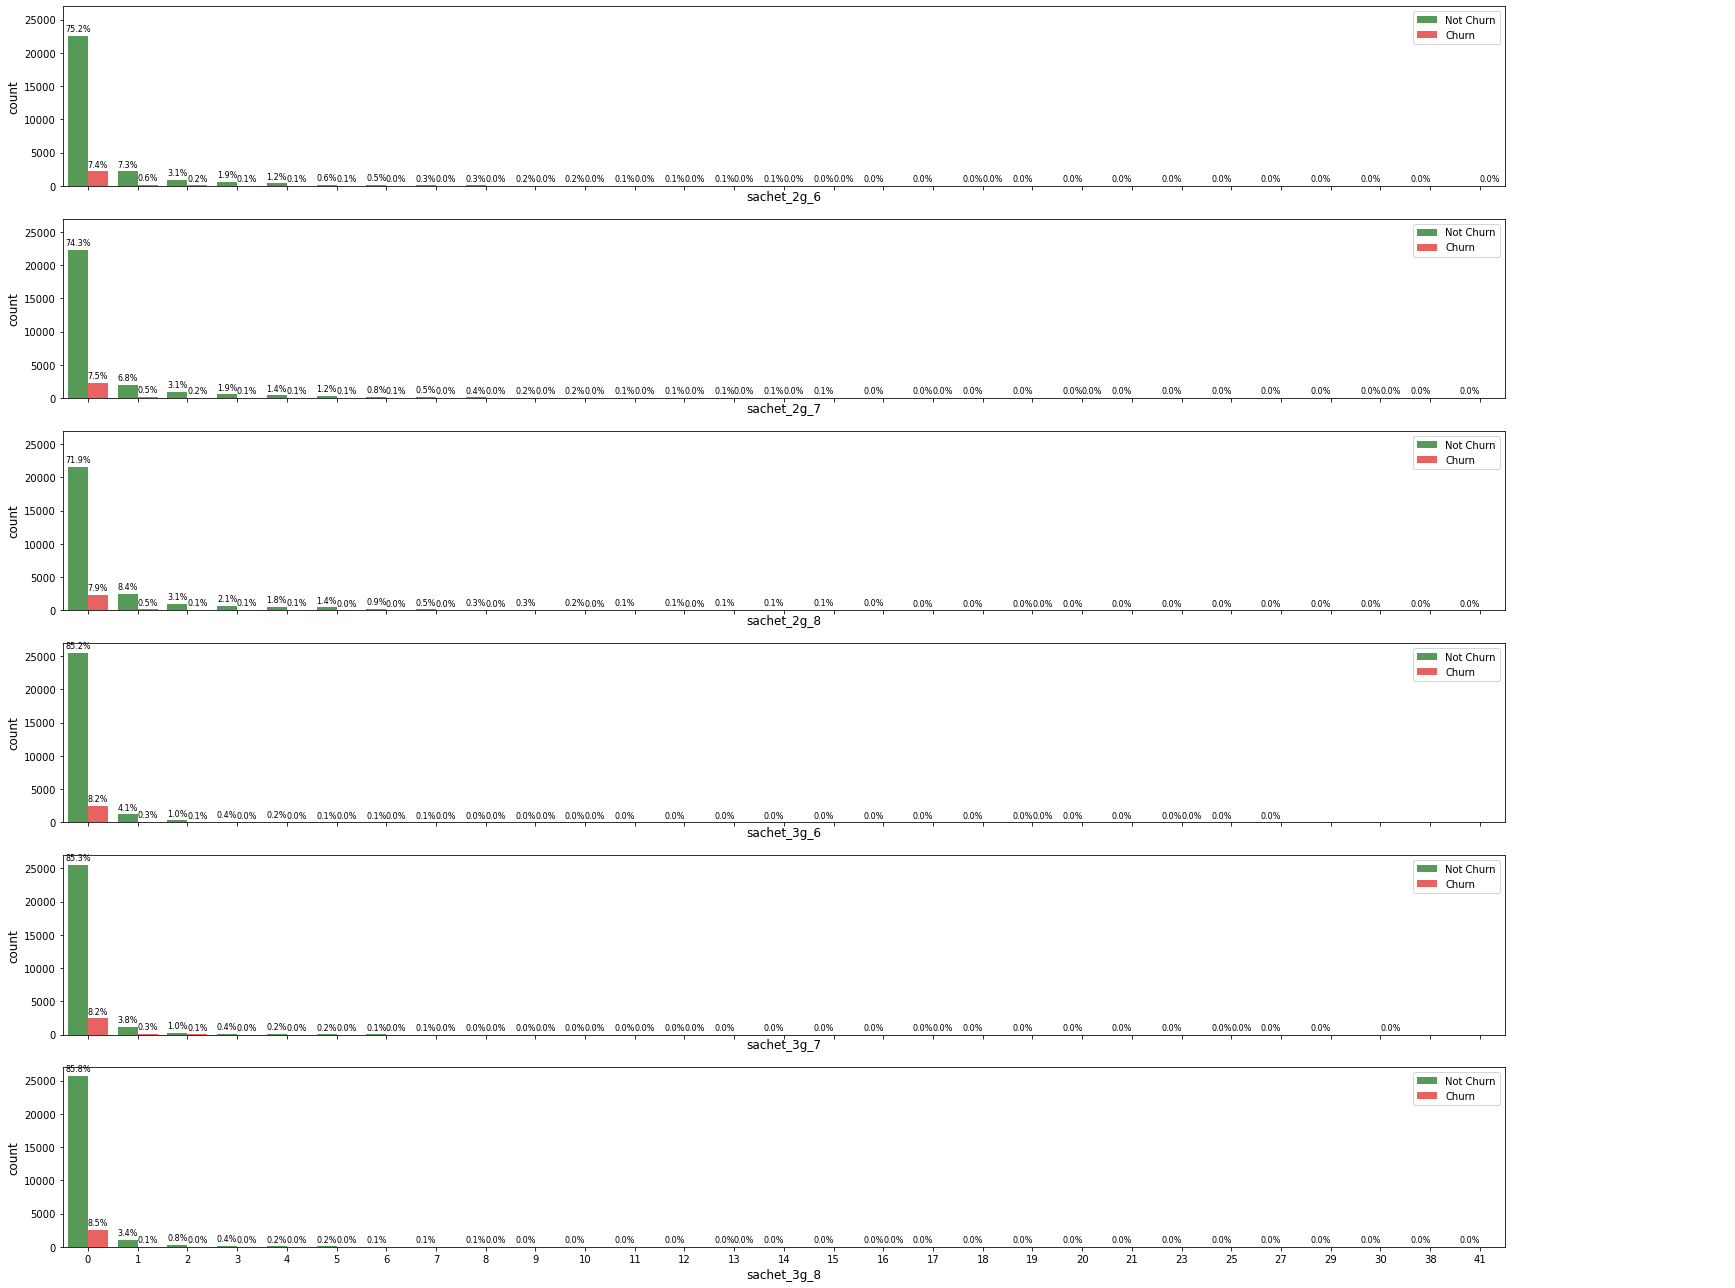

In [77]:
# pass variables as cat_plotter(regex_pattern,rows,columns,figsize_b,figsize_h,xtick_rotation)
cat_plotter('sachet',6,1,24,18,0)

#### Insights:

1. Around 85% of the HighValue Customers have not opted for sachet_3g and around 70% of Highvalue customers have NOT opted for sachet_2g packs across the months
2. Overall  we see a decreasing trend in the percentage of 0 and 1 sachet packs in 2G and 3G both, However it can also be observed that churnout ratio is lesser if Customer has opted for atleast 1 sachet pack

### 3.2 Plotting Column AON 

In [78]:
# Function to plot the histogram with labels
# https://stackoverflow.com/questions/6352740/matplotlib-label-each-bin
def plot_hist(dataset,col,binsize):
    fig, ax = plt.subplots(figsize=(15,4))
    counts, bins, patches = ax.hist(dataset[col],bins=range(0,dataset[col].max(),round(binsize)), facecolor='lightblue', edgecolor='Grey')
    
    # Set the ticks to be at the edges of the bins.
    ax.set_xticks(bins)
    bin_centers = 0.5 * np.diff(bins) + bins[:-1]
    for count, x in zip(counts, bin_centers):
        # Label the percentages
        percent = '%0.0f%%' % (100 * float(count) / counts.sum())
        ax.annotate(percent, xy=(x,0.2), xycoords=('data', 'axes fraction'),
        xytext=(0, -32), textcoords='offset points', va='top', ha='center')
    
    ax.set_xlabel(col.upper())
    ax.set_ylabel('Count')
    # Give ourselves some more room at the bottom of the plot
    #plt.subplots_adjust(bottom=0.15)
    plt.show()

count    29979.000000
mean      1264.158911
std        975.181038
min        180.000000
25%        480.000000
50%        914.000000
75%       1923.500000
max       4321.000000
Name: aon, dtype: float64


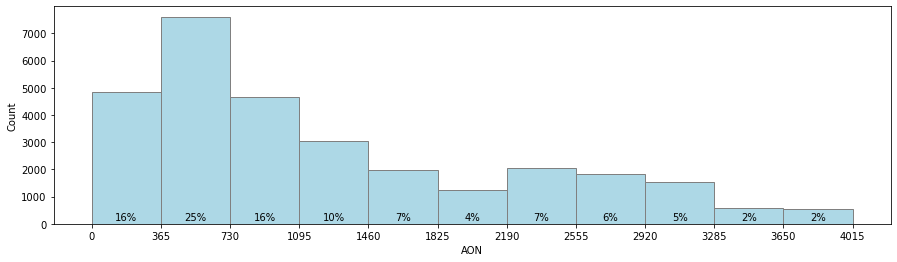

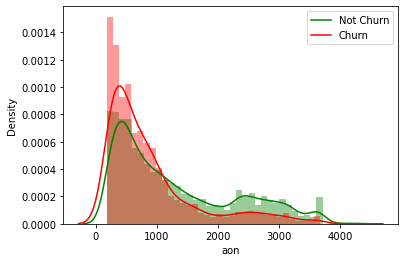

In [79]:
# Customers distribution of the age on network
print(df_telecom_hvc.aon.describe())
plot_hist(df_telecom_hvc,'aon',365)
sns.distplot(df_telecom_hvc.loc[df_telecom_hvc['churn']==0,'aon'],hist=True, color = 'g')
sns.distplot(df_telecom_hvc.loc[df_telecom_hvc['churn']==1,'aon'],hist=True, color='r')
plt.legend(['Not Churn','Churn'])
plt.show()

##### Insights:
- AON is Age on network - number of days the customer is using the operator T network
- A chunk (quarter) of High Value customers are in Year 2 with this Network
- Minimum Age on network is 180 days.
- Average age on network for customers is 1264 days (3.4 years).
- 15% users are with the network from over 7 years.
- KDE plot shows that customers with prolonged tenure with the Network have lesser chances of churn .
- Chur to Non Churn ratio is very high until 3 Years ,this could be focussed as one of the parameters to retain the customers. 

### 3.3 Plotting Column "days_since_last_recharge" 


count    29979.000000
mean         4.879082
std          7.692669
min          0.000000
25%          1.000000
50%          3.000000
75%          6.000000
max         85.000000
Name: days_since_last_recharge, dtype: float64


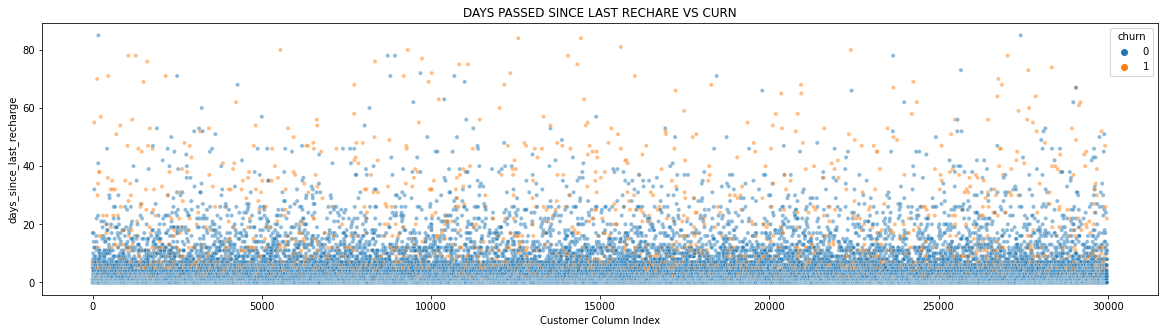

In [80]:
#sns.scatterplot(x='days_since_last_recharge',y= , data=df_telecom_hvc, hue='churn' )
print(df_telecom_hvc['days_since_last_recharge'].describe())
plt.figure(figsize=(20 ,5))
sns.scatterplot(x =df_telecom_hvc['days_since_last_recharge'].index, y = df_telecom_hvc['days_since_last_recharge'], hue = df_telecom_hvc['churn'], alpha=0.5, s=17)
plt.xlabel("Customer Column Index")
plt.title("DAYS PASSED SINCE LAST RECHARE VS CURN")
plt.show()

##### Insights:
1. As the days passed since last recharge increases , it may indicate tendency to churn as evident from the plot above

### 3.4 Plotting Numerical Variables
#### Identify NUMERICAL Columns and Monthly Column Patterns

In [81]:
comcol = df_telecom_hvc.filter(regex ='_8').columns
num_cols = [item.strip('_8') for item in comcol]

cat_cols_pat = [ 'monthly_2g',
            'sachet_2g',
            'sachet_3g',
            'monthly_3g']

for i in cat_cols_pat:
    num_cols.remove(i)

print("NUMERICAL COLUMNS PATTERN :")
print(num_cols)


NUMERICAL COLUMNS PATTERN :
['arpu', 'onnet_mou', 'offnet_mou', 'roam_ic_mou', 'roam_og_mou', 'loc_og_t2t_mou', 'loc_og_t2m_mou', 'loc_og_t2f_mou', 'loc_og_t2c_mou', 'loc_og_mou', 'std_og_t2t_mou', 'std_og_t2m_mou', 'std_og_t2f_mou', 'std_og_t2c_mou', 'std_og_mou', 'isd_og_mou', 'spl_og_mou', 'og_others', 'total_og_mou', 'loc_ic_t2t_mou', 'loc_ic_t2m_mou', 'loc_ic_t2f_mou', 'loc_ic_mou', 'std_ic_t2t_mou', 'std_ic_t2m_mou', 'std_ic_t2f_mou', 'std_ic_t2o_mou', 'std_ic_mou', 'total_ic_mou', 'spl_ic_mou', 'isd_ic_mou', 'ic_others', 'total_rech_num', 'total_rech_amt', 'max_rech_amt', 'last_day_rch_amt', 'vol_2g_mb', 'vol_3g_mb', 'vbc_3g']


In [82]:
# Define function for Plotting Numerical plot using Boxplots

def num_plotter(regex_pattern,rows,columns,figsize_b,figsize_h): # pass regex pattern , rows, columns, figsize breadth , figsize height
    num_cols=df_telecom_hvc.filter(regex=regex_pattern).columns
    fig, axes = plt.subplots(rows,columns, sharex=True,sharey=True ,figsize=(figsize_b, figsize_h))

    total = float(len(df_telecom_hvc))
    axes = axes.ravel()
    for i, ax in enumerate(fig.axes):
        if i < len(num_cols):
            ax.set_xticklabels(ax.xaxis.get_majorticklabels())
            sns.boxplot(y=num_cols[i], data=df_telecom_hvc, x='churn', ax=ax)
            #sns.histplot(data=df_telecom_hvc, x=num_cols[i],kde=True , hue='churn')
            #sns.histplot(data=df_telecom_hvc, x =num_cols[i] ,kde=True , hue='churn')
            # Renaming the Legends from 0/1 to Not Churn/Churn
            ax.legend(['Not Churn','Churn'],loc="upper right")
            # adjusting font size of X-Labels and Y-Labels
            #ax.set_xlabel(num_cols[i],fontsize=12)
            #ax.set_ylabel('churn',fontsize=12)

    fig.tight_layout()
    #return df_telecom_hvc.groupby('churn')[num_cols].mean()

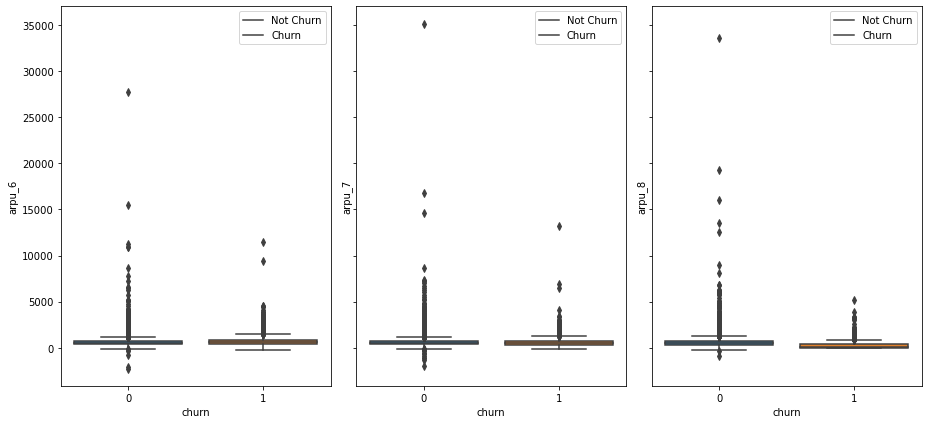

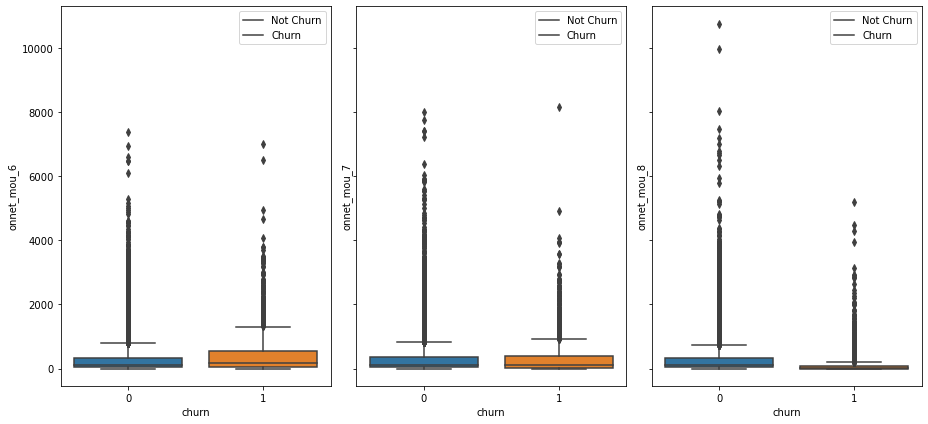

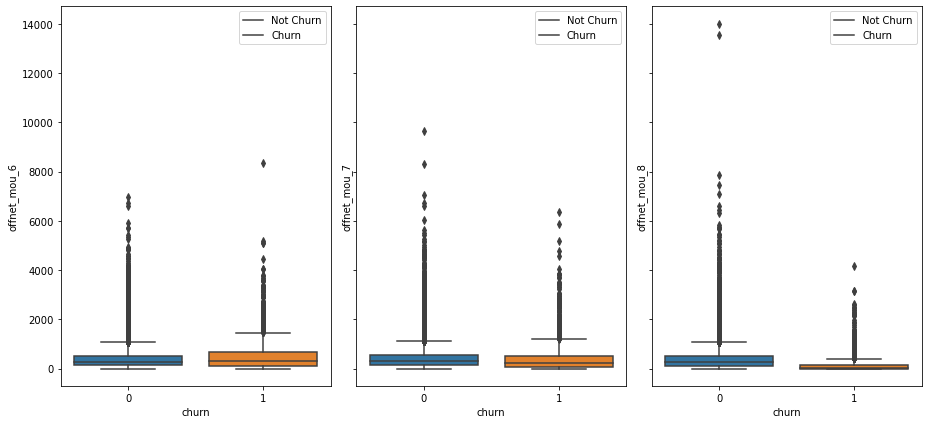

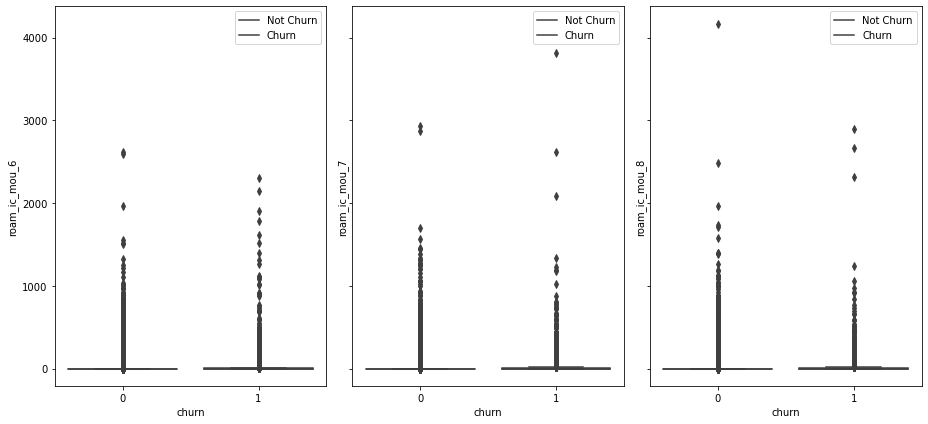

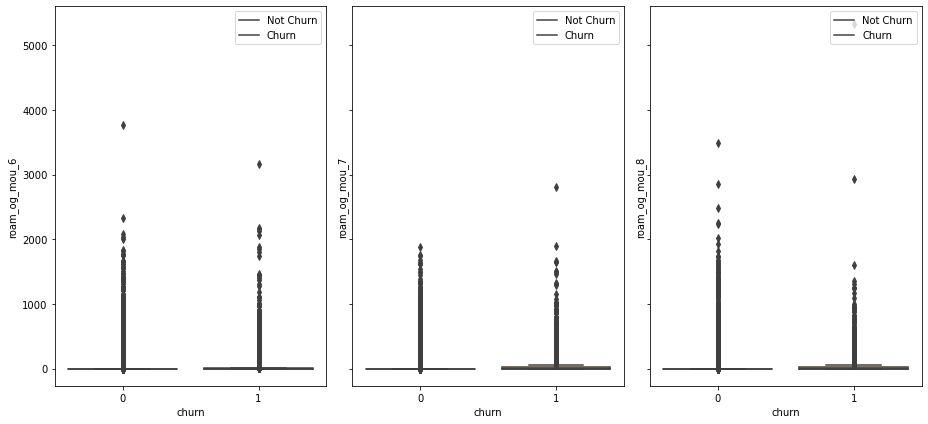

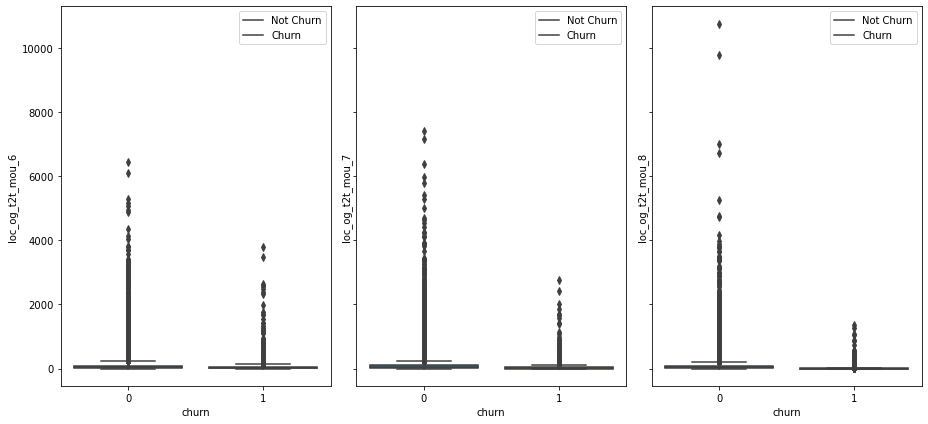

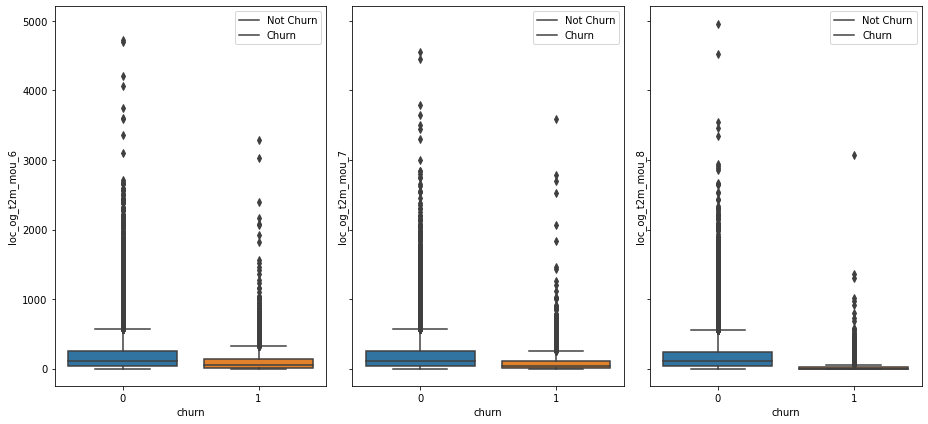

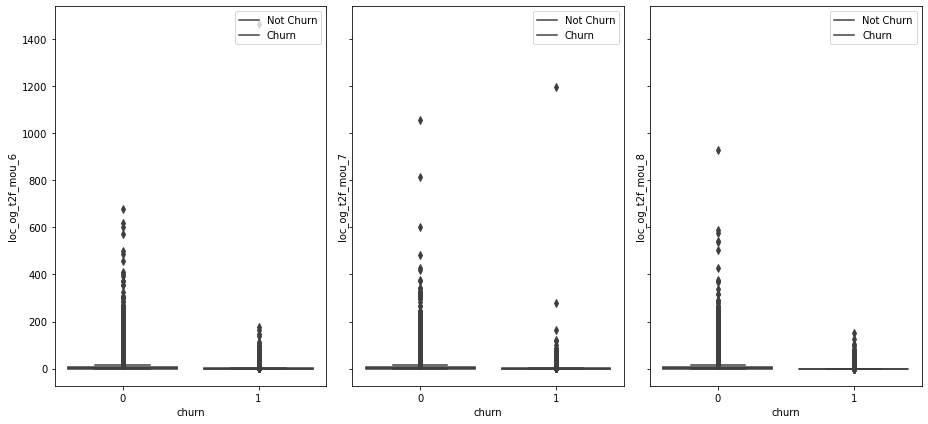

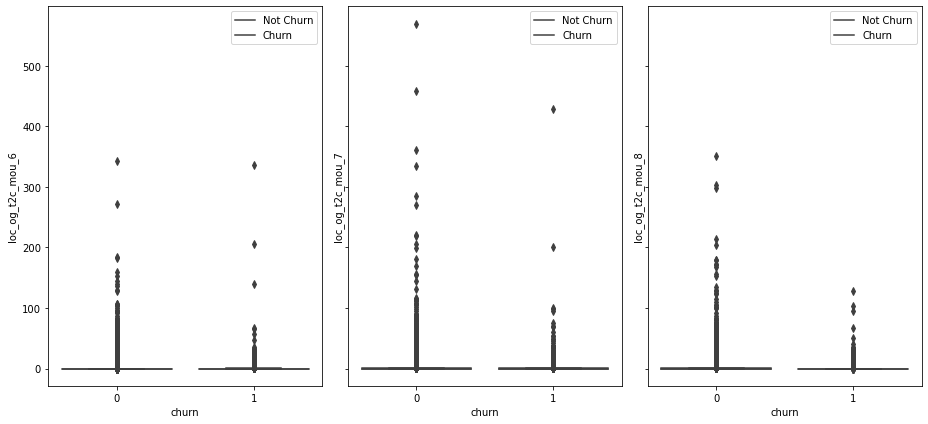

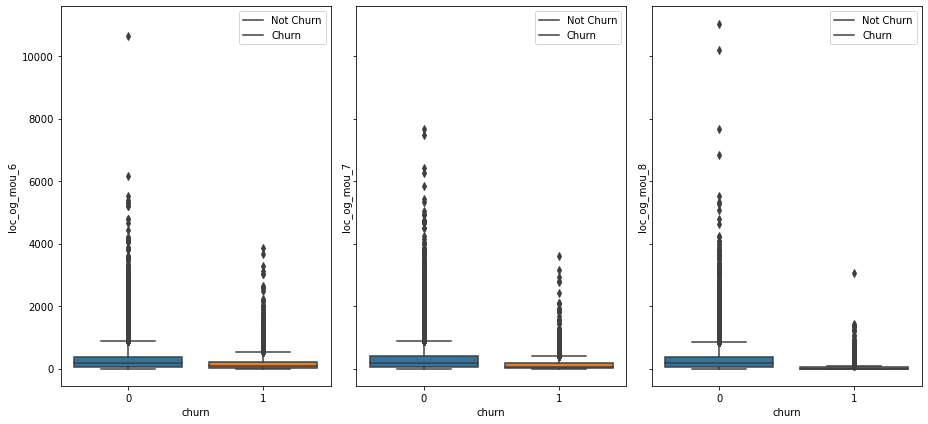

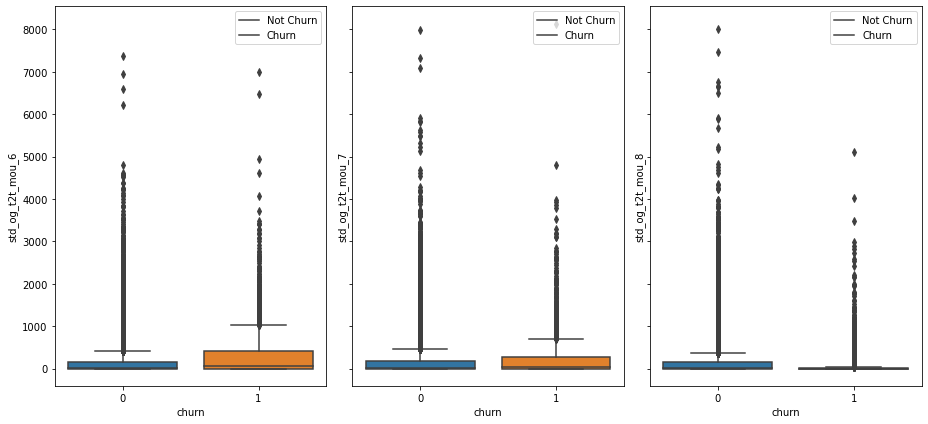

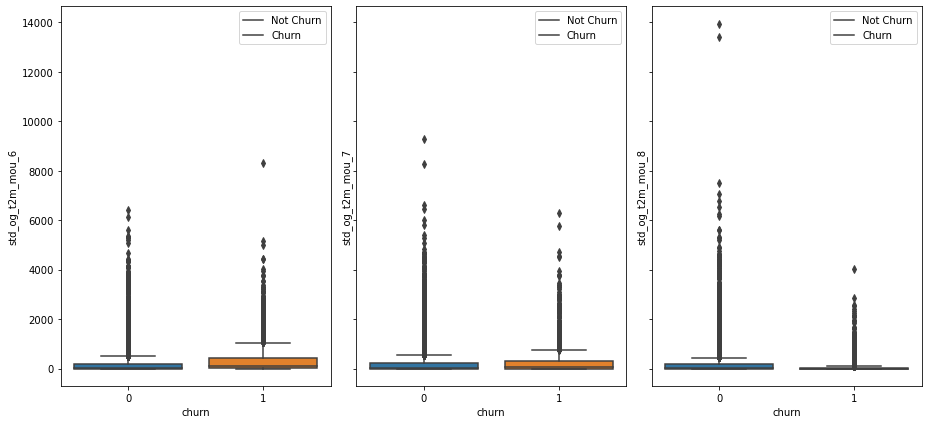

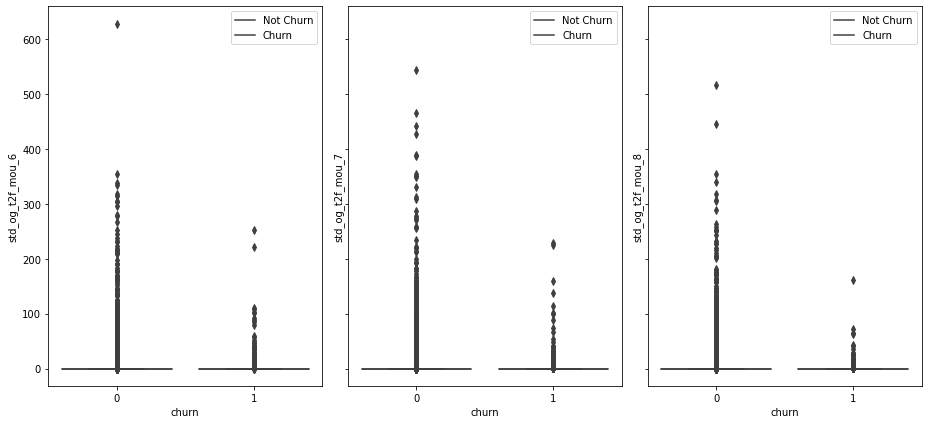

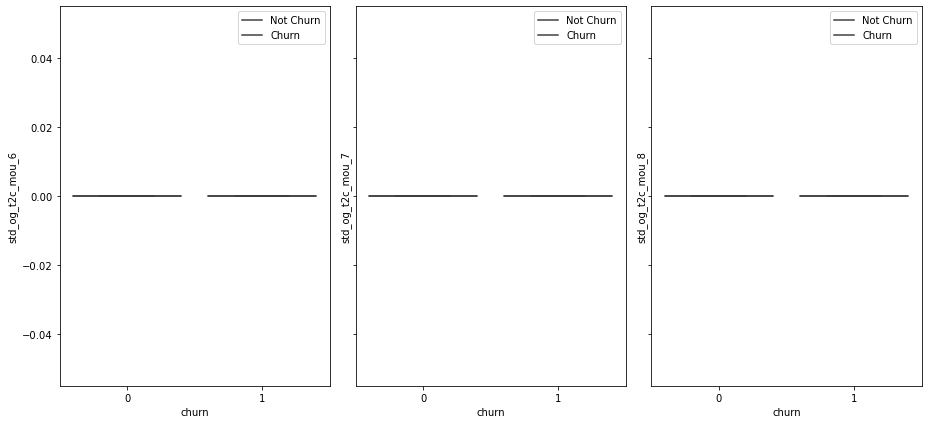

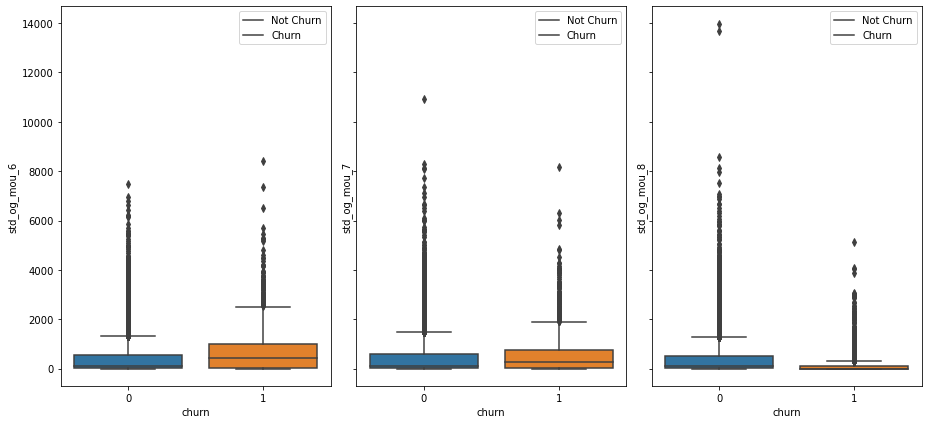

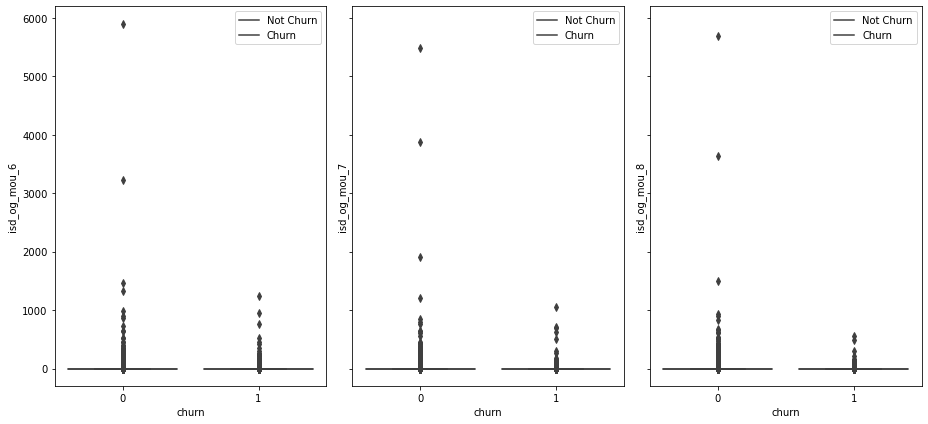

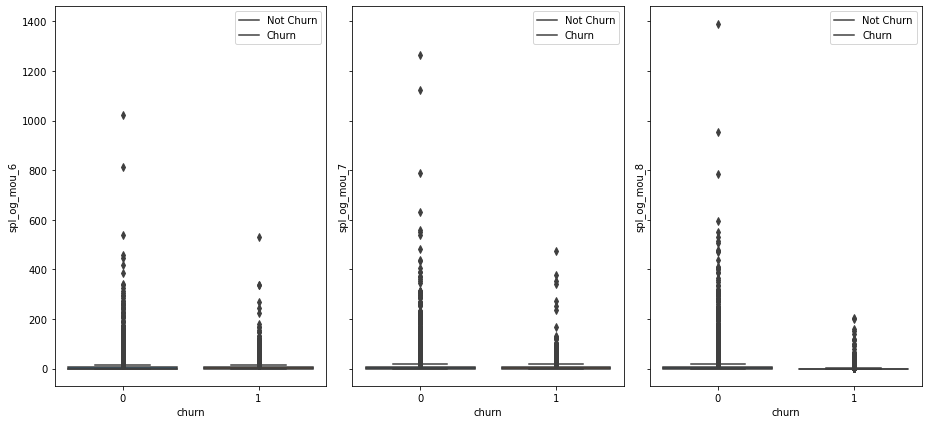

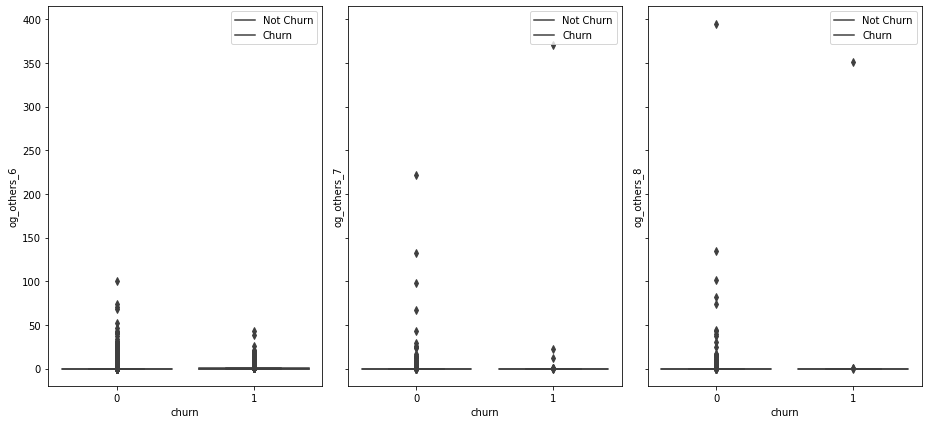

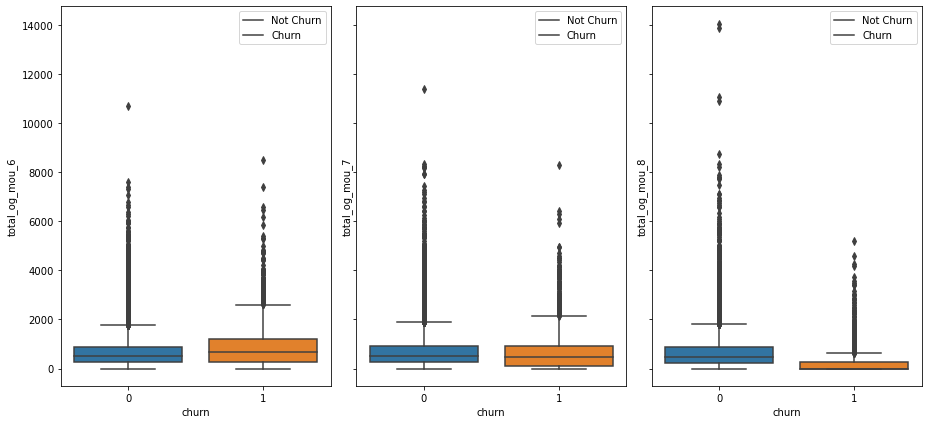

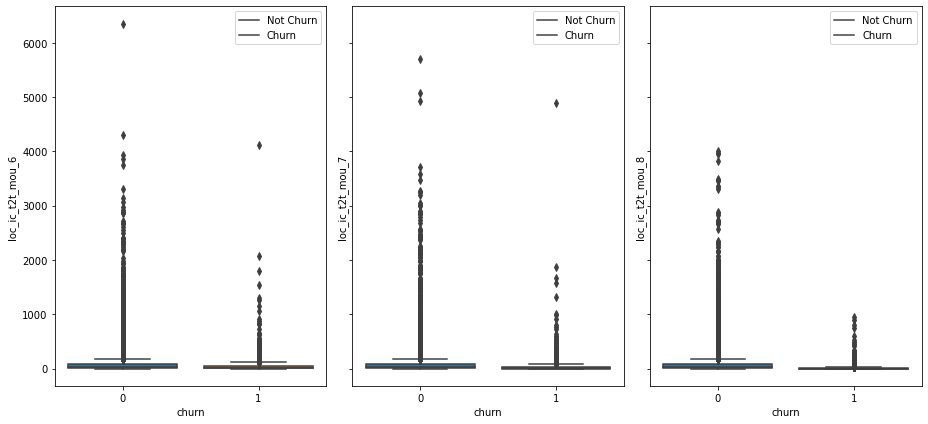

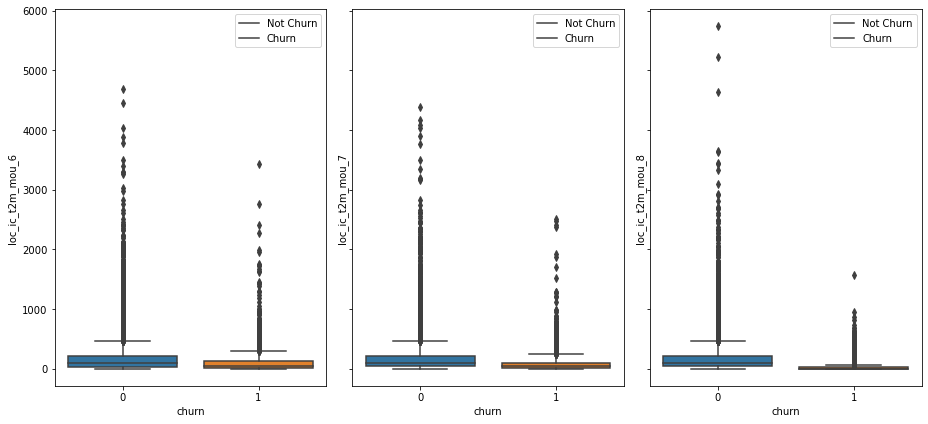

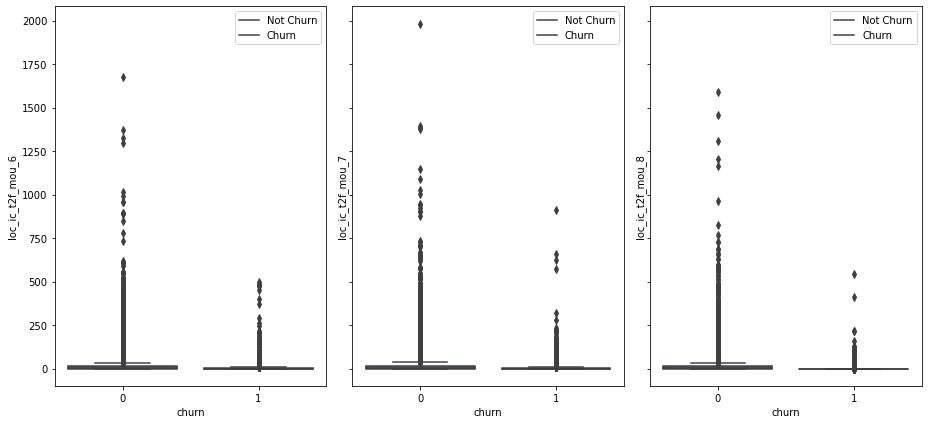

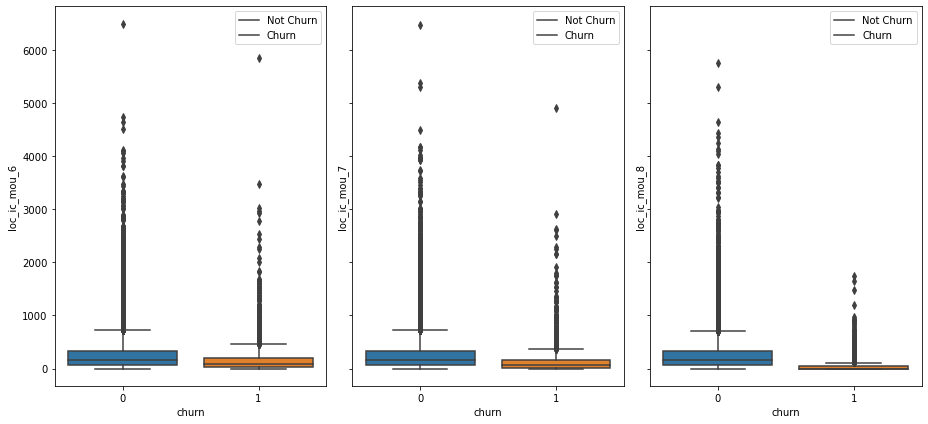

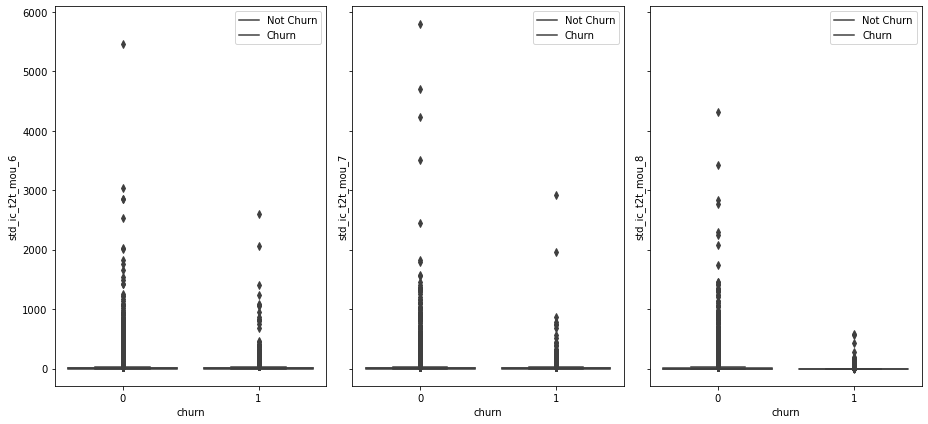

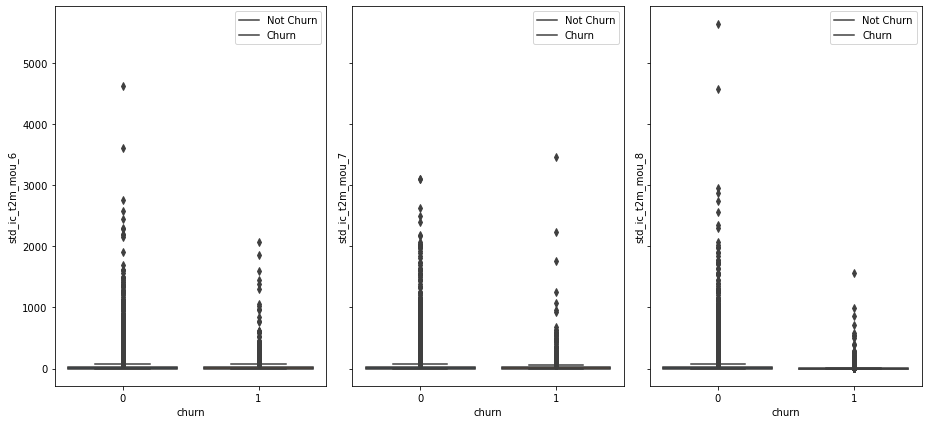

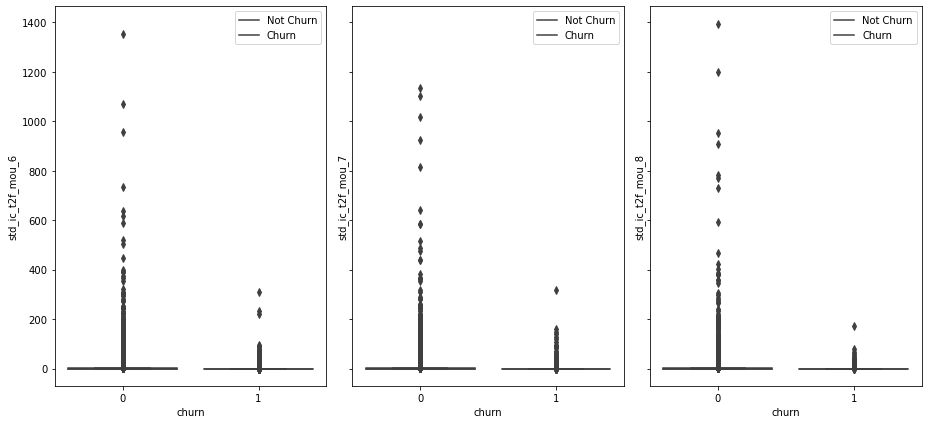

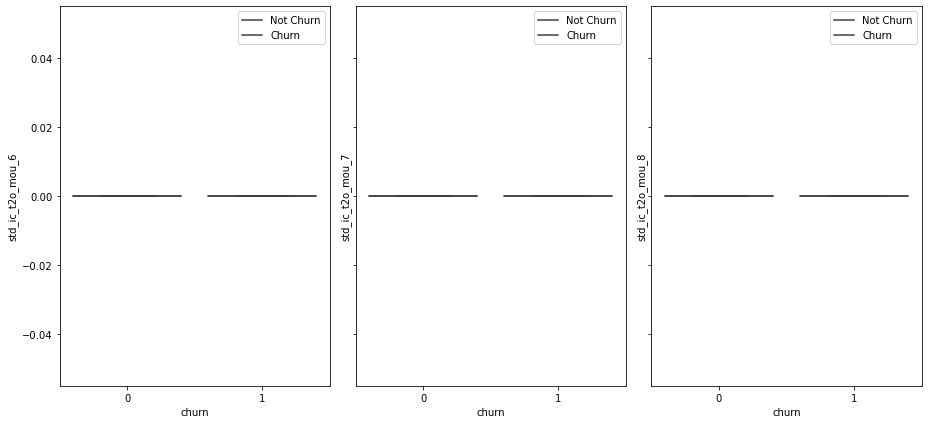

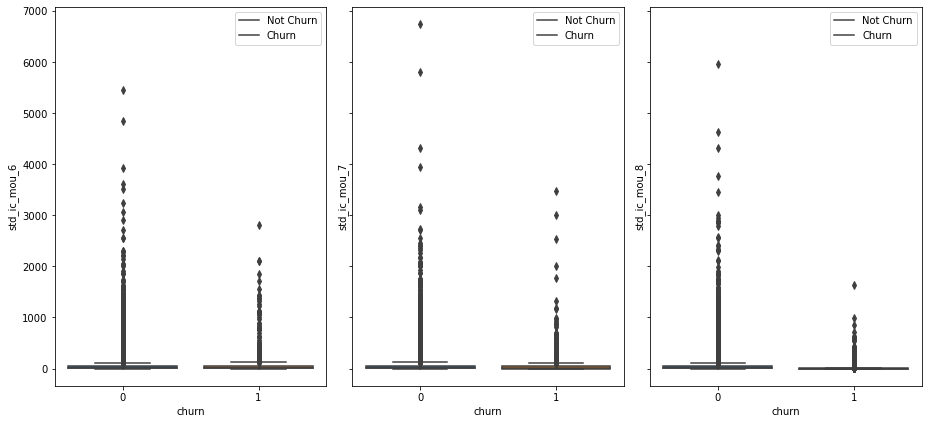

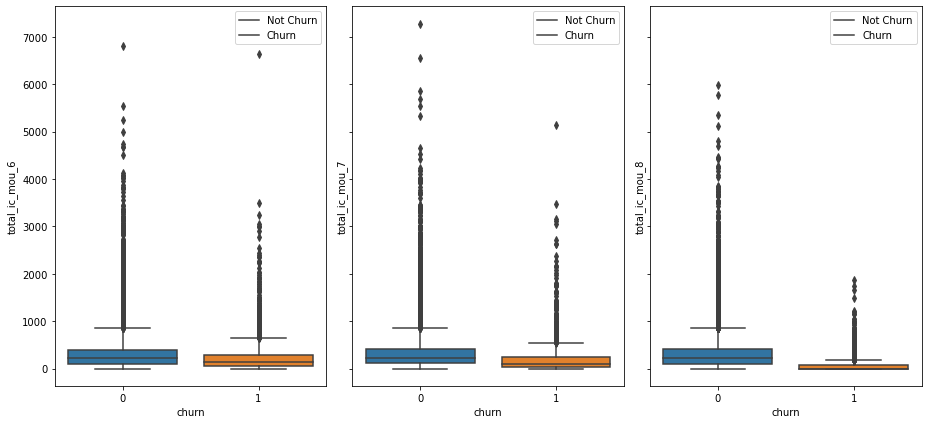

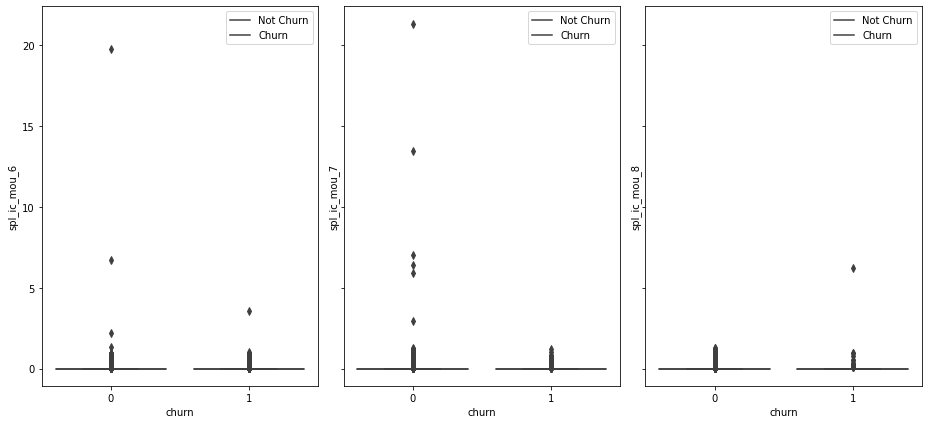

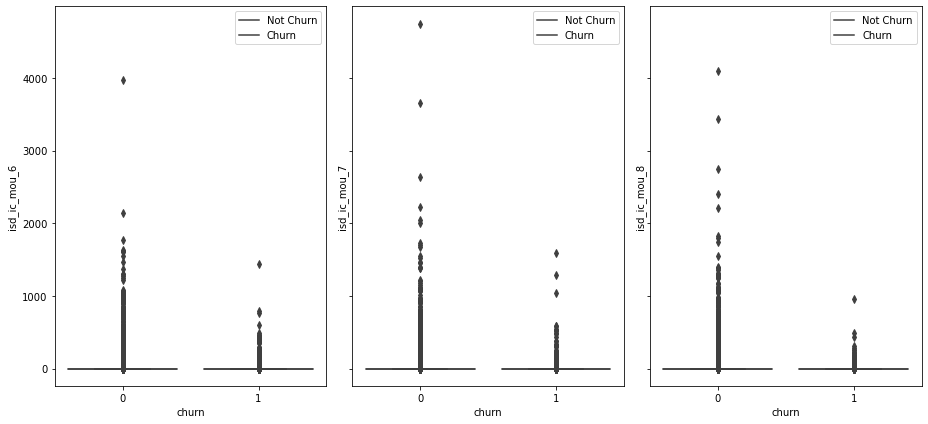

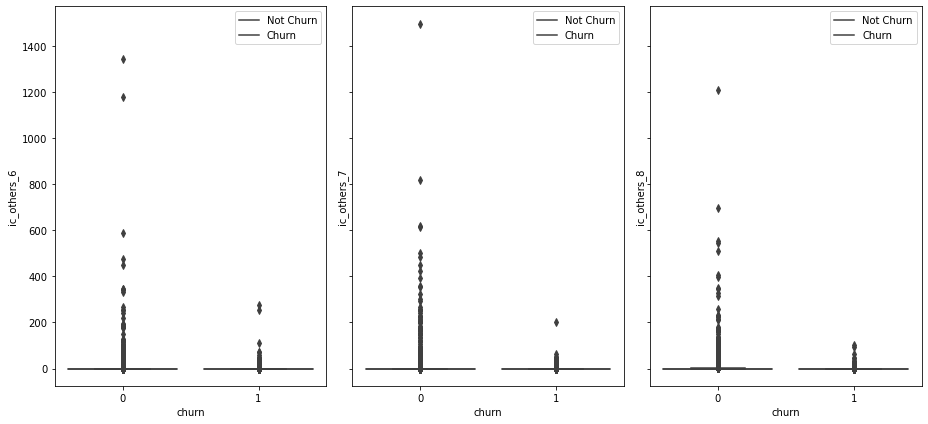

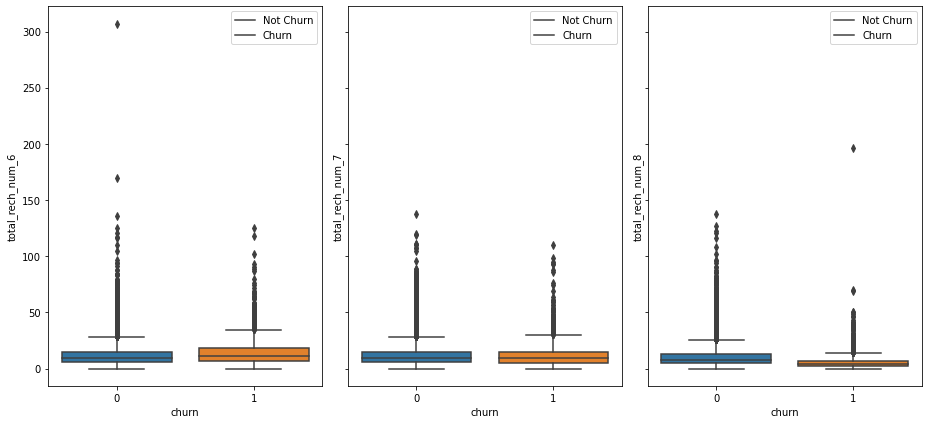

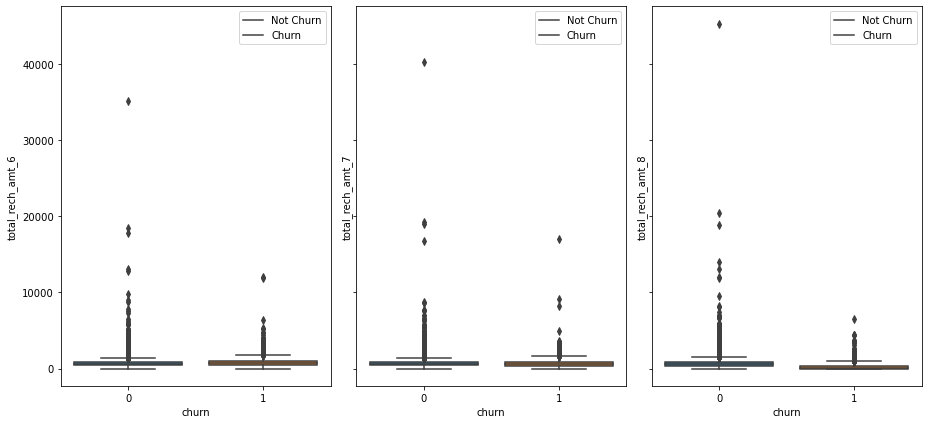

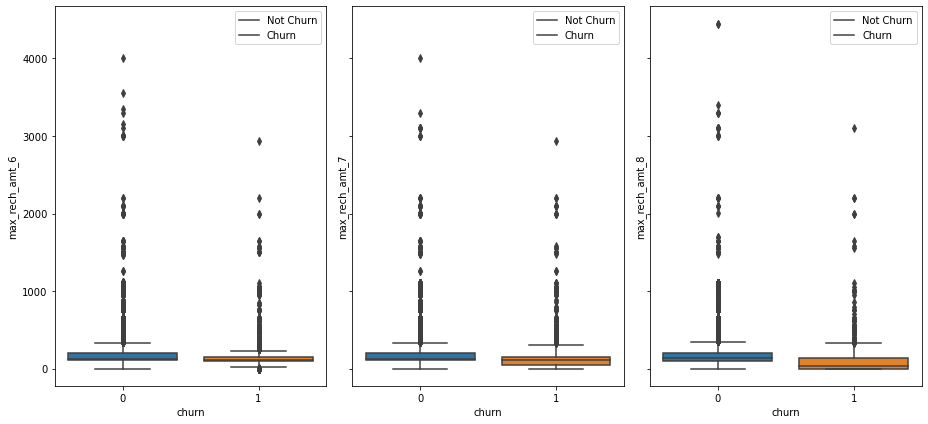

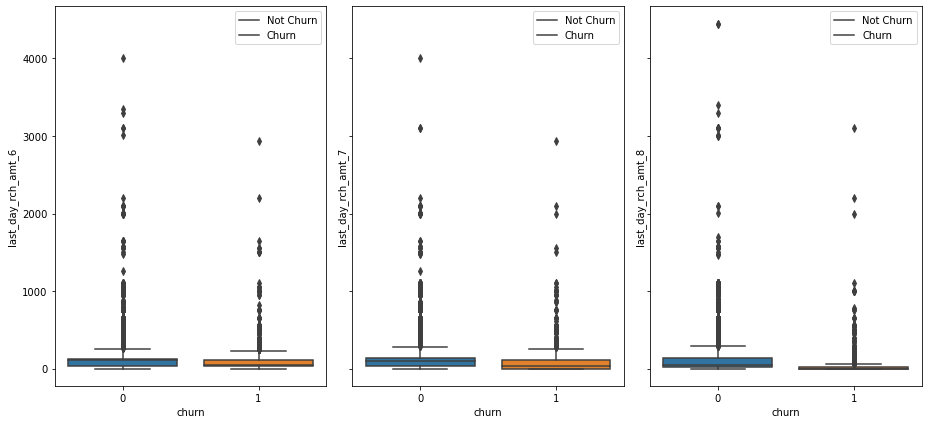

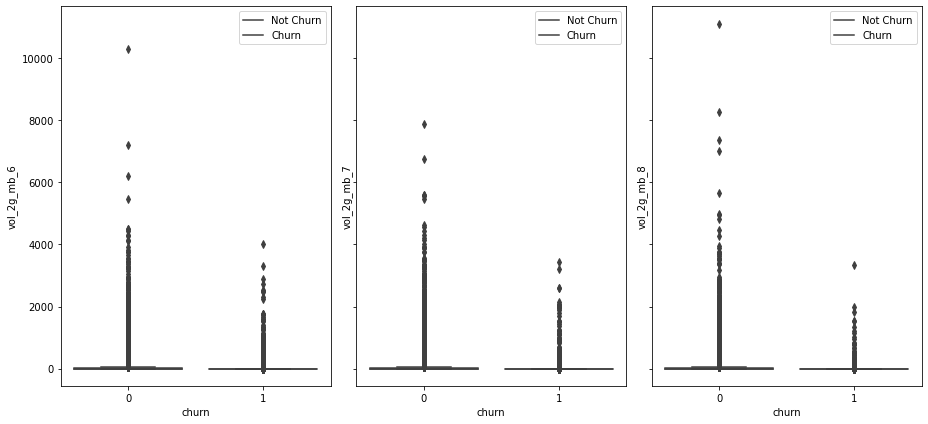

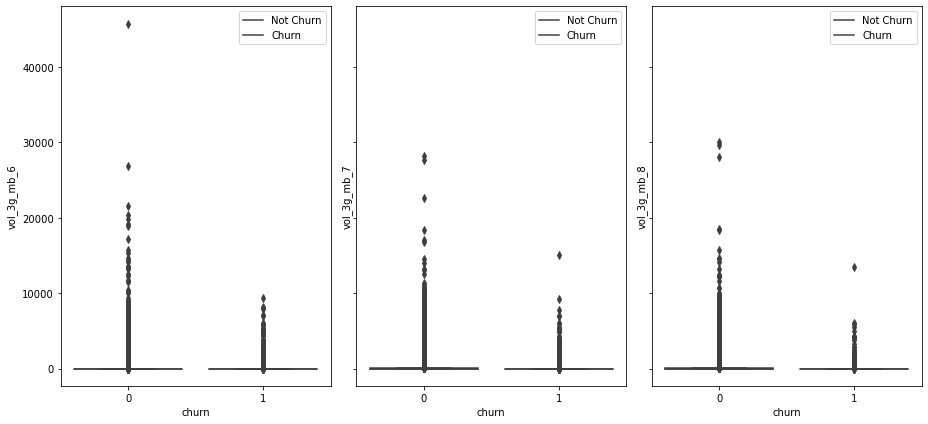

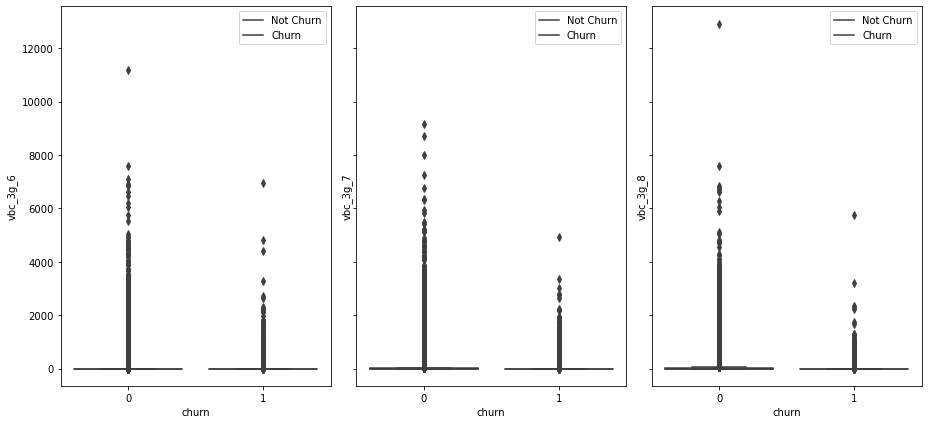

In [83]:
# Plot boxplots for All Numerical Variables by using the NUMERICAL COLUMNS PATTERN
for i in num_cols:
    num_plotter(i,1,3,13,6)

In [84]:

#df_telecom_hvc.describe()

##### Insights:
1. It's visible from the plots above, most of the features have outliers and requires outlier treatment.
2. The Data Distribution is not normal
3. total Outgoing and Incoming call usage shows a decreasing pattern for churned Customers , this could be an indicator of churn
4. similar is the case for all kinds of outgoing/Incoming MOU
5. roam_ic_mou variables have higher value for churned customers than the non-churned customers indicating customers who travel or move to other places and receive more calls tend to churn out. std_og_mou variables also follow this pattern.
6. roam_og_mou variables do not follow this pattern indicating customers who travel and make the calls stay active in the network. total_og variables indicate there is a steady decrease in the outgoing calls made by the churned customers.
7. spl_ic variables show that there has been a decrease in the special incoming calls in the 8th month which might have played a role for churn.
8. count_rech_2g and count_rech_3g variables show that there is a decrease during the 8th month
9. The variance is very high among the columns.




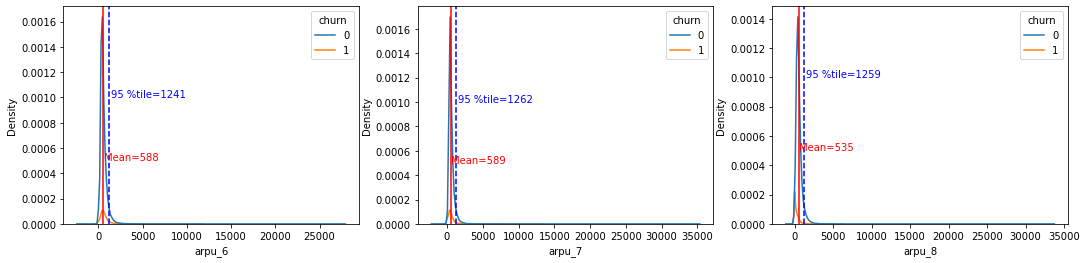

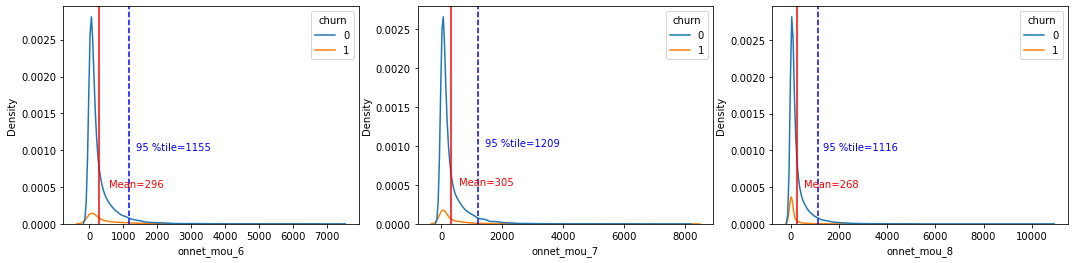

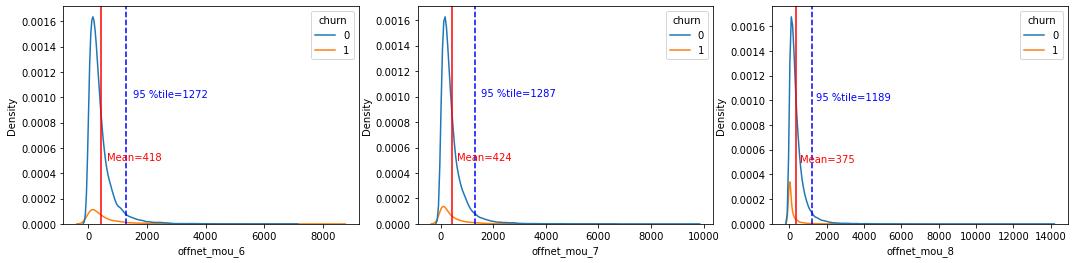

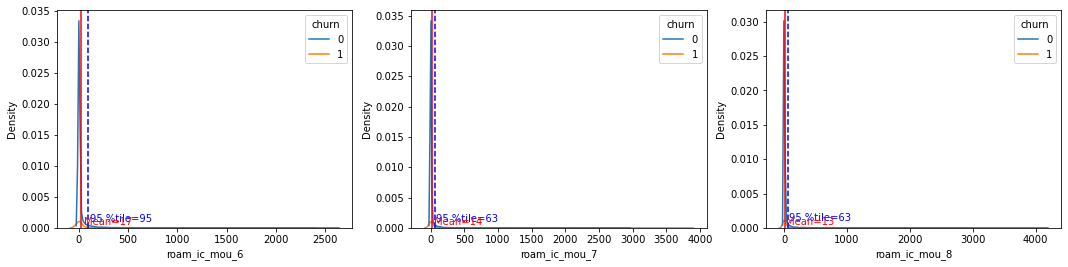

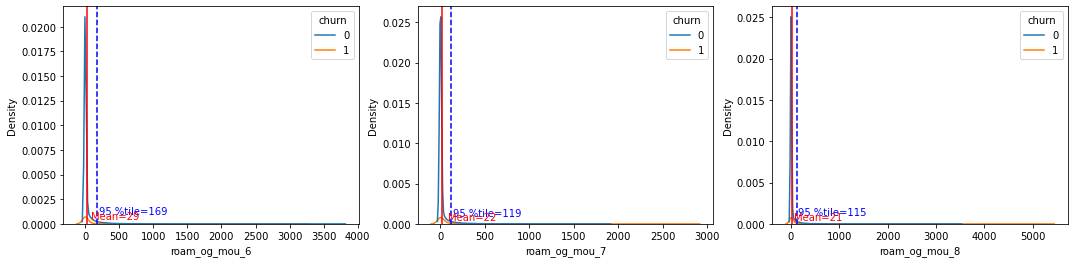

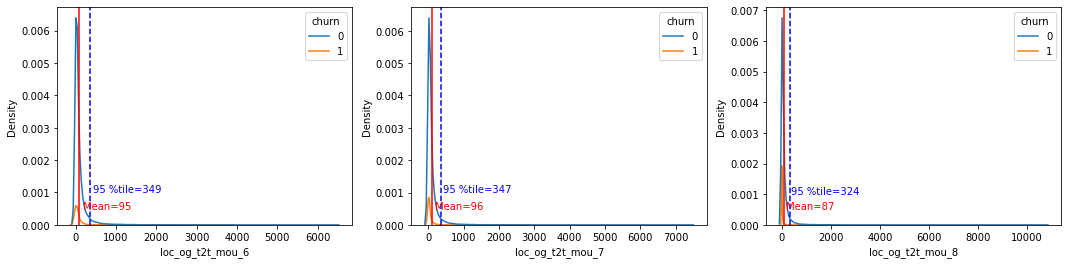

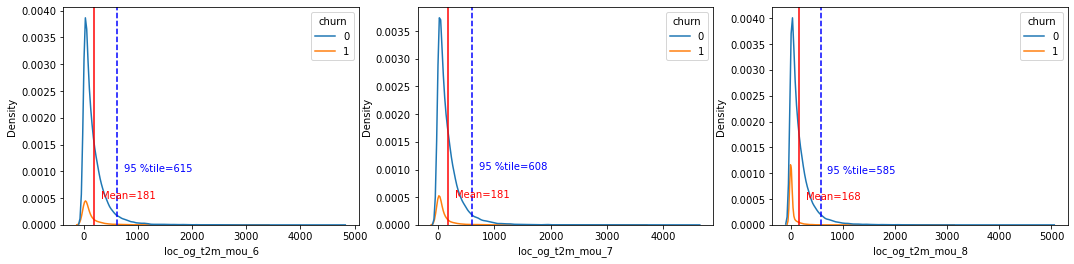

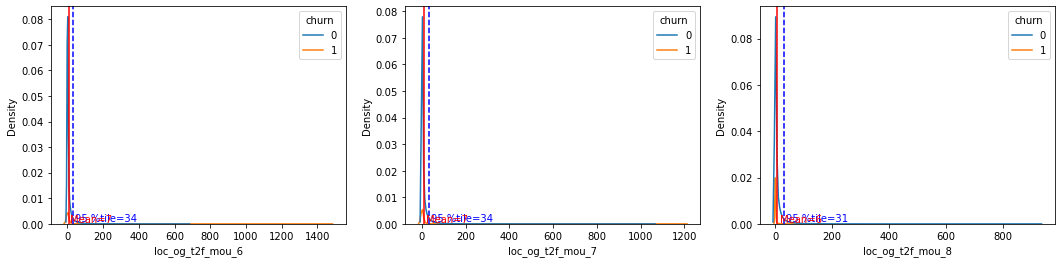

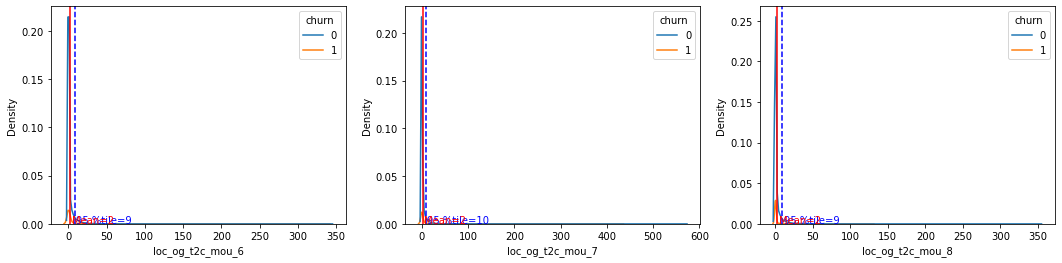

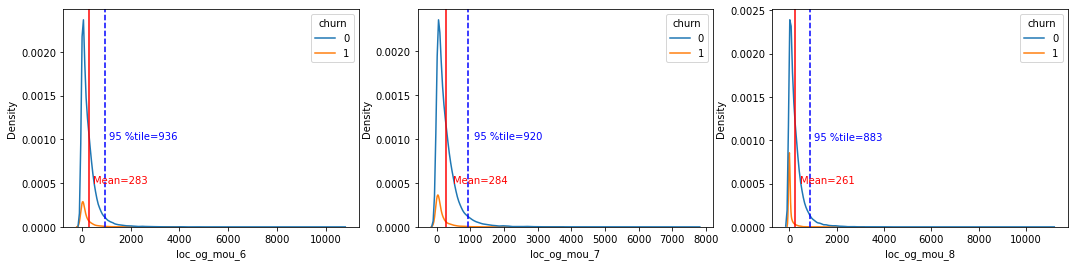

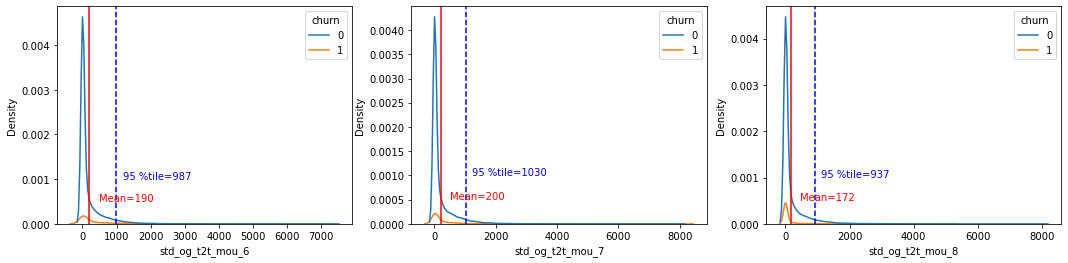

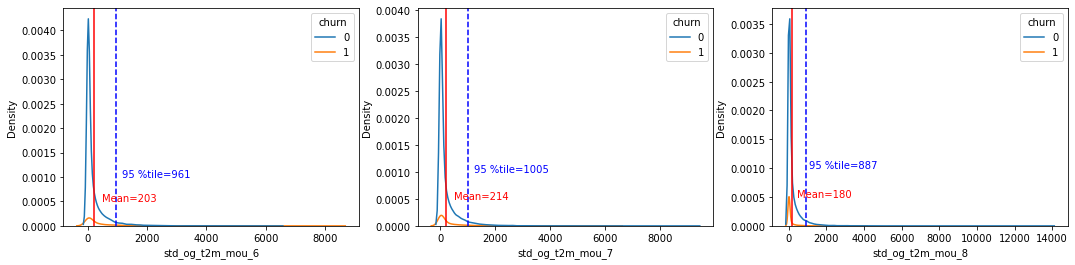

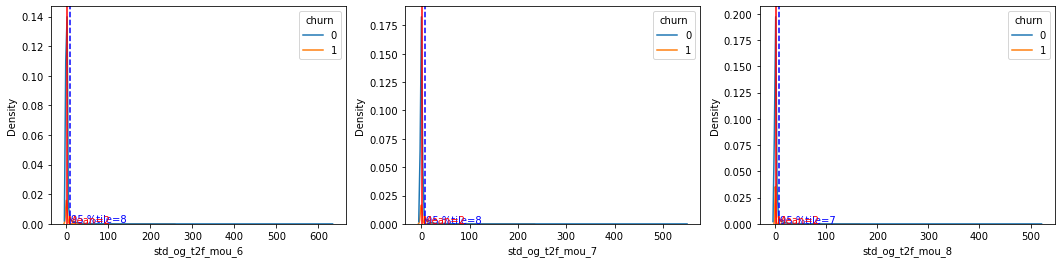

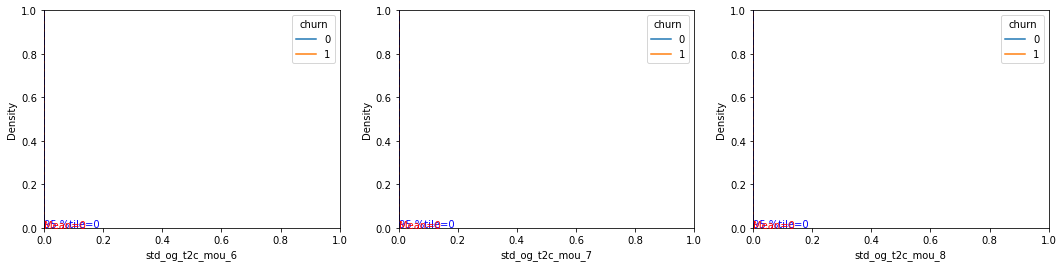

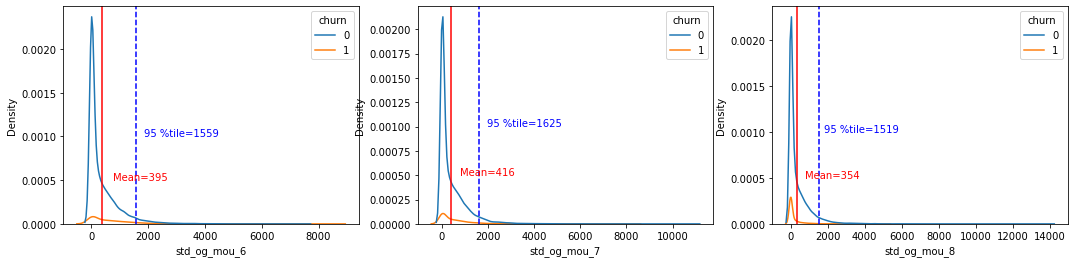

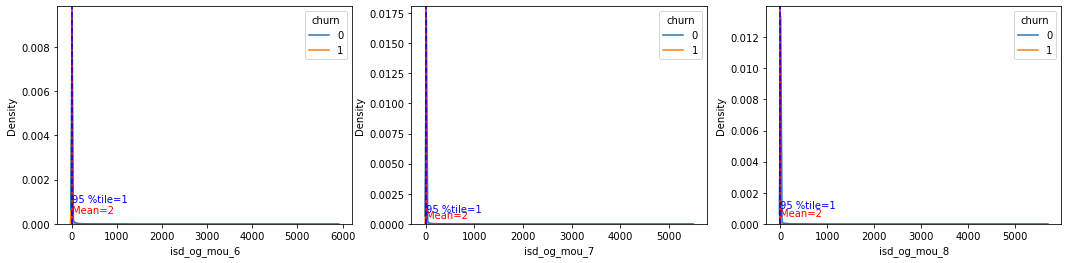

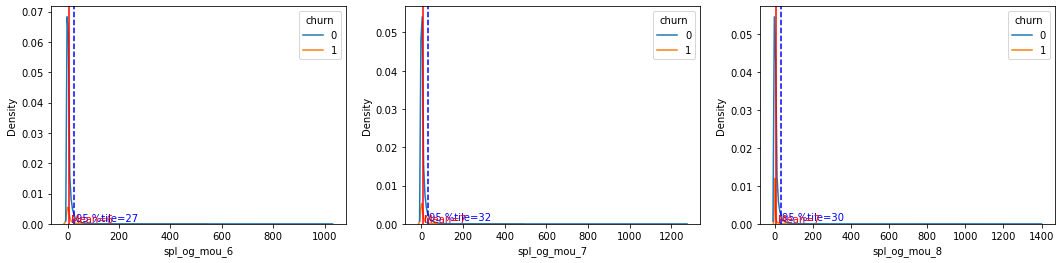

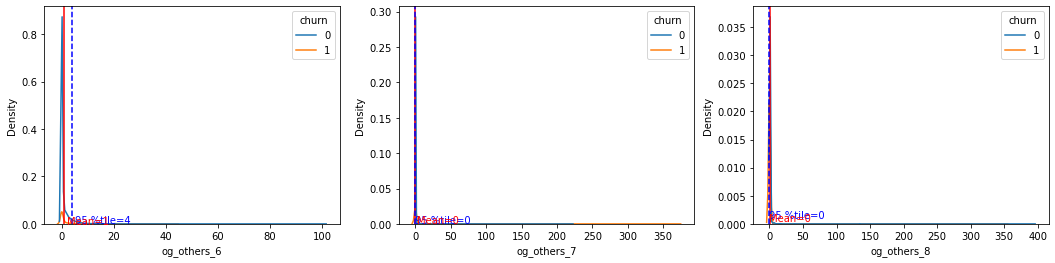

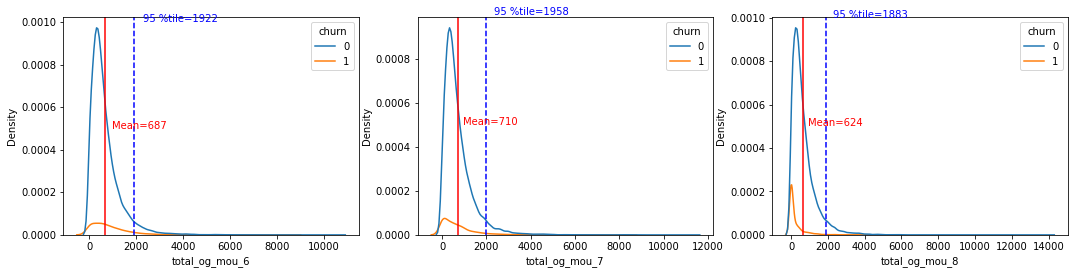

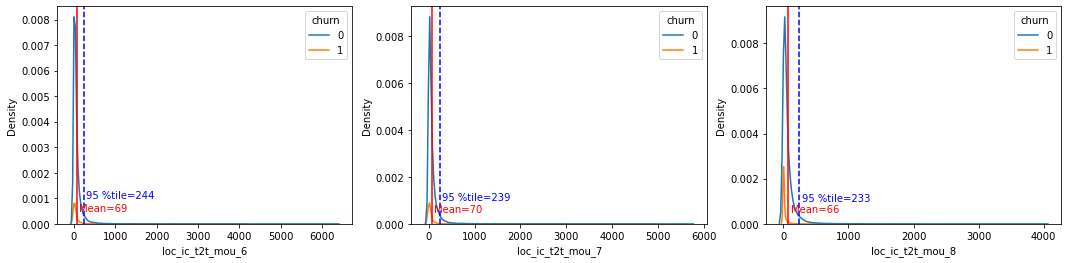

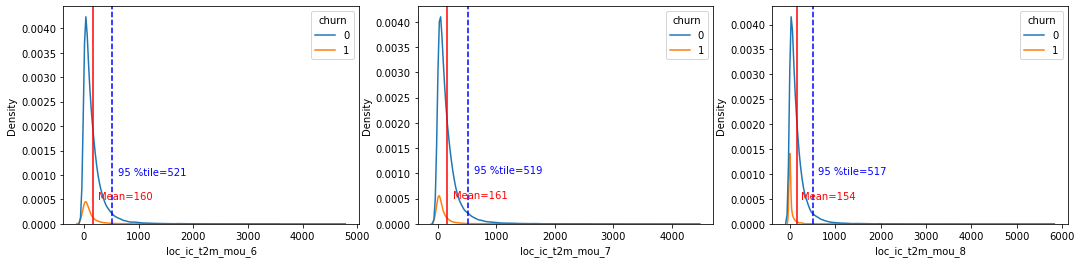

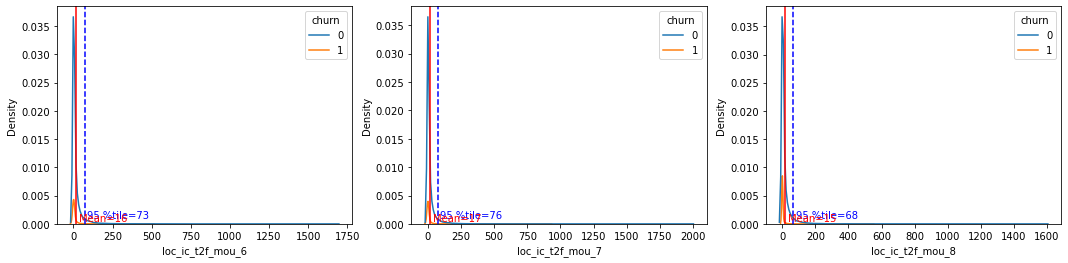

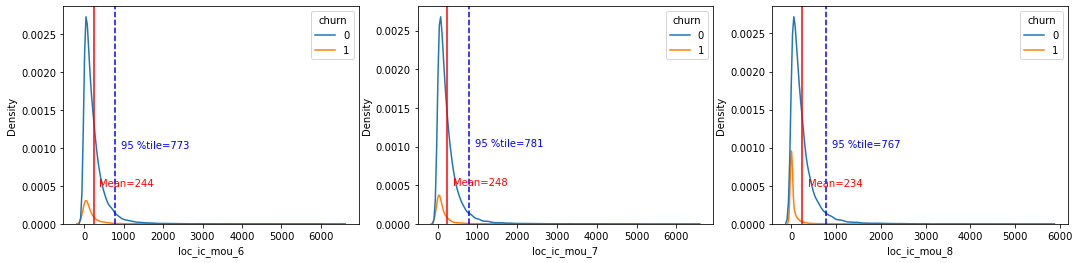

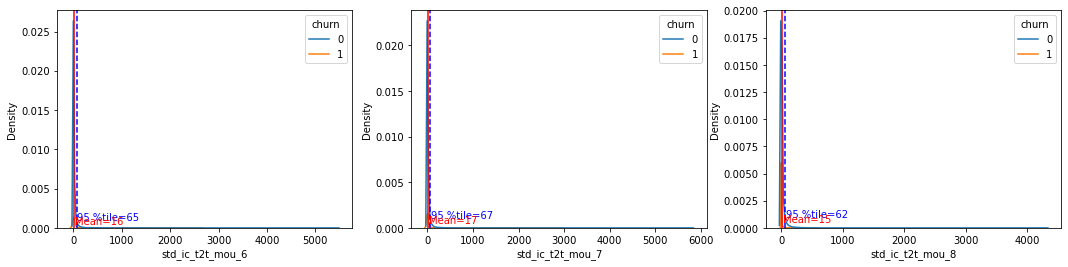

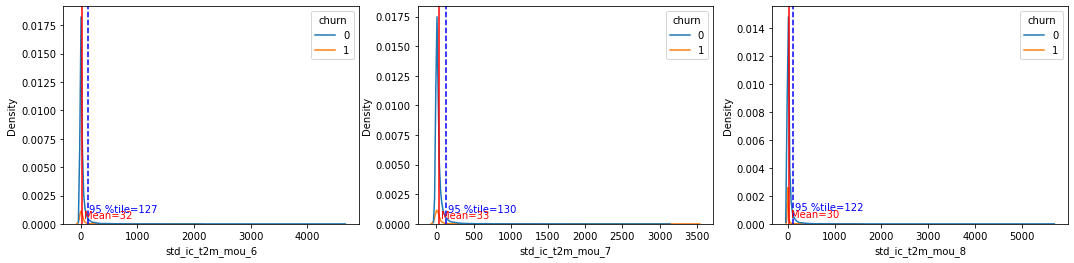

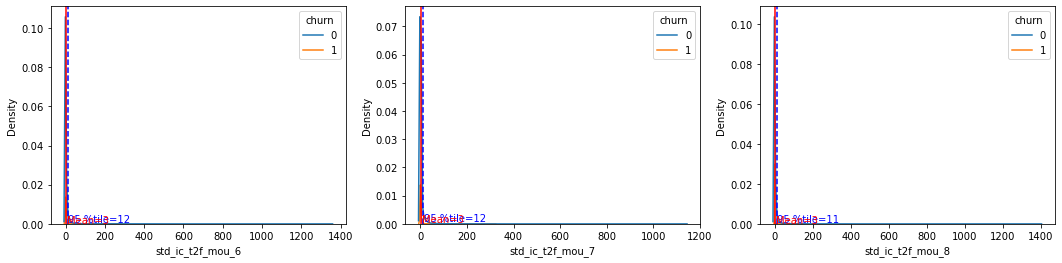

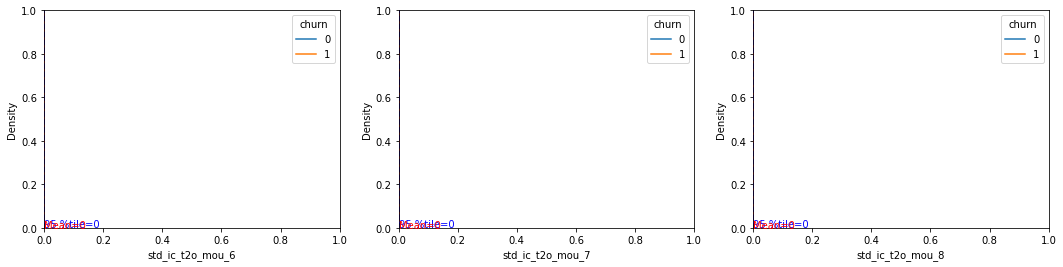

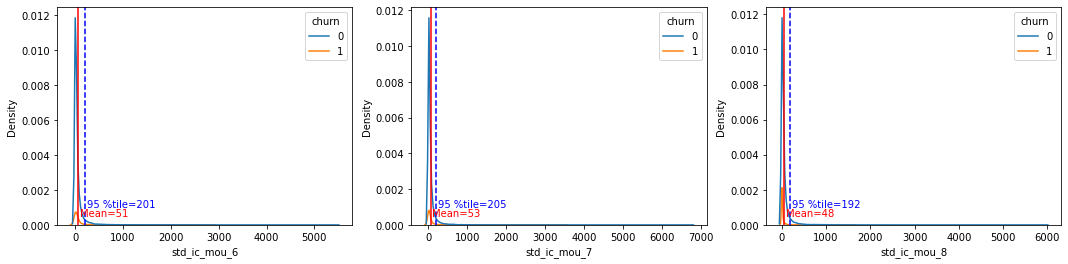

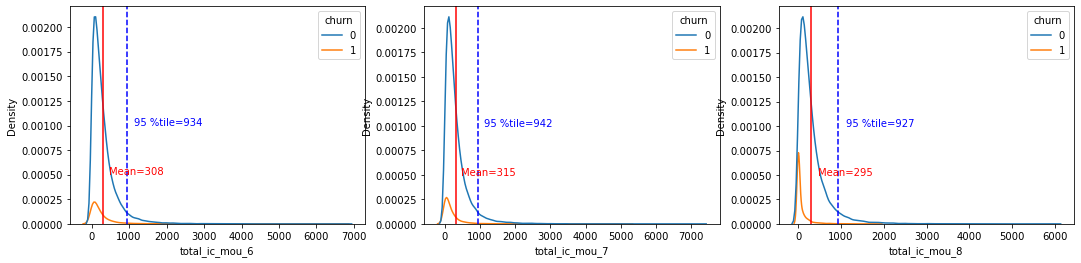

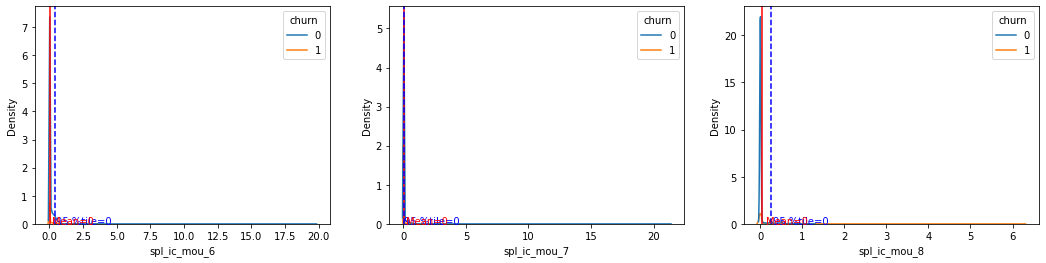

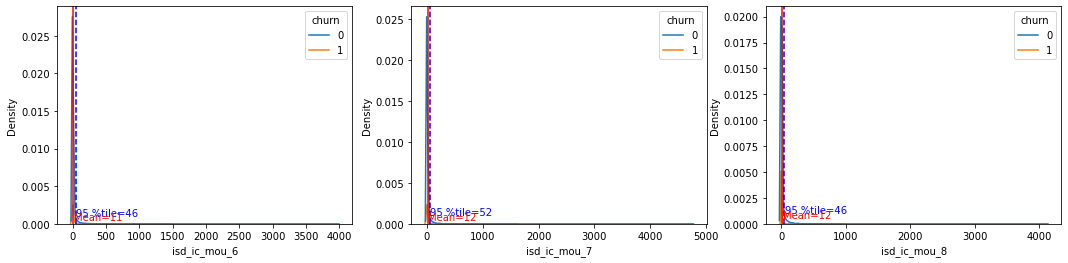

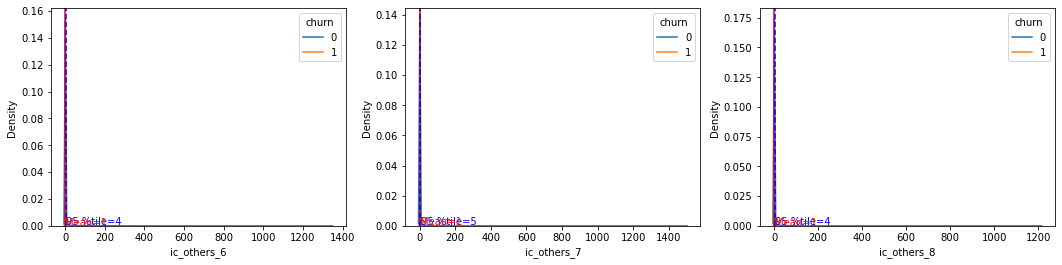

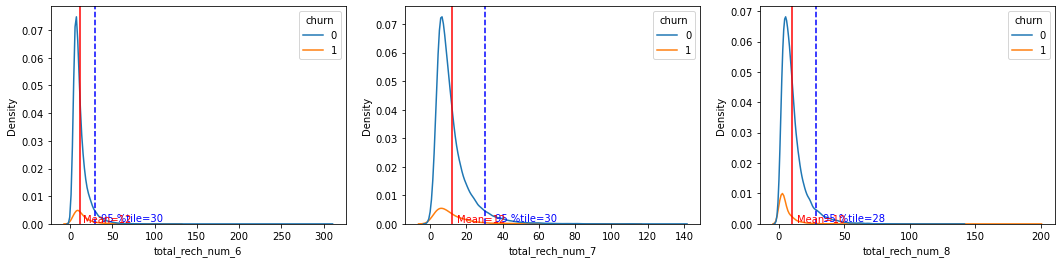

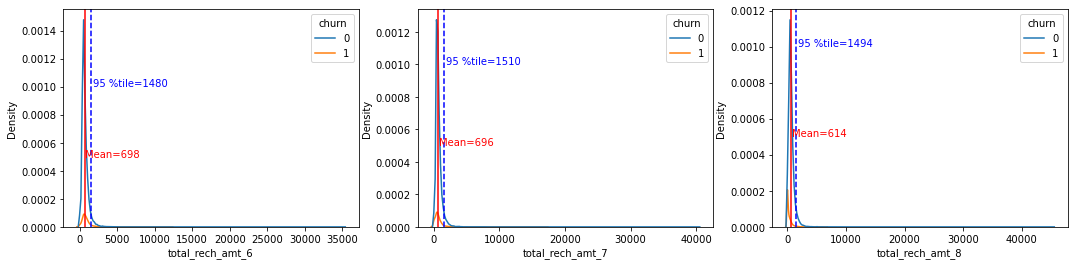

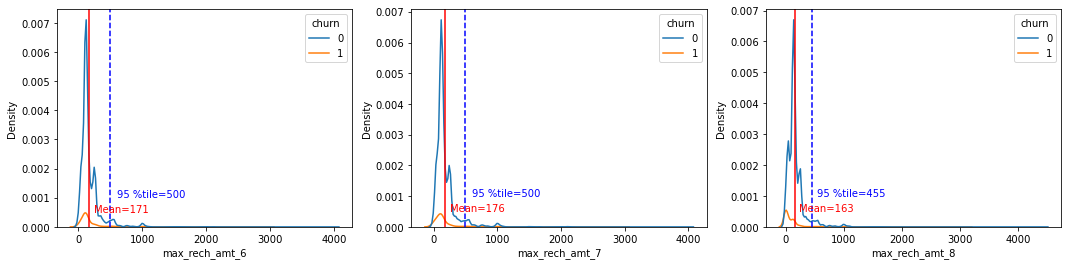

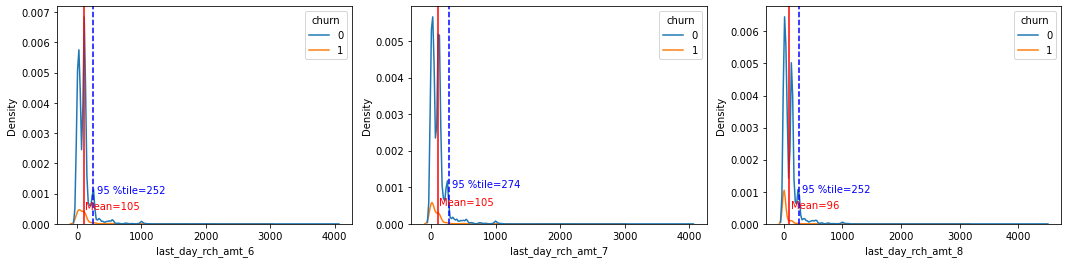

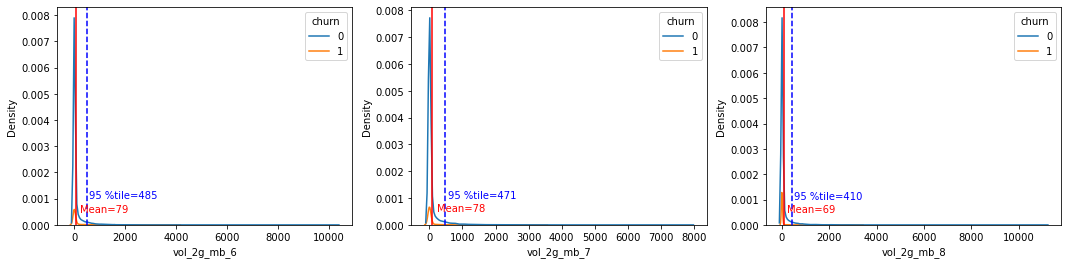

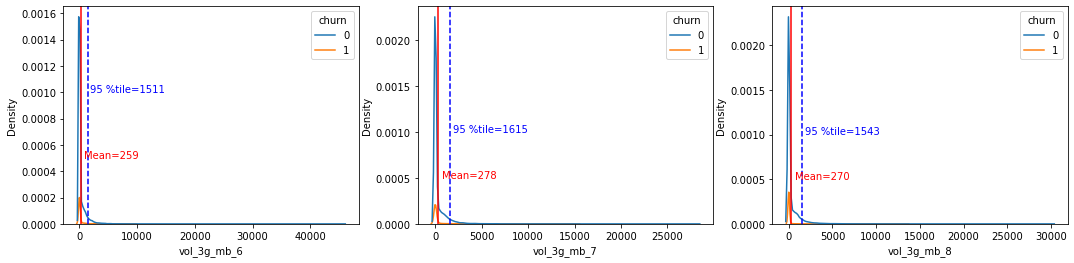

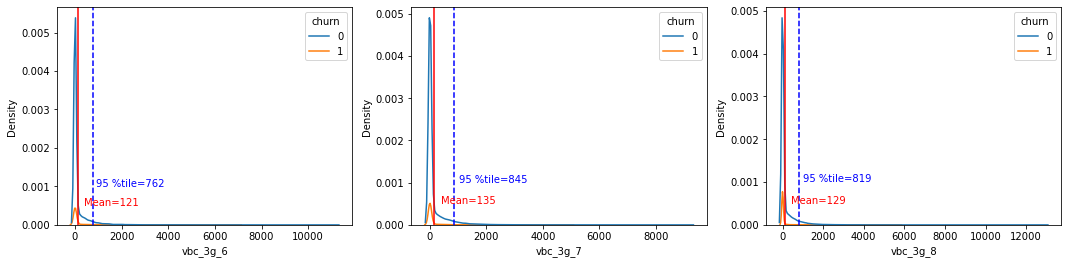

In [85]:
# KDE Plot for all numerical variables
# for loop is for iterating through different unique regex_patterns and then adding _6,_7,_8 to make proper column names
# added Median and 95% values to understand distribution

for i in num_cols:
    JUNE=i+'_6'
    JULY=i+'_7'
    AUG=i+'_8'
    JUNE_mean=df_telecom_hvc[JUNE].mean()
    JULY_mean=df_telecom_hvc[JULY].mean()
    AUG_mean=df_telecom_hvc[AUG].mean()
    JUNE_95=df_telecom_hvc[JUNE].quantile(0.95)
    JULY_95=df_telecom_hvc[JULY].quantile(0.95)
    AUG_95=df_telecom_hvc[AUG].quantile(0.95)
 #   JUNE_50=df_telecom_hvc[JUNE].quantile(0.5)
 #   JULY_50=df_telecom_hvc[JULY].quantile(0.5)
 #   AUG_50=df_telecom_hvc[AUG].quantile(0.5)
    fig, ax = plt.subplots(1,3,figsize=(18, 4))
    sns.kdeplot(data=df_telecom_hvc, x=JUNE, hue='churn', ax=ax[0])
    ax[0].axvline(JUNE_mean, c='red',label='Mean')
    ax[0].axvline(JUNE_95,color='b', linestyle='--',label='95 percentile')
    ax[0].text(JUNE_95*1.2,0.001,'95 %tile='+ str(round(JUNE_95)),color='b')
    ax[0].text(JUNE_95*0.5,0.0005,'Mean='+ str(round(JUNE_mean)),color='r')
    sns.kdeplot(data=df_telecom_hvc, x=JULY, hue='churn', ax=ax[1])
    ax[1].axvline(JULY_mean, c='red',label='Mean')
    ax[1].axvline(JULY_95,color='b', linestyle='--',label='95 percentile')
    ax[1].text(JULY_95*1.2,0.001,'95 %tile='+ str(round(JULY_95)),color='b')
    ax[1].text(JUNE_95*0.5,0.0005,'Mean='+ str(round(JULY_mean)),color='r')
    sns.kdeplot(data=df_telecom_hvc, x=AUG, hue='churn', ax=ax[2])
    ax[2].axvline(AUG_mean, c='red',label='Mean')
    ax[2].axvline(AUG_95,color='b', linestyle='--',label='95 percentile')
    ax[2].text(AUG_95*1.2,0.001,'95 %tile='+ str(round(AUG_95)),color='b')
    ax[2].text(AUG_95*0.5,0.0005,'Mean='+ str(round(AUG_mean)),color='r')
    #plt.legend(loc='best')
    plt.show()

### Insights:
1. It can be seen all the numerical variables have outliers , We will utilize IQR Technique for handling outliers
2. ARPU descreases from good phase to lowest in the action phase
3. ONNET MOU gradually decreases from June to Aug ,being lowest in Aug. Churn Rate is the higher in Action phase
4. OFFNT MOU gradually decreases from June to Aug ,being lowest in Aug. Churn Rate is the higher in Action phase
5. roam_ic_mou variables have higher value for churned customers than the non-churned customers indicating customers who travel or move to other places and receive more calls tend to churn out. std_og_mou variables also follow this pattern.
6. roam_og_mou variables do not follow this pattern indicating customers who travel and make the calls stay active in the network. total_og variables indicate there is a steady decrease in the outgoing calls made by the churned customers.
7. Customers have higher loc_og_t2m value compared to other loc_og calls usage, i.e customer make more calls to other network mobile numbers
8. Mean for STD outgoing calls is lower compared to local intra Network calls. Total Outgoing MOU gradually decreases for Customers with high churn tendency
9. Major Chunk of the High Value customers do NOT opt for Monthly/Sachet packs , consequently VOL_2G and VOL_3G most of the values are zero due to less subscription
10. Local Incoming t2t usage when drops below mean , Churn rate increases. Similar is behaviour for other types of Incoming Calls
11. Major of the customers have Higher Local Incoming Calls in same telephone circles compared to other type of incoming calls
12. Total Number of recharges and the Total recharge amount decreases for Customers prone to churn

In [86]:
def plot_byChurn(df_telecom_hvc,col):
    # per month churn vs Non-Churn
    fig, ax = plt.subplots(figsize=(7,4))
    colList=list(df_telecom_hvc.filter(regex=(col)).columns)
    colList = colList[:3]
    plt.plot(df_telecom_hvc.groupby('churn')[colList].mean().T)
    ax.set_xticklabels(['june','july','Aug'])
    ## Add legend
    plt.legend(['Non-Churn', 'Churn'])
    # Add titles
    plt.title( str(col) +" V/S Month", loc='left', fontsize=12, fontweight=0, color='orange')
    plt.xlabel("Month")
    plt.ylabel(col)
    plt.show()
    # Numeric stats for per month churn vs Non-Churn
    return df_telecom_hvc.groupby('churn')[colList].mean()

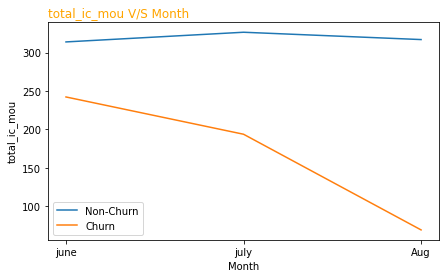

total_ic_mou_6  total_ic_mou_7  total_ic_mou_8
churn                                                
0          313.816710      326.429543       316.88999
1          242.109123      193.551390        68.89226

In [87]:
plot_byChurn(df_telecom_hvc,'total_ic_mou')

##### Insights:
1. Total incoming calls drastically decreases for Churning Customers whereas remains more of less constant for non churners

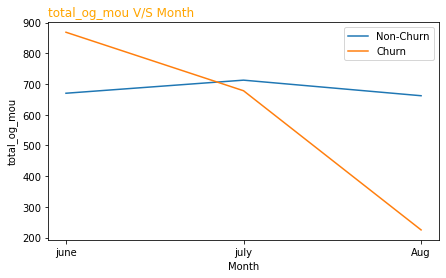

total_og_mou_6  total_og_mou_7  total_og_mou_8
churn                                                
0          669.926395      712.507338      661.819016
1          868.426165      678.054732      225.145473

In [88]:
plot_byChurn(df_telecom_hvc,'total_og_mou')

#### Insights:
- Total Outgoing calls drastically decreases for Churning Customers whereas remains more of less constant for non churners

#### Creating new Feature 
#### og_to_ic_mou_6, og_to_ic_mou_7, og_to_ic_mou_8 
These features will hold the ratio (=total_ogmou / total_icmou) for each month. These features will combine both incoming and outgoing informations and may be a better predictor of churn.

In [89]:
#Creating new feature: og_to_ic_mou_6, og_to_ic_mou_7, og_to_ic_mou_8
# adding 1 to denominator to avoid dividing by 0 and getting nan values.
for i in range(6,9):
    df_telecom_hvc['og_to_ic_mou_'+str(i)] = (df_telecom_hvc['total_og_mou_'+str(i)])/(df_telecom_hvc['total_ic_mou_'+str(i)]+1)

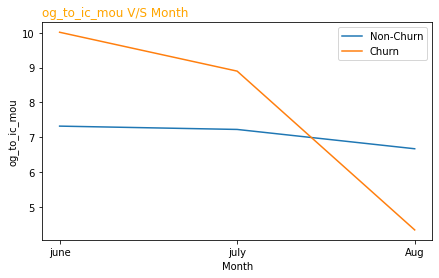

og_to_ic_mou_6  og_to_ic_mou_7  og_to_ic_mou_8
churn                                                
0            7.319820        7.224629        6.670246
1           10.013558        8.897684        4.341528

In [90]:
plot_byChurn(df_telecom_hvc,'og_to_ic_mou')

##### Insights:
- Outgoing to incoming mou remains drops significantly for churners from month Jul(6) to Aug(7).
- While it remains almost consistent for the non-churners.

##### Create new feature: Total_loc_mou_6, Total_loc_mou_7, Total_loc_mou_8
- These features will hold the Total MOU (=loc_og_mou+loc_ic_mou) for each month.
- Using this we will find if the loc MOU (both incoming and outgoing) drops or increases with time.
- This informations should be a better predictor of churn.

In [91]:
#Create new feature: Total_loc_mou_6,Total_loc_mou_7,lTotal_loc_mou_8
for i in range(6,9):
    df_telecom_hvc['Total_loc_mou_'+str(i)] = (df_telecom_hvc['loc_og_mou_'+str(i)])+(df_telecom_hvc['loc_ic_mou_'+str(i)])

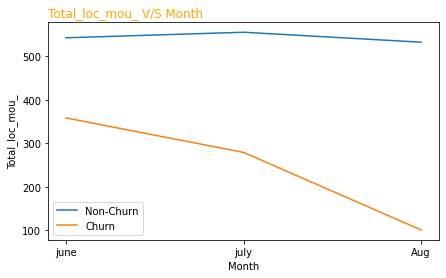

Total_loc_mou_6  Total_loc_mou_7  Total_loc_mou_8
churn                                                   
0           543.047908       555.814399       532.944992
1           358.649401       279.292851       100.940054

In [92]:
plot_byChurn(df_telecom_hvc,'Total_loc_mou_')

#### Insights:
As observed above
- The Total local call mou is genrally low for churners right from the begining of the good phase.
- local mou pattern for the non-churners remains almost constant through out the 3 months.
- The churners genrally show a low total loc mou but it drops dramatically after the 2nd month.
- This might suggest that people who are not making/reciving much local calls during their tenure are more likely to churn.

##### Create new features: Total_roam_mou_6,Total_roam_mou_7,Total_roam_mou_8
- We will derives these features to hold Total roaming MOU (=roam_ic_mou+roam_og_mou) for each month.
- It will help us find roam MOU (both incoming and outgoing) and its behaviour as months pass by.
- This informations should be a better predictor of churn.

In [93]:
#Create new feature: Total_roam_mou_6,Total_roam_mou_7,Total_roam_mou_8
for i in range(6,9):
    df_telecom_hvc['Total_roam_mou_'+str(i)] = (df_telecom_hvc['roam_ic_mou_'+str(i)])+(df_telecom_hvc['roam_og_mou_'+str(i)])

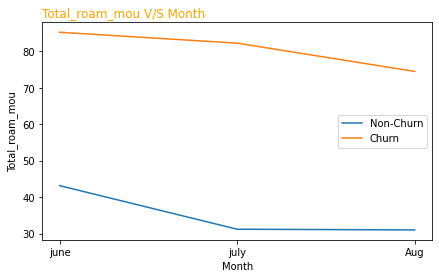

Total_roam_mou_6  Total_roam_mou_7  Total_roam_mou_8
churn                                                      
0             43.141233         31.182119         30.990762
1             85.234589         82.242248         74.481201

In [94]:
plot_byChurn(df_telecom_hvc,'Total_roam_mou')

##### Insights:

- the roaming usage of churners is way higher than those of non-churners across all months
- People who are making/reciving more roaming calls during their tenure are more likely to churn.
- This might suggest that the operators roaming tariffs are higher than what are offered by its competitor, thus forming one of the reasons of churn.

## Step 4. Outlier Treatment:


In [95]:
# We saw we have outliers in the data
df_telecom_hvc.describe(percentiles=[0.01, 0.10,.25,.5,.75,.90,.95,.99])

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou        arpu_6  \
count         29979.0         29979.0         29979.0  29979.000000   
mean              0.0             0.0             0.0    587.587624   
std               0.0             0.0             0.0    442.848876   
min               0.0             0.0             0.0  -2258.709000   
1%                0.0             0.0             0.0     18.221200   
10%               0.0             0.0             0.0    270.692200   
25%               0.0             0.0             0.0    364.352500   
50%               0.0             0.0             0.0    495.951000   
75%               0.0             0.0             0.0    704.184500   
90%               0.0             0.0             0.0    994.311800   
95%               0.0             0.0             0.0   1240.976700   
99%               0.0             0.0             0.0   1983.590100   
max               0.0             0.0             0.0  27731.088000   

             arpu_7        arpu_8  onnet_mou_6   onnet_mou_7   onnet_mou_8  \
count  29979.000000  29979.000000  29979.00000  29979.000000  29979.000000   
mean     589.424681    535.067748    296.23634    304.591922    267.809147   
std      463.049067    492.447887    460.94123    481.966821    466.750205   
min    -2014.045000   -945.808000      0.00000      0.000000      0.000000   
1%        25.600600      0.000000      0.00000      0.000000      0.000000   
10%      274.458200    134.118600     10.30600     10.060000      2.890000   
25%      365.235000    289.782000     41.17000     41.045000     27.070000   
50%      493.781000    452.232000    125.89000    125.560000     99.590000   
75%      700.986000    671.349500    353.50000    360.360000    298.215000   
90%      996.051400    985.499200    795.35400    825.486000    724.182000   
95%     1261.848400   1258.703300   1154.90000   1208.691000   1115.857000   
99%     1999.509680   1988.082260   2166.87600   2220.577600   2189.445800   
max    35145.834000  33543.624000   7376.71000   8157.780000  10752.560000   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
count  29979.000000  29979.000000  29979.000000   29979.000000   29979.000000   
mean     418.127743    424.103446    375.159926      17.428073      13.535270   
std      470.773248    486.710075    477.656991      79.192826      76.343222   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
1%         0.000000      0.000000      0.000000       0.000000       0.000000   
10%       52.550000     53.606000     19.180000       0.000000       0.000000   
25%      137.340000    135.690000     95.730000       0.000000       0.000000   
50%      282.260000    282.040000    241.040000       0.000000       0.000000   
75%      523.625000    532.905000    483.000000       0.000000       0.000000   
90%      916.490000    935.716000    854.006000      32.740000      18.390000   
95%     1271.757000   1287.221000   1188.523000      94.663000      63.422000   
99%     2328.192600   2411.004400   2212.303000     349.546000     292.851400   
max     8362.360000   9667.130000  14007.340000    2613.310000    3813.290000   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
count   29979.000000   29979.000000   29979.000000   29979.000000   
mean       13.263074      29.348362      22.056425      21.483542   
std        74.588105     118.629898      97.974803     106.294911   
min         0.000000       0.000000       0.000000       0.000000   
1%          0.000000       0.000000       0.000000       0.000000   
10%         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
90%        18.664000      64.604000      41.216000      37.150000   
95%        62.813000     

In [96]:
# Treating the outliers (Capped the max and min values with 0.01 and 0.99 percentiles)
cont_cols = [col for col in df_telecom_hvc.columns if col not in ['churn','monthly_2g_6', 'monthly_2g_7','monthly_2g_8',
            'sachet_2g_6','sachet_2g_7','sachet_2g_8',
            'sachet_3g_6','sachet_3g_7','sachet_3g_8',
            'monthly_3g_6','monthly_3g_7','monthly_3g_8']]
for col in cont_cols:
    percentiles = df_telecom_hvc[col].quantile([0.01,0.99]).values
    df_telecom_hvc[col][df_telecom_hvc[col] <= percentiles[0]] = percentiles[0]
    df_telecom_hvc[col][df_telecom_hvc[col] >= percentiles[1]] = percentiles[1]

In [97]:
# Check Data after Outlier treatment
df_telecom_hvc.describe(percentiles=[0.01, 0.10,.25,.5,.75,.90,.95,.99])

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou        arpu_6  \
count         29979.0         29979.0         29979.0  29979.000000   
mean              0.0             0.0             0.0    578.115790   
std               0.0             0.0             0.0    336.036348   
min               0.0             0.0             0.0     18.221200   
1%                0.0             0.0             0.0     18.228064   
10%               0.0             0.0             0.0    270.692200   
25%               0.0             0.0             0.0    364.352500   
50%               0.0             0.0             0.0    495.951000   
75%               0.0             0.0             0.0    704.184500   
90%               0.0             0.0             0.0    994.311800   
95%               0.0             0.0             0.0   1240.976700   
99%               0.0             0.0             0.0   1983.254622   
max               0.0             0.0             0.0   1983.590100   

             arpu_7        arpu_8   onnet_mou_6   onnet_mou_7   onnet_mou_8  \
count  29979.000000  29979.000000  29979.000000  29979.000000  29979.000000   
mean     579.934200    524.618925    287.555469    295.285980    258.537603   
std      338.202040    370.788082    405.124815    419.977607    400.359177   
min       25.600600      0.000000      0.000000      0.000000      0.000000   
1%        25.732732      0.000000      0.000000      0.000000      0.000000   
10%      274.458200    134.118600     10.306000     10.060000      2.890000   
25%      365.235000    289.782000     41.170000     41.045000     27.070000   
50%      493.781000    452.232000    125.890000    125.560000     99.590000   
75%      700.986000    671.349500    353.500000    360.360000    298.215000   
90%      996.051400    985.499200    795.354000    825.486000    724.182000   
95%     1261.848400   1258.703300   1154.900000   1208.691000   1115.857000   
99%     1999.502130   1988.059437   2166.652920   2220.563872   2189.207276   
max     1999.509680   1988.082260   2166.876000   2220.577600   2189.445800   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
count  29979.000000  29979.000000  29979.000000   29979.000000   29979.000000   
mean     410.339476    415.512116    365.212671      14.818088      10.647736   
std      421.971998    431.025656    405.806887      51.263410      40.794809   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
1%         0.000000      0.000000      0.000000       0.000000       0.000000   
10%       52.550000     53.606000     19.180000       0.000000       0.000000   
25%      137.340000    135.690000     95.730000       0.000000       0.000000   
50%      282.260000    282.040000    241.040000       0.000000       0.000000   
75%      523.625000    532.905000    483.000000       0.000000       0.000000   
90%      916.490000    935.716000    854.006000      32.740000      18.390000   
95%     1271.757000   1287.221000   1188.523000      94.663000      63.422000   
99%     2326.763172   2410.915168   2212.191460     349.494520     292.702108   
max     2328.192600   2411.004400   2212.303000     349.546000     292.851400   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
count   29979.000000   29979.000000   29979.000000   29979.000000   
mean       10.598445      25.590695      18.618014      17.589295   
std        40.387159      83.380345      65.793561      62.838544   
min         0.000000       0.000000       0.000000       0.000000   
1%          0.000000       0.000000       0.000000       0.000000   
10%         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
90%        18.664000      64.604000      41.216000      37.150000   
95%        

## Step 5. Modelling

In [98]:
import sklearn.preprocessing
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [99]:
# creating copy of the final High Value Customer dataframe
df_telecom_hvc_PCA = df_telecom_hvc.copy()


### 5.1 Train Test Split

In [100]:
from sklearn.model_selection import train_test_split

#putting features variables in X
X = df_telecom_hvc_PCA.drop(['churn'], axis=1)

#putting response variables in Y
y = df_telecom_hvc_PCA['churn']    

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

### 5.2  Scaling

In [101]:
#Rescaling the features before PCA as it is sensitive to the scales of the features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [102]:
# fitting and transforming the scaler on train
X_train = scaler.fit_transform(X_train)
# transforming the train using the already fit scaler
X_test = scaler.transform(X_test)

### 5.3 Handling Class Imbalance

Standard classifier algorithms like Decision Tree and Logistic Regression have a bias towards classes which have number of instances. They tend to only predict the majority class data. The features of the minority class are treated as noise and are often ignored. Thus, there is a high probability of misclassification of the minority class as compared to the majority class.

###### Informed Over Sampling: Synthetic Minority Over-sampling Technique

This technique is followed to avoid overfitting which occurs when exact replicas of minority instances are added to the main dataset. A subset of data is taken from the minority class as an example and then new synthetic similar instances are created. These synthetic instances are then added to the original dataset. The new dataset is used as a sample to train the classification models.

##### Advantages

Mitigates the problem of overfitting caused by random oversampling as synthetic examples are generated rather than replication of instances
No loss of useful information

In [103]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))
print("Before OverSampling, churn event rate : {}% \n".format(round(sum(y_train==1)/len(y_train)*100,2)))

Before OverSampling, counts of label '1': 1774
Before OverSampling, counts of label '0': 19211 

Before OverSampling, churn event rate : 8.45% 



In [104]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12, sampling_strategy=1)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

In [105]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))
print("After OverSampling, churn event rate : {}% \n".format(round(sum(y_train_res==1)/len(y_train_res)*100,2)))

After OverSampling, the shape of train_X: (38422, 144)
After OverSampling, the shape of train_y: (38422,) 

After OverSampling, counts of label '1': 19211
After OverSampling, counts of label '0': 19211
After OverSampling, churn event rate : 50.0% 



### 5.4 PCA

In [106]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [107]:
#Doing the PCA on the train data
pca.fit(X_train_res)

PCA(random_state=42, svd_solver='randomized')

- we will go ahead and let PCA select the number of components based on variance cutoff we provide to it

In [108]:
pca.explained_variance_ratio_[:70]

array([0.15236993, 0.12012616, 0.07126822, 0.05714426, 0.0489302 ,
       0.04120172, 0.03815223, 0.03079827, 0.02350459, 0.0206916 ,
       0.01986241, 0.01862332, 0.01744041, 0.01600514, 0.01527296,
       0.01506572, 0.01322324, 0.01311955, 0.01234224, 0.01155752,
       0.01015939, 0.00978547, 0.00941807, 0.00882776, 0.00833015,
       0.00823323, 0.00793899, 0.00736595, 0.00711334, 0.00685633,
       0.00657157, 0.00619773, 0.00613613, 0.00555563, 0.00534162,
       0.0052607 , 0.00495416, 0.00474088, 0.00444715, 0.004388  ,
       0.0043113 , 0.00415494, 0.00399226, 0.00376041, 0.00359488,
       0.00352885, 0.00339948, 0.00326012, 0.00311539, 0.00303134,
       0.00294677, 0.00275883, 0.002561  , 0.00244916, 0.00241234,
       0.00231359, 0.00226847, 0.00223337, 0.00216113, 0.0021448 ,
       0.00200274, 0.00197804, 0.00187195, 0.00180044, 0.00174577,
       0.00169631, 0.00167518, 0.00160446, 0.00154973, 0.00147817])

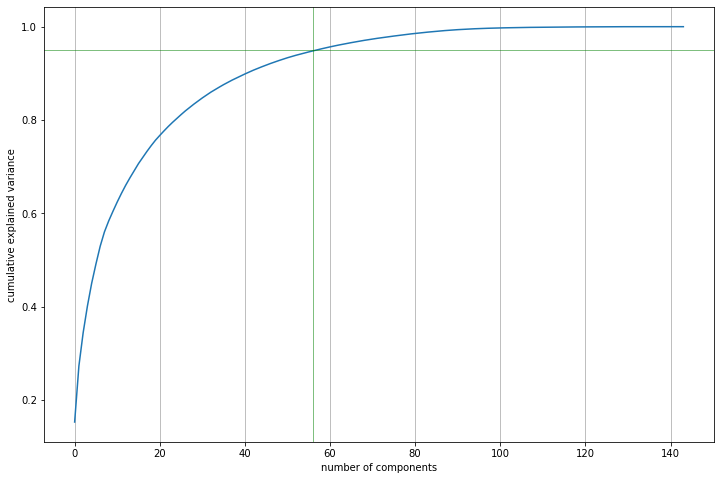

In [109]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig , ax = plt.subplots(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
ax.axhline(0.95, color='green', linewidth=0.5)
ax.axvline(56, color='green', linewidth=0.5)
ax.xaxis.grid(True)
plt.show()

- As seen from the graph , Looks like 56 components are enough to describe 95% of the variance in the dataset
    We'll choose 56 components for our modeling

In [110]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=56)

In [111]:
X_train_pca = pca_final.fit_transform(X_train_res)
X_train_pca.shape

(38422, 56)

In [112]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(X_train_pca.transpose())
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)


max corr: 0.006644492978843902 , min corr:  -0.005501939973616914


##### Insights:
- we see that correlations are indeed very close to 0
- there is no correlation between any two components! We effectively have removed multicollinearity 

In [113]:
#Applying selected components to the test data - 50 components
X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

(8994, 56)

### 5.4 For the prediction of churn customers we will try fitting variety of models and choose the best predictor of churn. 

#### Models we will consider are 

1. Logistic Regression
2. Decision Tree
3. Random Forest
4. Boosting models - Gradient Boosting Classifier and XGBoost Classifier
5. SVM

In [114]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds


In [115]:
def getModelMetrics(actual_churn=False,pred_churn=False):

    confusion = metrics.confusion_matrix(actual_churn, pred_churn)

    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives

    print("Roc_auc_score : {}".format(metrics.roc_auc_score(actual_churn,pred_churn)))
    # Let's see the sensitivity of our logistic regression model
    print('Sensitivity/Recall : {}'.format(TP / float(TP+FN)))
    # Let us calculate specificity
    print('Specificity: {}'.format(TN / float(TN+FP)))
    # Calculate false postive rate - predicting churn when customer does not have churned
    print('False Positive Rate: {}'.format(FP/ float(TN+FP)))
    # positive predictive value 
    print('Positive predictive value: {}'.format(TP / float(TP+FP)))
    # Negative predictive value
    print('Negative Predictive value: {}'.format(TN / float(TN+ FN)))
    # sklearn precision score value 
    print('sklearn precision score value: {}'.format(metrics.precision_score(actual_churn, pred_churn )))
    
    

In [116]:
def predictChurnWithProb(model,X,y,prob):
    # Funtion to predict the churn using the input probability cut-off
    # Input arguments: model instance, x and y to predict using model and cut-off probability
    
    # predict
    pred_probs = model.predict_proba(X)[:,1]
    
    y_df= pd.DataFrame({'churn':y, 'churn_Prob':pred_probs})
    # Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
    y_df['final_predicted'] = y_df.churn_Prob.map( lambda x: 1 if x > prob else 0)
    # Let's see the head
    getModelMetrics(y_df.churn,y_df.final_predicted)
    return y_df

In [117]:
def findOptimalCutoff(df):
    #Function to find the optimal cutoff for classifing as churn/non-churn
    # Let's create columns with different probability cutoffs 
    numbers = [float(x)/10 for x in range(10)]
    for i in numbers:
        df[i] = df.churn_Prob.map( lambda x: 1 if x > i else 0)
    #print(df.head())
    
    # Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
    cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
    from sklearn.metrics import confusion_matrix
    
    # TP = confusion[1,1] # true positive 
    # TN = confusion[0,0] # true negatives
    # FP = confusion[0,1] # false positives
    # FN = confusion[1,0] # false negatives
    
    num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    for i in num:
        cm1 = metrics.confusion_matrix(df.churn, df[i] )
        total1=sum(sum(cm1))
        accuracy = (cm1[0,0]+cm1[1,1])/total1
        
        speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
        sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
        cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    print(cutoff_df)
    # Let's plot accuracy sensitivity and specificity for various probabilities.
    cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
    plt.show()

In [118]:
def modelfit(alg, X_train, y_train, performCV=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(X_train, y_train)
        
    #Predict training set:
    dtrain_predictions = alg.predict(X_train)
    dtrain_predprob = alg.predict_proba(X_train)[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_val_score(alg, X_train, y_train, cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.roc_auc_score(y_train, dtrain_predictions))
    print ("Recall/Sensitivity : %.4g" % metrics.recall_score(y_train, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_train, dtrain_predprob))
    
    if performCV:
        print ("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
        

### 1. Logistic Regression
Applying Logistic Regression on our principal components

In [119]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr0 = LogisticRegression(class_weight='balanced')

In [120]:
modelfit(lr0, X_train_pca, y_train_res)


Model Report
Accuracy : 0.8576
Recall/Sensitivity : 0.8661
AUC Score (Train): 0.917321
CV Score : Mean - 0.9165041 | Std - 0.005892032 | Min - 0.9066878 | Max - 0.9245727


In [121]:
# predictions on Test data
pred_probs_test = lr0.predict(X_test_pca)
getModelMetrics(y_test,pred_probs_test)

Roc_auc_score : 0.8281303232804046
Sensitivity/Recall : 0.8122699386503067
Specificity: 0.8439907079105025
False Positive Rate: 0.1560092920894975
Positive predictive value: 0.3415892672858617
Negative Predictive value: 0.9783163265306123
sklearn precision score value: 0.3415892672858617


In [122]:
print("Accuracy : {}".format(metrics.accuracy_score(y_test,pred_probs_test)))
print("Recall : {}".format(metrics.recall_score(y_test,pred_probs_test)))
print("Precision : {}".format(metrics.precision_score(y_test,pred_probs_test)))

Accuracy : 0.8411162997553925
Recall : 0.8122699386503067
Precision : 0.3415892672858617


In [123]:
#Making prediction on the train data with predict_proba

pred_probs_train = lr0.predict_proba(X_train_pca)[:,1]
print("roc_auc_score(Train) {:2.2}".format(metrics.roc_auc_score(y_train_res, pred_probs_train)))

roc_auc_score(Train) 0.92


In [124]:
cut_off_prob=0.5
y_train_df = predictChurnWithProb(lr0,X_train_pca,y_train_res,cut_off_prob)
y_train_df.head()

Roc_auc_score : 0.8575555671230025
Sensitivity/Recall : 0.8660663161730259
Specificity: 0.849044818072979
False Positive Rate: 0.15095518192702098
Positive predictive value: 0.8515712969597707
Negative Predictive value: 0.8637470874814658
sklearn precision score value: 0.8515712969597707


churn  churn_Prob  final_predicted
0      0    0.087370                0
1      0    0.536936                1
2      0    0.009040                0
3      0    0.231853                0
4      0    0.354882                0

##### Plotting the ROC Curve :
An ROC curve demonstrates several things:

It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

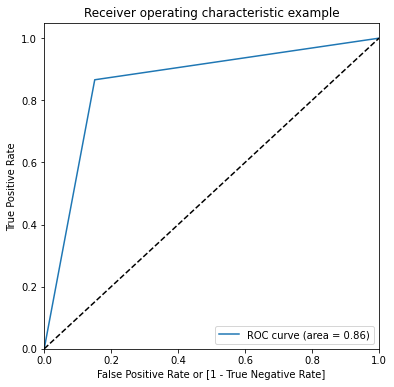

(array([0.        , 0.15095518, 1.        ]),
 array([0.        , 0.86606632, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [125]:
draw_roc(y_train_df.churn, y_train_df.final_predicted)

- The roc curve is lying in the top left corner side which is a sign of a fairly good fit.

In [126]:
#draw_roc(y_pred_final.Churn, y_pred_final.predicted)
print("roc_auc_score : {:2.2f}".format(metrics.roc_auc_score(y_train_df.churn, y_train_df.final_predicted)))

roc_auc_score : 0.86


##### Finding Optimal Cutoff Point
Since recall or sensitivity is a much more important metrics for churn prediction. A trade off between sensitivity(or recall) and specificity is to be considered in doing so. We will try adjusting the probability threshold which shall lead to higher sensitivity or recall rate.

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.710739  0.974702  0.446775
0.2   0.2  0.778773  0.953776  0.603769
0.3   0.3  0.818359  0.929155  0.707563
0.4   0.4  0.845609  0.899797  0.791422
0.5   0.5  0.857556  0.866066  0.849045
0.6   0.6  0.857816  0.824580  0.891052
0.7   0.7  0.838998  0.757066  0.920931
0.8   0.8  0.790849  0.633231  0.948467
0.9   0.9  0.659570  0.342772  0.976368


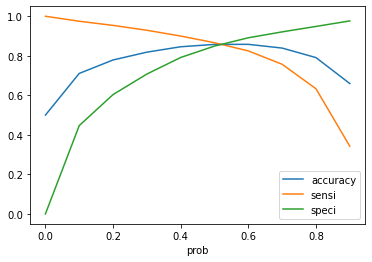

In [127]:
# finding cut-off with the right balance of the metrices
# sensitivity vs specificity trade-off
findOptimalCutoff(y_train_df)

##### Insight:
From the curve above, 0.45 is the optimum point .
Although, other cutoff between 0.4 and 0.6 can also be taken but to keep the test sensitivity/recall significant we choose 0.45. At this point there is a balance of sensitivity, specificity and accuracy.

In [128]:
# predicting with the choosen cut-off on train
cut_off_prob = 0.45
predictChurnWithProb(lr0,X_train_pca,y_train_res,cut_off_prob)

Roc_auc_score : 0.8523241892665661
Sensitivity/Recall : 0.8827234396960075
Specificity: 0.8219249388371246
False Positive Rate: 0.17807506116287544
Positive predictive value: 0.832131115363855
Negative Predictive value: 0.8751316299950119
sklearn precision score value: 0.832131115363855


churn  churn_Prob  final_predicted
0          0    0.087370                0
1          0    0.536936                1
2          0    0.009040                0
3          0    0.231853                0
4          0    0.354882                0
...      ...         ...              ...
38417      1    0.822301                1
38418      1    0.420727                0
38419      1    0.685044                1
38420      1    0.848684                1
38421      1    0.965805                1

[38422 rows x 3 columns]

##### Making prediction on test

In [129]:
# predicting with the choosen cut-off on test
predictChurnWithProb(lr0,X_test_pca,y_test,cut_off_prob)

Roc_auc_score : 0.8234535999345924
Sensitivity/Recall : 0.8294478527607362
Specificity: 0.8174593471084485
False Positive Rate: 0.18254065289155152
Positive predictive value: 0.3116643614568926
Negative Predictive value: 0.9796336996336996
sklearn precision score value: 0.3116643614568926


churn  churn_Prob  final_predicted
22880      0    0.000419                0
21814      0    0.046954                0
25755      0    0.032071                0
8765       0    0.389514                0
28867      0    0.810103                1
...      ...         ...              ...
11763      0    0.045177                0
11119      0    0.429220                0
15614      0    0.180909                0
15129      0    0.001788                0
3762       0    0.144133                0

[8994 rows x 3 columns]

##### Insights:
The resulting model, after PCA and logistic regression (with optimal cutoff setting) has a right balance of different metrics score for sensitivity, specificity and Roc Accuracy on the train and test set.

- **train sensitivity** : 88.27%, **train roc auc score** : 85.23%
- **test sensitivity** : 82.94%, **test roc auc score** : 82.34%

### 2. Decision Tree
Applying Decision Tree Classifier on our principal components with Hyperparameter tuning

In [130]:
dt0 = DecisionTreeClassifier(class_weight='balanced',
                             max_features='auto',
                             min_samples_split=100,
                             min_samples_leaf=100,
                             max_depth=6,
                             random_state=10)
modelfit(dt0, X_train_pca, y_train_res)


Model Report
Accuracy : 0.7852
Recall/Sensitivity : 0.7545
AUC Score (Train): 0.844459
CV Score : Mean - 0.8048387 | Std - 0.0311631 | Min - 0.7570744 | Max - 0.8373496


In [131]:
# make predictions
pred_probs_test = dt0.predict(X_test_pca)
#Let's check the model metrices.
getModelMetrics(actual_churn=y_test,pred_churn=pred_probs_test)

Roc_auc_score : 0.7551916212175879
Sensitivity/Recall : 0.7042944785276074
Specificity: 0.8060887639075681
False Positive Rate: 0.19391123609243183
Positive predictive value: 0.2657407407407407
Negative Predictive value: 0.9647351477904594
sklearn precision score value: 0.2657407407407407


In [132]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': range(5,15,3),
    'min_samples_leaf': range(100, 400, 50),
    'min_samples_split': range(100, 400, 100),
    'max_features': [8,10,15]
}
# Create a based model
dt = DecisionTreeClassifier(class_weight='balanced',random_state=10)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = dt, param_grid = param_grid, 
                          cv = 3, n_jobs = 4,verbose = 1,scoring="f1_weighted")

In [133]:
# Fit the grid search to the data
grid_search.fit(X_train_pca, y_train_res)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=10),
             n_jobs=4,
             param_grid={'max_depth': range(5, 15, 3),
                         'max_features': [8, 10, 15],
                         'min_samples_leaf': range(100, 400, 50),
                         'min_samples_split': range(100, 400, 100)},
             scoring='f1_weighted', verbose=1)

In [134]:
# printing the optimal accuracy score and hyperparameters
print('We can get recall of',grid_search.best_score_,'using',grid_search.best_params_)

We can get recall of 0.8195112543140862 using {'max_depth': 14, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 100}


In [135]:
# model with the best hyperparameters
dt_final = DecisionTreeClassifier(class_weight='balanced',
                             max_depth=14,
                             min_samples_leaf=100, 
                             min_samples_split=100,
                             max_features=10,
                             random_state=10)

In [136]:
modelfit(dt_final,X_train_pca,y_train_res)


Model Report
Accuracy : 0.8348
Recall/Sensitivity : 0.8578
AUC Score (Train): 0.916398
CV Score : Mean - 0.8983522 | Std - 0.003770427 | Min - 0.8915516 | Max - 0.9028698


In [137]:
# make predictions
pred_probs_test = dt_final.predict(X_test_pca)
#Let's check the model metrices.
getModelMetrics(actual_churn=y_test,pred_churn=pred_probs_test)

Roc_auc_score : 0.7582110252427097
Sensitivity/Recall : 0.7177914110429447
Specificity: 0.7986306394424746
False Positive Rate: 0.20136936055752536
Positive predictive value: 0.2620967741935484
Negative Predictive value: 0.9659863945578231
sklearn precision score value: 0.2620967741935484


In [138]:
# classification report
print(classification_report(y_test,pred_probs_test))

              precision    recall  f1-score   support

           0       0.97      0.80      0.87      8179
           1       0.26      0.72      0.38       815

    accuracy                           0.79      8994
   macro avg       0.61      0.76      0.63      8994
weighted avg       0.90      0.79      0.83      8994



##### Insights:
Even after hyperparameter tuning for the Decision Tree. The recall rate is 71.77% which is not very significant to predict the churn.

Let's see if we can achive a better Recall rate by deciding an optimal cut-off for the model to predict churn.

In [139]:
# predicting churn with default cut-off 0.5
cut_off_prob = 0.5
y_train_df = predictChurnWithProb(dt_final,X_train_pca,y_train_res,cut_off_prob)
y_train_df.head()

Roc_auc_score : 0.8348081828119306
Sensitivity/Recall : 0.8578418614335537
Specificity: 0.8117745041903076
False Positive Rate: 0.18822549580969236
Positive predictive value: 0.8200636942675159
Negative Predictive value: 0.8509767543380988
sklearn precision score value: 0.8200636942675159


churn  churn_Prob  final_predicted
0      0    0.176471                0
1      0    0.246479                0
2      0    0.010000                0
3      0    0.047945                0
4      0    0.145299                0

     prob  accuracy     sensi     speci
0.0   0.0  0.597236  1.000000  0.194472
0.1   0.1  0.715866  0.987819  0.443912
0.2   0.2  0.781609  0.960752  0.602467
0.3   0.3  0.816147  0.925824  0.706470
0.4   0.4  0.830618  0.896830  0.764406
0.5   0.5  0.834808  0.857842  0.811775
0.6   0.6  0.828171  0.784290  0.872052
0.7   0.7  0.810005  0.703347  0.916662
0.8   0.8  0.776378  0.601582  0.951174
0.9   0.9  0.704570  0.430430  0.978710


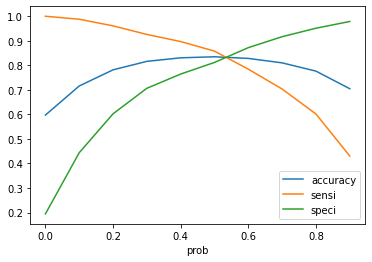

In [140]:
# finding cut-off with the right balance of the metrices
findOptimalCutoff(y_train_df)

 - From the curve above, let'choose 0.42 as the optimum point to make a high enough sensitivity.

In [141]:
# predicting churn with cut-off 0.42
cut_off_prob=0.42
y_train_df = predictChurnWithProb(dt_final,X_train_pca,y_train_res,cut_off_prob)
y_train_df.head()

Roc_auc_score : 0.8318411326843995
Sensitivity/Recall : 0.8913122690125449
Specificity: 0.7723699963562543
False Positive Rate: 0.22763000364374578
Positive predictive value: 0.796566803126163
Negative Predictive value: 0.8766394895427153
sklearn precision score value: 0.796566803126163


churn  churn_Prob  final_predicted
0      0    0.176471                0
1      0    0.246479                0
2      0    0.010000                0
3      0    0.047945                0
4      0    0.145299                0

In [142]:
#Lets see how it performs on test data.
y_test_df= predictChurnWithProb(dt_final,X_test_pca,y_test,cut_off_prob)
y_test_df.head()

Roc_auc_score : 0.7706095289672713
Sensitivity/Recall : 0.7803680981595092
Specificity: 0.7608509597750336
False Positive Rate: 0.23914904022496639
Positive predictive value: 0.24537037037037038
Negative Predictive value: 0.9720399875039051
sklearn precision score value: 0.24537037037037038


churn  churn_Prob  final_predicted
22880      0    0.020000                0
21814      0    0.000000                0
25755      0    0.000000                0
8765       0    0.641304                1
28867      0    0.815287                1

- Decision tree after selecting optimal cut-off also is resulting in a model with

    **Train Recall** : 89.13% and **Train Roc_auc_score** : 83.18

    **Test Recall** : 78.03% and **Test Roc_auc_score** : 77.06

    Decision Trees still seems overfitted to the data.

### 3. Random Forest

Applying Random Forest Classifier on our principal components with Hyperparameter tuning

In [143]:
def plot_traintestAcc(score,param):
    scores = score
    # plotting accuracies with max_depth
    plt.figure()
    plt.plot(scores["param_"+param], 
    scores["mean_train_score"], 
    label="training accuracy")
    plt.plot(scores["param_"+param], 
    scores["mean_test_score"], 
    label="test accuracy")
    plt.xlabel(param)
    plt.ylabel("f1")
    plt.legend()
    plt.show()

##### Tuning max_depth

In [144]:
parameters = {'max_depth': range(10, 30, 5)}
rf0 = RandomForestClassifier()
rfgs = GridSearchCV(rf0, parameters, 
                    cv=5, 
                   scoring="f1",
                   return_train_score=True,
                          n_jobs=-1)
rfgs.fit(X_train_pca,y_train_res)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(10, 30, 5)},
             return_train_score=True, scoring='f1')

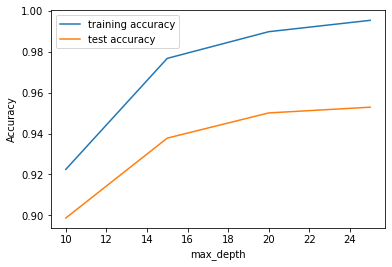

In [145]:
scores = rfgs.cv_results_
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Test f1-score almost becomes constant after max_depth=20

##### Tuning n_estimators

In [146]:
parameters = {'n_estimators': range(50, 150, 25)}
rf1 = RandomForestClassifier(max_depth=20,random_state=10)
rfgs = GridSearchCV(rf1, parameters, 
                    cv=3, 
                   scoring="recall",
                return_train_score=True,
                n_jobs=-1)

In [147]:
rfgs.fit(X_train_pca,y_train_res)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(max_depth=20, random_state=10),
             n_jobs=-1, param_grid={'n_estimators': range(50, 150, 25)},
             return_train_score=True, scoring='recall')

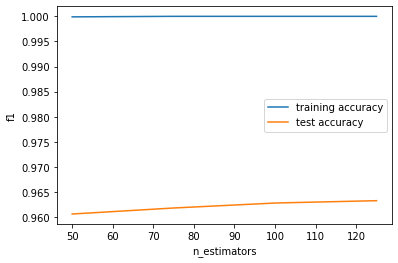

In [148]:
plot_traintestAcc(rfgs.cv_results_,'n_estimators')

 - Selecting n_estimators = 80

##### Tuning max_features

In [149]:
parameters = {'max_features': [4, 8, 14, 20, 24]}
rf3 = RandomForestClassifier(max_depth=20,n_estimators=80,random_state=10)
rfgs = GridSearchCV(rf3, parameters, 
                    cv=5, 
                   scoring="f1",
                   return_train_score=True,
                n_jobs=-1)

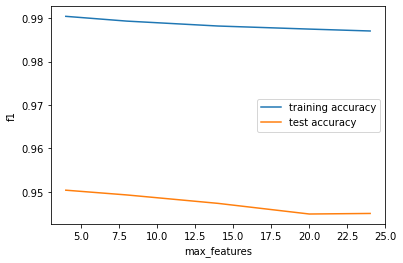

In [150]:
rfgs.fit(X_train_pca,y_train_res)
plot_traintestAcc(rfgs.cv_results_,'max_features')

- Selecting max_features = 5

##### Tuning min_sample_leaf

In [151]:
parameters = {'min_samples_split': range(50, 300, 50)}
rf5 = RandomForestClassifier(max_depth=20,n_estimators=80,max_features=5,min_samples_leaf=100,random_state=10)
rfgs = GridSearchCV(rf5, parameters, 
                    cv=3, 
                   scoring="f1",
                    return_train_score=True,
                n_jobs=-1)

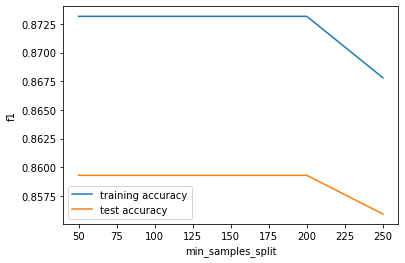

In [152]:
rfgs.fit(X_train_pca,y_train_res)
plot_traintestAcc(rfgs.cv_results_,'min_samples_split')

- Selecting min_sample_split = 150

##### Tunned Random Forest


In [153]:
rf_final = RandomForestClassifier(max_depth=20,
                                  n_estimators=80,
                                  max_features=5,
                                  min_samples_leaf=100,
                                  min_samples_split=50,
                                  random_state=10)

In [154]:
print("Model performance on Train data:")
modelfit(rf_final,X_train_pca,y_train_res)

Model performance on Train data:

Model Report
Accuracy : 0.8816
Recall/Sensitivity : 0.8631
AUC Score (Train): 0.950057
CV Score : Mean - 0.9341261 | Std - 0.004941585 | Min - 0.9249597 | Max - 0.9393836


In [155]:
# predict on test data
predictions = rf_final.predict(X_test_pca)

In [156]:
print("Model performance on Test data:")
getModelMetrics(y_test,predictions)

Model performance on Test data:
Roc_auc_score : 0.8059682997831495
Sensitivity/Recall : 0.7251533742331289
Specificity: 0.8867832253331703
False Positive Rate: 0.11321677466682968
Positive predictive value: 0.38958470665787737
Negative Predictive value: 0.9700414604788017
sklearn precision score value: 0.38958470665787737


<br>

- After hyperparameter tuning for the random forest. The Recall rate(Test) is 72.51%.
- Let's see if we can achive a better Recall rate by deciding an optimal cut-off for the model to predict churn.

<br>

In [157]:
# predicting churn with default cut-off 0.5
cut_off_prob=0.5
y_train_df = predictChurnWithProb(rf_final,X_train_pca,y_train_res,cut_off_prob)
y_train_df.head()

Roc_auc_score : 0.8816303159648119
Sensitivity/Recall : 0.8630992660454948
Specificity: 0.9001613658841289
False Positive Rate: 0.09983863411587111
Positive predictive value: 0.896318719930807
Negative Predictive value: 0.8679917683079857
sklearn precision score value: 0.896318719930807


churn  churn_Prob  final_predicted
0      0    0.265381                0
1      0    0.473232                0
2      0    0.113355                0
3      0    0.247029                0
4      0    0.330938                0

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.515512  1.000000  0.031024
0.2   0.2  0.687184  0.997970  0.376399
0.3   0.3  0.813024  0.975587  0.650461
0.4   0.4  0.876581  0.933944  0.819218
0.5   0.5  0.881630  0.863099  0.900161
0.6   0.6  0.854380  0.763989  0.944771
0.7   0.7  0.793972  0.616314  0.971631
0.8   0.8  0.693249  0.397429  0.989069
0.9   0.9  0.566837  0.134402  0.999271


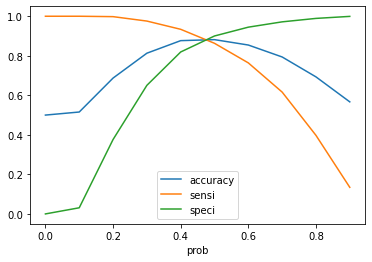

In [158]:
# finding cut-off with the right balance of the metrices
findOptimalCutoff(y_train_df)

- From the curve above, 0.45 is the optimal point with high enough sensitivity.

In [159]:
cut_off_prob=0.45
predictChurnWithProb(rf_final,X_train_pca,y_train_res,cut_off_prob)

Roc_auc_score : 0.8841028577377544
Sensitivity/Recall : 0.9014627036593619
Specificity: 0.866743011816147
False Positive Rate: 0.133256988183853
Positive predictive value: 0.8712144078881175
Negative Predictive value: 0.89791846419327
sklearn precision score value: 0.8712144078881175


churn  churn_Prob  final_predicted
0          0    0.265381                0
1          0    0.473232                1
2          0    0.113355                0
3          0    0.247029                0
4          0    0.330938                0
...      ...         ...              ...
38417      1    0.758231                1
38418      1    0.396615                0
38419      1    0.417597                0
38420      1    0.752054                1
38421      1    0.942618                1

[38422 rows x 3 columns]

##### Making Prediction on Test data

In [160]:
y_test_df= predictChurnWithProb(rf_final,X_test_pca,y_test,cut_off_prob)
y_test_df.head()

Roc_auc_score : 0.8142491957181979
Sensitivity/Recall : 0.7754601226993865
Specificity: 0.8530382687370094
False Positive Rate: 0.14696173126299059
Positive predictive value: 0.3446019629225736
Negative Predictive value: 0.9744413407821229
sklearn precision score value: 0.3446019629225736


churn  churn_Prob  final_predicted
22880      0    0.220777                0
21814      0    0.123882                0
25755      0    0.219163                0
8765       0    0.252168                0
28867      0    0.660537                1

<br>

- Random Forest after selecting optimal cut-off also is resulting in a model with

    **Train Recall**  : 90.14% and **Train Roc_auc_score** : 88.41
    
    **Test Recall** : 77.54% and **Test Roc_auc_score** : 81.42

#### 4. Boosting models

4.1 Gradiant boosting Classifier
Applying Gradiant boosting Classifier on our principal components with Hyperparameter tuning

In [161]:
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
# Fitting the default GradientBoostingClassifier
gbm0 = GradientBoostingClassifier(random_state=10)
modelfit(gbm0, X_train_pca, y_train_res)


Model Report
Accuracy : 0.8785
Recall/Sensitivity : 0.8805
AUC Score (Train): 0.942907
CV Score : Mean - 0.9355644 | Std - 0.005416929 | Min - 0.9254691 | Max - 0.9413966


In [162]:
# Hyperparameter tuning for n_estimators
param_test1 = {'n_estimators':range(20,150,10)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = param_test1, scoring='f1',n_jobs=4, cv=3)
gsearch1.fit(X_train_pca, y_train_res)

GridSearchCV(cv=3,
             estimator=GradientBoostingClassifier(max_depth=8,
                                                  max_features='sqrt',
                                                  min_samples_leaf=50,
                                                  min_samples_split=500,
                                                  random_state=10,
                                                  subsample=0.8),
             n_jobs=4, param_grid={'n_estimators': range(20, 150, 10)},
             scoring='f1')

In [163]:
gsearch1.best_params_, gsearch1.best_score_

({'n_estimators': 140}, 0.9288843038847179)

In [164]:
# Hyperparameter tuning for max_depth and min_sample_split
param_test2 = {'max_depth':range(5,16,2), 'min_samples_split':range(200,1001,200)}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=140, max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test2, scoring='f1',n_jobs=4, cv=3)
gsearch2.fit(X_train_pca, y_train_res)

GridSearchCV(cv=3,
             estimator=GradientBoostingClassifier(max_features='sqrt',
                                                  n_estimators=140,
                                                  random_state=10,
                                                  subsample=0.8),
             n_jobs=4,
             param_grid={'max_depth': range(5, 16, 2),
                         'min_samples_split': range(200, 1001, 200)},
             scoring='f1')

In [165]:
gsearch2.best_params_, gsearch2.best_score_

({'max_depth': 15, 'min_samples_split': 200}, 0.9583621929247882)

In [166]:
# Hyperparameter tuning for min_sample_leaf
param_test3 = {'min_samples_leaf':range(30,71,10)}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=140,max_depth=15,min_samples_split=200, max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test3, scoring='f1',n_jobs=4, cv=3)
gsearch3.fit(X_train_pca, y_train_res)

GridSearchCV(cv=3,
             estimator=GradientBoostingClassifier(max_depth=15,
                                                  max_features='sqrt',
                                                  min_samples_split=200,
                                                  n_estimators=140,
                                                  random_state=10,
                                                  subsample=0.8),
             n_jobs=4, param_grid={'min_samples_leaf': range(30, 71, 10)},
             scoring='f1')

In [167]:
gsearch3.best_params_, gsearch3.best_score_

({'min_samples_leaf': 30}, 0.9578144734580203)

In [168]:
# Hyperparameter tuning for max_features
param_test4 = {'max_features':range(7,20,2)}
gsearch4 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=140,max_depth=15, min_samples_split=200, min_samples_leaf=30, subsample=0.8, random_state=10),
param_grid = param_test4, scoring='f1',n_jobs=4, cv=3)
gsearch4.fit(X_train_pca, y_train_res)

GridSearchCV(cv=3,
             estimator=GradientBoostingClassifier(max_depth=15,
                                                  min_samples_leaf=30,
                                                  min_samples_split=200,
                                                  n_estimators=140,
                                                  random_state=10,
                                                  subsample=0.8),
             n_jobs=4, param_grid={'max_features': range(7, 20, 2)},
             scoring='f1')

In [169]:
gsearch4.best_params_, gsearch4.best_score_

({'max_features': 17}, 0.9596326868578794)

#### Tunned GradientBoostingClassifier

In [170]:
# Tunned GradientBoostingClassifier
gbm_final = GradientBoostingClassifier(learning_rate=0.1, n_estimators=140,max_features=15,max_depth=15, min_samples_split=200, min_samples_leaf=40, subsample=0.8, random_state=10)
modelfit(gbm_final, X_train_pca, y_train_res)


Model Report
Accuracy : 1
Recall/Sensitivity : 1
AUC Score (Train): 1.000000
CV Score : Mean - 0.9915941 | Std - 0.001385039 | Min - 0.9889285 | Max - 0.9929037


In [171]:
# predictions on Test data
dtest_predictions = gbm_final.predict(X_test_pca)

In [172]:
# model Performance on test data
getModelMetrics(y_test,dtest_predictions)

Roc_auc_score : 0.77709066388034
Sensitivity/Recall : 0.6085889570552148
Specificity: 0.9455923707054652
False Positive Rate: 0.054407629294534784
Positive predictive value: 0.5270988310308182
Negative Predictive value: 0.9603874332546877
sklearn precision score value: 0.5270988310308182


<br>
- Let's see if we can achive a better Recall rate by deciding an optimal cut-off for the model to predict churn.
<br>

In [173]:
# predicting churn with default cut-off 0.5
cut_off_prob=0.5
y_train_df = predictChurnWithProb(gbm_final,X_train_pca,y_train_res,cut_off_prob)
y_train_df.head()

Roc_auc_score : 1.0
Sensitivity/Recall : 1.0
Specificity: 1.0
False Positive Rate: 0.0
Positive predictive value: 1.0
Negative Predictive value: 1.0
sklearn precision score value: 1.0


churn  churn_Prob  final_predicted
0      0    0.004333                0
1      0    0.023195                0
2      0    0.000503                0
3      0    0.010764                0
4      0    0.006027                0

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.987221  1.000000  0.974442
0.2   0.2  0.998464  1.000000  0.996929
0.3   0.3  0.999740  1.000000  0.999479
0.4   0.4  1.000000  1.000000  1.000000
0.5   0.5  1.000000  1.000000  1.000000
0.6   0.6  1.000000  1.000000  1.000000
0.7   0.7  1.000000  1.000000  1.000000
0.8   0.8  0.999974  0.999948  1.000000
0.9   0.9  0.998438  0.996877  1.000000


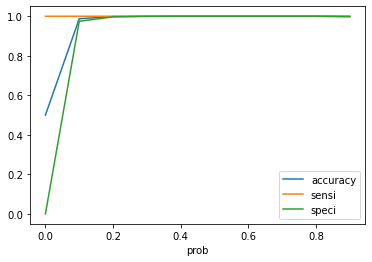

In [174]:
findOptimalCutoff(y_train_df)

In [175]:
cut_off_prob=0.1
predictChurnWithProb(gbm_final,X_train_pca,y_train_res,cut_off_prob)

Roc_auc_score : 0.9872208630472125
Sensitivity/Recall : 1.0
Specificity: 0.974441726094425
False Positive Rate: 0.02555827390557493
Positive predictive value: 0.9750786722160186
Negative Predictive value: 1.0
sklearn precision score value: 0.9750786722160186


churn  churn_Prob  final_predicted
0          0    0.004333                0
1          0    0.023195                0
2          0    0.000503                0
3          0    0.010764                0
4          0    0.006027                0
...      ...         ...              ...
38417      1    0.990434                1
38418      1    0.985538                1
38419      1    0.975396                1
38420      1    0.994676                1
38421      1    0.996285                1

[38422 rows x 3 columns]

#### Making prediction on test

In [176]:
y_test_df= predictChurnWithProb(gbm_final,X_test_pca,y_test,cut_off_prob)
y_test_df.head()

Roc_auc_score : 0.8338025633505528
Sensitivity/Recall : 0.8049079754601227
Specificity: 0.862697151240983
False Positive Rate: 0.137302848759017
Positive predictive value: 0.3687464867903317
Negative Predictive value: 0.977962577962578
sklearn precision score value: 0.3687464867903317


churn  churn_Prob  final_predicted
22880      0    0.000755                0
21814      0    0.001529                0
25755      0    0.000435                0
8765       0    0.005778                0
28867      0    0.374780                1

This model depicts over-fitting the Training data with a lower performance on the Test data.

<br>
<br>

#### 4.2 XGBoost Classifier

- Applying XGBoost Classifier on our principal components with Hyperparameter tuning
<br>

In [177]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
# Fitting the XGBClassifier
xgb1 = XGBClassifier(learning_rate =0.1,
                    n_estimators=1000,
                    max_depth=5,
                    min_child_weight=1,
                    gamma=0,
                    subsample=0.8,
                    colsample_bytree=0.8,
                    objective= 'binary:logistic',
                    nthread=4,
                    scale_pos_weight=1,
                    seed=27)

In [178]:
# Model fit and performance on Train data
modelfit(xgb1, X_train_pca, y_train_res)

[13:56:01] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:57:27] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:58:38] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:59:58] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation me

In [179]:
# Hyperparameter tunning max_depth and min_child_weight for the XGBClassifer
param_test1 = {'max_depth':range(3,10,2),'min_child_weight':range(1,6,2)}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='f1',n_jobs=4, cv=3)
gsearch1.fit(X_train_pca, y_train_res)

[14:05:07] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8,
                                     enable_categorical=False, gamma=0,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=5, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=140, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight

In [180]:
gsearch1.best_params_, gsearch1.best_score_

({'max_depth': 9, 'min_child_weight': 1}, 0.9560497464878303)

In [181]:
#hyperparameter gamma tunning for the XGBClassifer
param_test2 = param_test3 = {'gamma':[i/10.0 for i in range(0,5)]}
gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=9,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2, scoring='f1',n_jobs=4, cv=3)
gsearch2.fit(X_train_pca, y_train_res)


[14:06:56] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8,
                                     enable_categorical=False, gamma=0,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=9, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=140, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight

In [182]:
gsearch2.best_params_, gsearch2.best_score_

({'gamma': 0.2}, 0.9563977593697998)

In [183]:
# Final XGBClassifier
xgb2 = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=9,
 min_child_weight=1, gamma=0.2, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27)

In [184]:
# Fit Train data
modelfit(xgb2, X_train_pca, y_train_res)

[14:07:16] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:07:36] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:07:52] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:08:08] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation me

In [185]:
# Predicting on Test data
dtest_predictions = xgb2.predict(X_test_pca)

In [186]:
# Model evaluation on Test data
getModelMetrics(y_test,dtest_predictions)

Roc_auc_score : 0.7815204582737325
Sensitivity/Recall : 0.6245398773006134
Specificity: 0.9385010392468517
False Positive Rate: 0.061498960753148306
Positive predictive value: 0.5029644268774703
Negative Predictive value: 0.9616637434227011
sklearn precision score value: 0.5029644268774703


- Checking if we can achive a better Recall rate by deciding an optimal cut-off for the model to predict churn.

In [187]:
# predicting churn with default cut-off 0.5
cut_off_prob=0.5
y_train_df = predictChurnWithProb(xgb2,X_train_pca,y_train_res,cut_off_prob)
y_train_df.head()

Roc_auc_score : 0.9988808495132997
Sensitivity/Recall : 0.9998958929779813
Specificity: 0.997865806048618
False Positive Rate: 0.002134193951382021
Positive predictive value: 0.9978701298701299
Negative Predictive value: 0.9998956812017525
sklearn precision score value: 0.9978701298701299


churn  churn_Prob  final_predicted
0      0    0.013554                0
1      0    0.083621                0
2      0    0.000171                0
3      0    0.021315                0
4      0    0.016967                0

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.967545  1.000000  0.935089
0.2   0.2  0.989095  1.000000  0.978190
0.3   0.3  0.995081  1.000000  0.990162
0.4   0.4  0.997710  0.999948  0.995471
0.5   0.5  0.998881  0.999896  0.997866
0.6   0.6  0.999505  0.999792  0.999219
0.7   0.7  0.999219  0.998751  0.999688
0.8   0.8  0.997189  0.994482  0.999896
0.9   0.9  0.983889  0.967831  0.999948


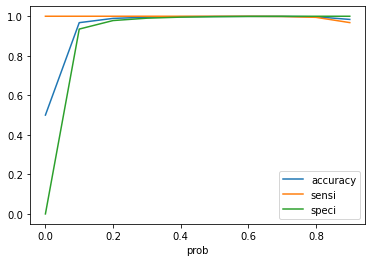

In [188]:
# Finding optimal cut-off probability
findOptimalCutoff(y_train_df)

In [189]:
# Selecting 0.22 as cut-off in an attempt to improve recall rate
cut_off_prob=0.22
predictChurnWithProb(xgb2,X_train_pca,y_train_res,cut_off_prob)

Roc_auc_score : 0.9906824215293322
Sensitivity/Recall : 1.0
Specificity: 0.9813648430586643
False Positive Rate: 0.018635156941335693
Positive predictive value: 0.9817057591087945
Negative Predictive value: 1.0
sklearn precision score value: 0.9817057591087945


churn  churn_Prob  final_predicted
0          0    0.013554                0
1          0    0.083621                0
2          0    0.000171                0
3          0    0.021315                0
4          0    0.016967                0
...      ...         ...              ...
38417      1    0.991788                1
38418      1    0.954176                1
38419      1    0.972470                1
38420      1    0.987613                1
38421      1    0.993417                1

[38422 rows x 3 columns]

##### Making prediction on test set

In [190]:
y_test_df= predictChurnWithProb(xgb2,X_test_pca,y_test,cut_off_prob)
y_test_df.head()

Roc_auc_score : 0.8282375858569417
Sensitivity/Recall : 0.7693251533742331
Specificity: 0.8871500183396503
False Positive Rate: 0.11284998166034968
Positive predictive value: 0.4045161290322581
Negative Predictive value: 0.9747447608812466
sklearn precision score value: 0.4045161290322581


churn  churn_Prob  final_predicted
22880      0    0.001027                0
21814      0    0.004825                0
25755      0    0.000903                0
8765       0    0.010252                0
28867      0    0.523710                1

<br>

### 5. SVM
Using linear kernal

In [191]:
# instantiate an object of class SVC()
# note that we are using cost C=1
svm0 = SVC(C = 1)

In [192]:
# fit
svm0.fit(X_train_pca, y_train_res)

# predict on train
y_pred = svm0.predict(X_train_pca)
getModelMetrics(y_train_res,y_pred)

Roc_auc_score : 0.9412055593149758
Sensitivity/Recall : 0.9558065691530894
Specificity: 0.9266045494768622
False Positive Rate: 0.07339545052313778
Positive predictive value: 0.9286870321667003
Negative Predictive value: 0.9544772117962467
sklearn precision score value: 0.9286870321667003


In [193]:
# Predict on test
y_pred = svm0.predict(X_test_pca)
getModelMetrics(y_test,y_pred)

Roc_auc_score : 0.8189872762581413
Sensitivity/Recall : 0.7239263803680982
Specificity: 0.9140481721481843
False Positive Rate: 0.08595182785181563
Positive predictive value: 0.4563031709203403
Negative Predictive value: 0.970783015192832
sklearn precision score value: 0.4563031709203403


##### Hyperparameter tuning for linear kernal
Let's see if we can tune the hyperparameters of SVM and get a better Sensitivity score.

In [194]:
# specify range of parameters (C) as a list
params = {"C": [0.1, 1, 10, 100, 1000]}

svm1 = SVC()

# set up grid search scheme
# note that we are still using the 5 fold CV scheme
model_cv = GridSearchCV(estimator = svm1, param_grid = params, 
                        scoring= 'f1', 
                        cv = 5, 
                        verbose = 1,
                        n_jobs=4,
                       return_train_score=True) 
model_cv.fit(X_train_pca, y_train_res)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=4,
             param_grid={'C': [0.1, 1, 10, 100, 1000]}, return_train_score=True,
             scoring='f1', verbose=1)

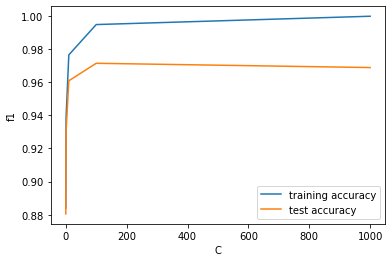

In [195]:
plot_traintestAcc(model_cv.cv_results_,'C')

In [196]:
model_cv.best_params_

{'C': 100}

In [197]:
svm_final = SVC(C = 100)
# fit
svm_final.fit(X_train_pca, y_train_res)

SVC(C=100)

In [198]:
# predict
y_pred = svm_final.predict(X_test_pca)

In [199]:
getModelMetrics(y_test,y_pred)

Roc_auc_score : 0.7207100782566757
Sensitivity/Recall : 0.49570552147239266
Specificity: 0.9457146350409585
False Positive Rate: 0.054285364959041446
Positive predictive value: 0.47641509433962265
Negative Predictive value: 0.9495457893444635
sklearn precision score value: 0.47641509433962265


- Using non-linear kernal:

In [200]:
svm_k = SVC(C = 100, kernel='rbf')
svm_k.fit(X_train_pca, y_train_res)

SVC(C=100)

In [201]:
y_pred = svm_k.predict(X_test_pca)

In [202]:
getModelMetrics(y_test,y_pred)

Roc_auc_score : 0.7207100782566757
Sensitivity/Recall : 0.49570552147239266
Specificity: 0.9457146350409585
False Positive Rate: 0.054285364959041446
Positive predictive value: 0.47641509433962265
Negative Predictive value: 0.9495457893444635
sklearn precision score value: 0.47641509433962265


##### Recall Score: 49.57%

Now that we have a variety of models used to predict the churn for the telecom. Let's compare and decide a model of choice for this problem of churn prediction.

### Final Choice of Model
- The company would like to identify most customers at risk of churning, even if there are many customers that are misclassified as churn. 
- Hence , Recall is the most important business metric for this telecom churn problem. 
- The cost to the company of churning is much higher than having a few false positives.

<!DOCTYPE html>
<html>
	<head>
		<meta charset="UTF-8">
			<title>Excel To HTML using codebeautify.org</title>
		</head>
		<body>
			<b>
				<u>Sheet Name</u> :- Model Metrics with Train Test Sets
			</b>
			<hr>
				<table cellspacing=0 border=1>
					<tr>
						<td style=min-width:50px>Model Metrics</td>
						<td style=min-width:50px>Train</td>
						<td style=min-width:50px>Test</td>
					</tr>
					<tr>
						<td style=min-width:50px>Logistic_Regression (cutoff=0.45)</td>
						<td style=min-width:50px></td>
						<td style=min-width:50px></td>
					</tr>
					<tr>
						<td style=min-width:50px>ROC_auc_score</td>
						<td style=min-width:50px>85.23%</td>
						<td style=min-width:50px>82.34%</td>
					</tr>
					<tr>
						<td style=min-width:50px>Sensitivity/Recall </td>
						<td style=min-width:50px>88.27%</td>
						<td style=min-width:50px>82.94%</td>
					</tr>
					<tr>
						<td style=min-width:50px>Specificity</td>
						<td style=min-width:50px>82.19%</td>
						<td style=min-width:50px>81.75%</td>
					</tr>
					<tr>
						<td style=min-width:50px>Precision </td>
						<td style=min-width:50px>83.21%</td>
						<td style=min-width:50px>31.17%</td>
					</tr>
					<tr>
						<td style=min-width:50px>DecisionTree ( cut-off = 0.42)</td>
						<td style=min-width:50px></td>
						<td style=min-width:50px></td>
					</tr>
					<tr>
						<td style=min-width:50px>ROC_auc_score</td>
						<td style=min-width:50px>83.18%</td>
						<td style=min-width:50px>77.06%</td>
					</tr>
					<tr>
						<td style=min-width:50px>Sensitivity/Recall </td>
						<td style=min-width:50px>89.13%</td>
						<td style=min-width:50px>78.03%</td>
					</tr>
					<tr>
						<td style=min-width:50px>Specificity</td>
						<td style=min-width:50px>77.23%</td>
						<td style=min-width:50px>76.08%</td>
					</tr>
					<tr>
						<td style=min-width:50px>Precision </td>
						<td style=min-width:50px>79.65%</td>
						<td style=min-width:50px>24.53%</td>
					</tr>
					<tr>
						<td style=min-width:50px>Random Forest (cutoff=0.45)</td>
						<td style=min-width:50px></td>
						<td style=min-width:50px></td>
					</tr>
					<tr>
						<td style=min-width:50px>ROC_auc_score</td>
						<td style=min-width:50px>88.41%</td>
						<td style=min-width:50px>81.42%</td>
					</tr>
					<tr>
						<td style=min-width:50px>Sensitivity/Recall </td>
						<td style=min-width:50px>90.14%</td>
						<td style=min-width:50px>77.54%</td>
					</tr>
					<tr>
						<td style=min-width:50px>Specificity</td>
						<td style=min-width:50px>86.67%</td>
						<td style=min-width:50px>85.30%</td>
					</tr>
					<tr>
						<td style=min-width:50px>Precision </td>
						<td style=min-width:50px>87.12%</td>
						<td style=min-width:50px>34.46%</td>
					</tr>
					<tr>
						<td style=min-width:50px>Gradient Boosting (0.1)</td>
						<td style=min-width:50px></td>
						<td style=min-width:50px></td>
					</tr>
					<tr>
						<td style=min-width:50px>ROC_auc_score</td>
						<td style=min-width:50px>98.72%</td>
						<td style=min-width:50px>83.39%</td>
					</tr>
					<tr>
						<td style=min-width:50px>Sensitivity/Recall </td>
						<td style=min-width:50px>100.00%</td>
						<td style=min-width:50px>80.49%</td>
					</tr>
					<tr>
						<td style=min-width:50px>Specificity</td>
						<td style=min-width:50px>97.44%</td>
						<td style=min-width:50px>86.26%</td>
					</tr>
					<tr>
						<td style=min-width:50px>Precision </td>
						<td style=min-width:50px>97.50%</td>
						<td style=min-width:50px>36.87%</td>
					</tr>
					<tr>
						<td style=min-width:50px>XGBoosting (cutoff=0.22)</td>
						<td style=min-width:50px></td>
						<td style=min-width:50px></td>
					</tr>
					<tr>
						<td style=min-width:50px>ROC_auc_score</td>
						<td style=min-width:50px>99.06%</td>
						<td style=min-width:50px>82.82%</td>
					</tr>
					<tr>
						<td style=min-width:50px>Sensitivity/Recall </td>
						<td style=min-width:50px>100.00%</td>
						<td style=min-width:50px>76.93%</td>
					</tr>
					<tr>
						<td style=min-width:50px>Specificity</td>
						<td style=min-width:50px>98.13%</td>
						<td style=min-width:50px>88.72%</td>
					</tr>
					<tr>
						<td style=min-width:50px>Precision </td>
						<td style=min-width:50px>98.17%</td>
						<td style=min-width:50px>40.45%</td>
					</tr>
					<tr>
						<td style=min-width:50px>SVM (Linear C=100)</td>
						<td style=min-width:50px></td>
						<td style=min-width:50px></td>
					</tr>
					<tr>
						<td style=min-width:50px>ROC_auc_score</td>
						<td style=min-width:50px>94.12%</td>
						<td style=min-width:50px>81.89%</td>
					</tr>
					<tr>
						<td style=min-width:50px>Sensitivity/Recall </td>
						<td style=min-width:50px>95.58%</td>
						<td style=min-width:50px>72.39%</td>
					</tr>
					<tr>
						<td style=min-width:50px>Specificity</td>
						<td style=min-width:50px>92.66%</td>
						<td style=min-width:50px>91.40%</td>
					</tr>
					<tr>
						<td style=min-width:50px>Precision </td>
						<td style=min-width:50px>92.86%</td>
						<td style=min-width:50px>45.63%</td>
					</tr>
				</table>
				<hr>
				</body>
			</html>

- As seen from details above, the Logistic Regression model with probability cut-off = 0.45 proves to perform the best . It achieved the best recall accuracy of 82.94%  on Test Data. Also the overall accuracy and specificity is more or less consistent for Test and train data, thus avoiding overfitting. The precision is compromised in this effort but the business objective to predict Churn customers is most accuratety captured by it.

- Next, SVM which achives a recall rate of 72.39%, it has better precision of 45.63% and a balanced overall accuracy on train and test.

- From the Tree Family, the Decision Tree seem to have overfitted the data slightly while obtaining 78.03% recall accuracy on test data. The Random Forest avoided overfitting but obtained only 77.54% recall accuracy on test data.

- Among the Bossting Methods, Gradient Boosting Classifer (GBC) achived 80.49% recall rate and XGBoost Classifier achived 76.93% but both tend to overfit the training data.

<br>

## Identifying relevant churn features.
We will use an instance of Random Forest Classifier to identify the features most relevant to churn.
<br>
<br>

#### Random Forest for identifying features influencing Churn 

In [203]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [8,10,12],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [12, 15, 20]
}
rfor = RandomForestClassifier()
# Instantiate the grid search model
gridSearch = GridSearchCV(estimator = rfor, param_grid = param_grid, 
                          cv = 3,  n_jobs=-1,verbose = 1)

In [204]:
# Fit the grid search to the data
gridSearch.fit(X_train_res, y_train_res)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [8, 10, 12], 'max_features': [12, 15, 20],
                         'min_samples_leaf': range(100, 400, 200),
                         'min_samples_split': range(200, 500, 200),
                         'n_estimators': [100, 200, 300]},
             verbose=1)

In [205]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',gridSearch.best_score_,'using',gridSearch.best_params_)

We can get accuracy of 0.9061738456780667 using {'max_depth': 10, 'max_features': 20, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 100}


In [206]:
rfor = RandomForestClassifier(max_depth=10,
                            max_features=20,
                            min_samples_leaf=100,
                            min_samples_split=200,
                            n_estimators=100,
                            random_state=10,
                             n_jobs=-1)

In [207]:
rfor.fit(X_train_res, y_train_res)

RandomForestClassifier(max_depth=10, max_features=20, min_samples_leaf=100,
                       min_samples_split=200, n_jobs=-1, random_state=10)

### FEATURE IMPORTANCE

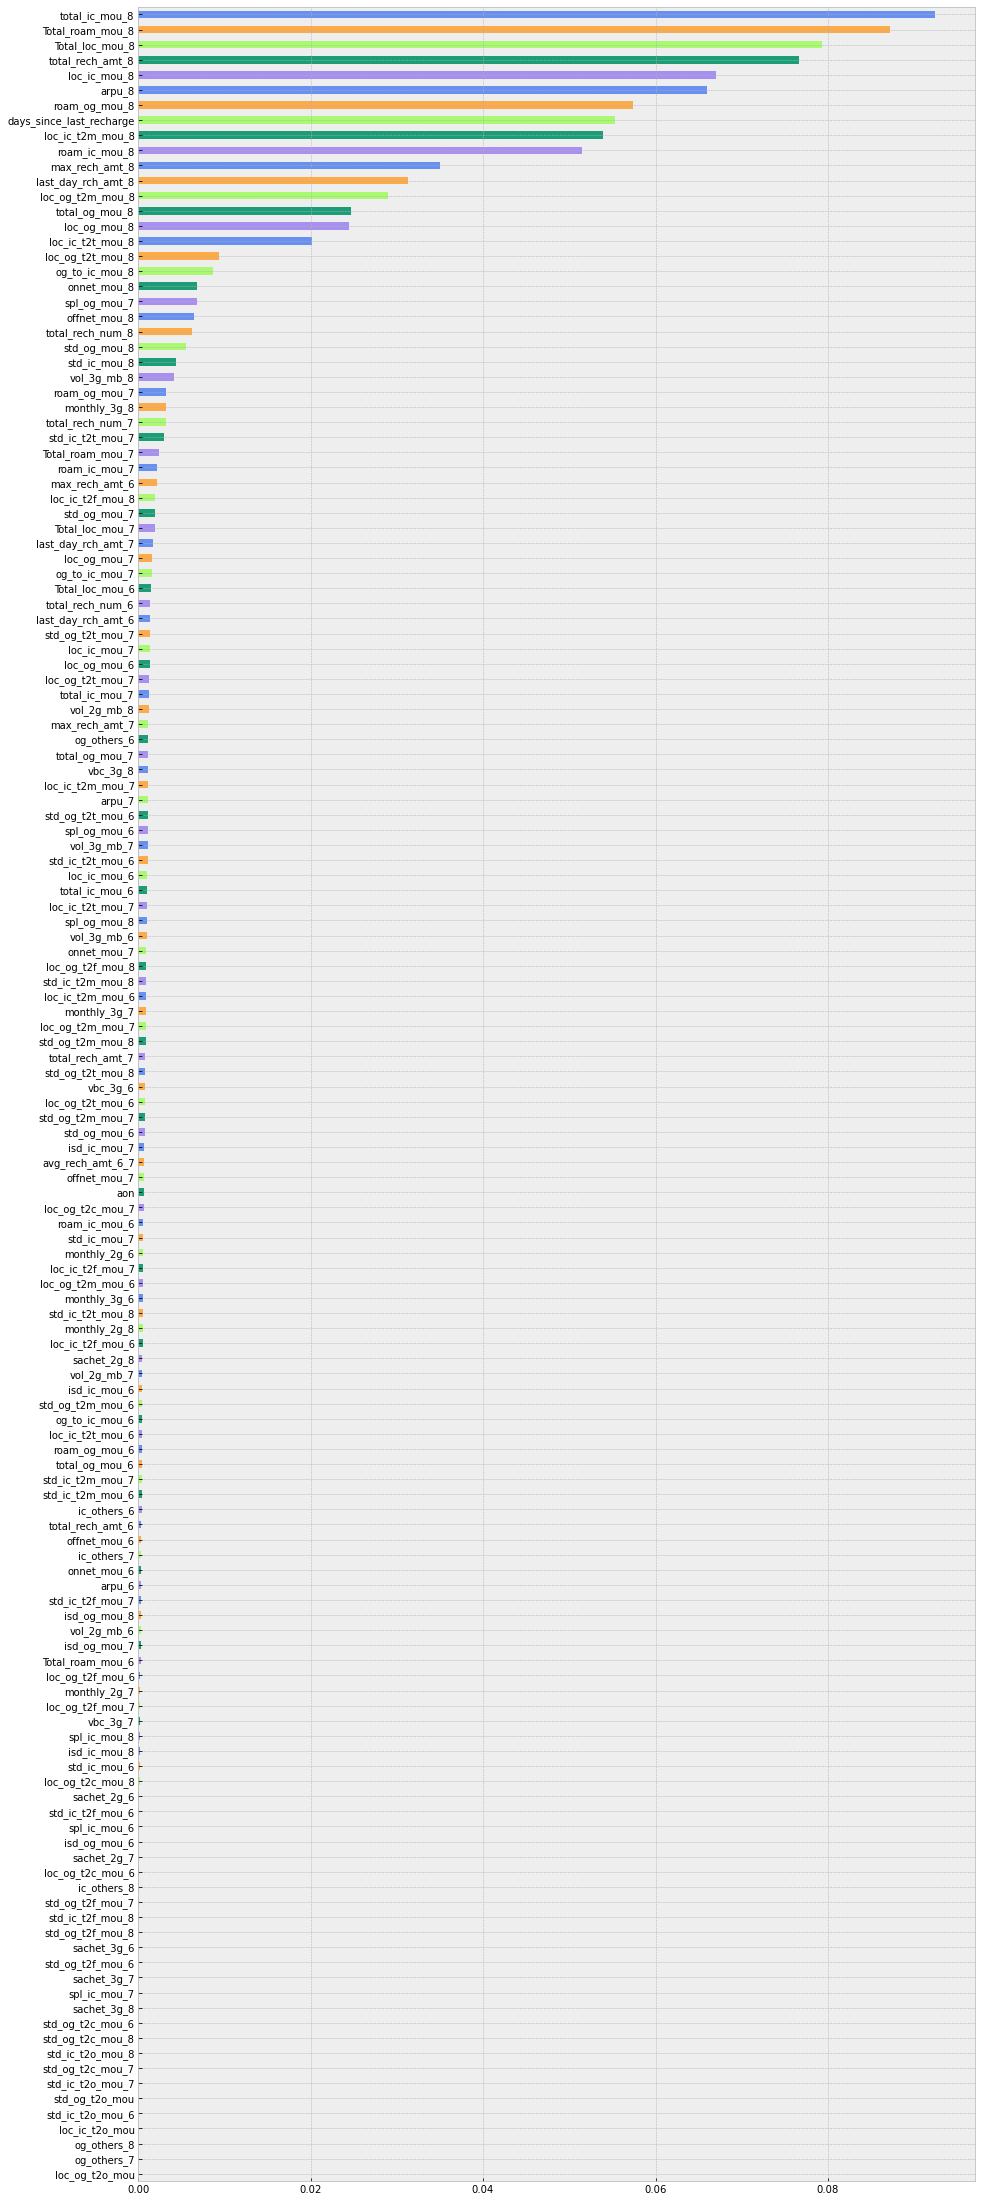

In [208]:
X_train_res_LR=pd.DataFrame(X_train_res, columns = X.columns)
plt.figure(figsize=(15,40))
plt.style.use('bmh')
colors = ['#1b9e77', '#a9f971', '#fdaa48','#6890F0','#A890F0']
feat_importances = pd.Series(rfor.feature_importances_, index=X_train_res_LR.columns)
feat_importances.nlargest(len(X_train_res_LR.columns)).sort_values().plot(kind='barh', align='center',color=colors)
plt.show()

## CONCLUSION:

##### INFERENCES:
- This graphs shows the Features ordered according to their order of Importance in terms on predicting CHURN tendency of any High Value Customer, Based on the RandomForest Model belong to the Tree Family Models.
- Most of the top ranked features belong to the ACTION PHASE
- It's evident ACTION PHASE variables determine the CHURN of any High Value Customer.


    1. total_ic_mou_8  -- Total incoming minutes of usage in month 8
    2. Total_roam_mou_8 -- Total Roaming minutes of usage in month 8
    3. Total_loc_mou_8 -- Total local minutes of usage in month 8
    4. total_rech_amt_8 -- Total Recharge Amount in month 8
    5. loc_ic_mou_8 -- Total local Incoming of usage in month 8
    6. arpu_8 -- Total ARPU of the Customer in month 8
    7. roam_og_mou_8 -- Total Roaming Outgoing minutes of usage in month 8
    8. days_since_last_recharge -- Days passed since Last recharge
    9. loc_ic_t2m_mou_8 -- local incoming calls from same operator minutes of usage in month 8
    10. roam_ic_mou_8 -- incoming roaming calls minutes of usage in month 8
    11. max_rech_amt_8 -- Maximum Recharege Amount in month 8
    12. last_day_rch_amt_8 -- Last Day Recharge Amount in month 9
    13. loc_og_t2m_mou_8 -- local outgoing calls minutes of usage to other operator mobile in month 8
    14. total_og_mou_8 -- Total Outgoing calls minutes of usage in month 8
    15. loc_og_mou_8 -- Local Outgoing calls minutes of usage in month 8
    16. loc_ic_t2t_mou_8 -- local incoming calls from same operator minutes of usage in month 8
    17. loc_og_t2t_mou_8 -- local Outgoing calls from same operator minutes of usage in month 8
    18. og_to_ic_mou_8 -- outgoing to incoming mou ratio for month of 8
    19. onnet_mou_8 -- All kind of calls within the same operator network in month 8
    20. spl_og_mou_7 -- Special Outgoing calls in Month 7
    21. offnet_mou_8 -- All kind of calls outside the operator T network in month 8
    22. total_rech_num_8 -- Total number of Recharges done by the Customer in month 8
    23. std_og_mou_8 -- STD outgoing Minutes of Usage in month 8
    24. std_ic_mou_8 -- STD Incoming Minutes of Usage in month 8
    25. vol_3g_mb_8 -- Volume of Data used in MBs on 3G Network in Month 8
    26. roam_og_mou_7 -- Roaming outgoing calls minutes of usage in month 7
    27. monthly_3g_8 -- No of Monthly schemes opted by Customer in month 8
    28. total_rech_num_7 -- Total number of recharges done by customer in month 7
    29. std_ic_t2t_mou_7 -- STD incoming alls from same operator minutes of usage in month 8
    30. Total_roam_mou_7 -- Total Roaming Calls minutes of usage in month 7

- We observe Total Incoming calls usage if drops significantly , indicates very high tendency of churn. 
- Like wise any kind of Roaming Outgoing , incoming Calls usage trend (i.e Reduction in these KPIs) gives a clear indication of churn
- Total amount of Recharge and How long it has been since the last recharge also gives out churning tendency indication


#### STRATERGIES & BUSINESS RECOMMENDATIONS

- Retaining any Customer especially a High Value Customer is beneficial for any Telecom Network Operator as it costs 5-10X times more in aquiring a new Customer. Hence it's emperical to Identify Churn tendency and take measures to address it. We recommend following suggestions based on the analysis for High Value Customer Data Analysis carried out.


##### 1. MONITOR USAGE of KPIs:
    - timely Monitoring usage of KPIs such Incoming / Outgoing Call usage of any customer.
    - timely Monitor ARPU and Data Usage of customer
    - Generate timely reports to understand Recharge Frequency/ Recharge Amount of the Customer
    - Based on the feasibility , Organization should try to keep the monitoring interval of such KPIs less than month
    
As an example below, TOTAL Incoming Minutes of Usage drastically reduces for churners

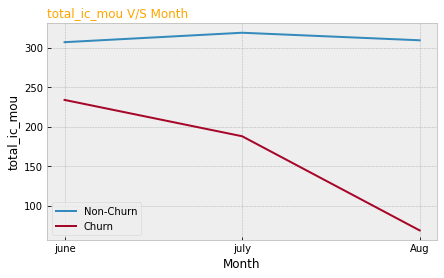

total_ic_mou_6  total_ic_mou_7  total_ic_mou_8
churn                                                
0          307.134110      319.076190      309.533428
1          234.040575      188.049584       68.847210

In [209]:
plot_byChurn(df_telecom_hvc,'total_ic_mou')


##### 2. TARIFFs ,QoS & SERVICE PACKS:

   - It was observed , Customers who churned had Higher Roaming Usage (As seen below). Network Operators are suggested to rollout competitive tariff rates/ Special Offers for loyal customers.
   -  It might be that the customer is not getting good quality of service while roaming. In this case, quality of service guarantees with roaming partners and network quality need to be investigated.Pro-active Surveys are recommended to Gauge Customer Experience and Feedbacks
   - It was observed , Churners have high usage of Local & ONNET usage , Network Operator can consider rolling out special low cost tariffs for same network calls or Discounted roaming rates during particular hours of the day. Free monthly roaming mou's depending on the users past roaming mou usage.
   - High Value Customers have who have atleast 1 Monthly Service Activated is less likely to churn. Network Operator can reach out to its Marketing team and  create popular schemes especially on 3G Network schemes and rollout to the Customers .

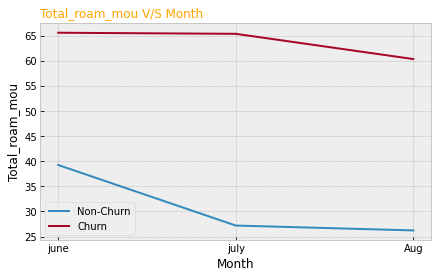

Total_roam_mou_6  Total_roam_mou_7  Total_roam_mou_8
churn                                                      
0             39.269350         27.199359         26.226794
1             65.643728         65.429571         60.395089

In [210]:
plot_byChurn(df_telecom_hvc,'Total_roam_mou')